<a href="https://colab.research.google.com/github/shannonshih/Tibame_GAD245-practice_0122_HW-complete-/blob/main/05_02_LAB_VideoGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-02.LAB_VideoGameSales_學號_姓名  (例: "05-02.LAB_VideoGameSales_00_陳仁政")
* 附件檔名請設定為： 05-02.LAB_VideoGameSales_學號_姓名.ipynb (例: "05-02.LAB_VideoGameSales_00_陳仁政.ipynb")

# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

## 載入與整理資料

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/AI人才應用/20250109T010859Z-001/2024-12 AI數據應用人才養成班/data/vgsales.csv")
data.head(10)

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

In [3]:
#查看資料筆數跟欄位數目
data.shape

(16598, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
Data_isnull = data.isnull().sum()
df = pd.DataFrame(data = Data_isnull)
new_columns_name = {0 : "有缺失值欄位的總和"}
df.rename(new_columns_name, axis = 1)

有缺失值欄位的總和
Rank                  0
Name                  0
Platform              0
Year                271
Genre                 0
Publisher            58
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0

In [ ]:
# # 年份的格式錯誤，所以需要更改成整數型態
# data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有nan，所以需要先將nan改成 0
# data['Year'] = data['Year'].astype('int32') #改變年份的資料型態
# data.head()

In [8]:
# 查看一下資料的基本統計值
data.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [9]:
data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000
mean       0.264667      0.146652      0.077782      0.048063      0.537441
std        0.816683      0.505351      0.309291      0.188588      1.555028
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.470000
max       41.490000     29.020000     10.220000     10.570000     82.740000

↑ 問題：為何各地區的銷售數量的平均跟中位數都差異那麼大？

# 哪一種類的電玩最受歡迎

In [10]:
# 計算各種電玩類別的總數
data["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [11]:
data.groupby("Genre").size()
df = pd.DataFrame(data = (data.groupby("Genre").size()))
new_columns_name = {0 : "count"}
df.rename(new_columns_name, axis = 1)

count
Genre              
Action         3316
Adventure      1286
Fighting        848
Misc           1739
Platform        886
Puzzle          582
Racing         1249
Role-Playing   1488
Shooter        1310
Simulation      867
Sports         2346
Strategy        681

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

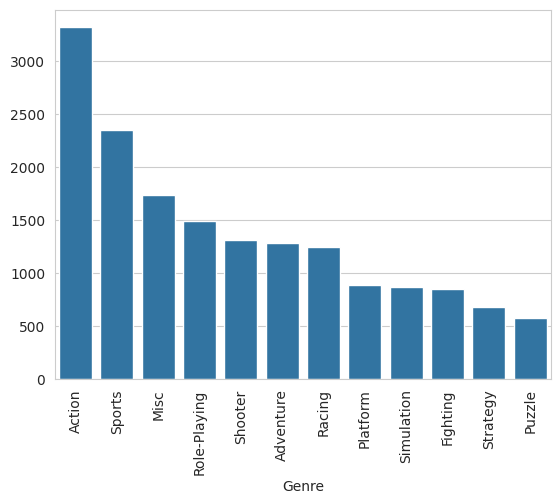

In [13]:
Genre_count = data["Genre"].value_counts()
sns.barplot(x = Genre_count.index, y = Genre_count.values)
plt.xticks(rotation = 90)

In [14]:
# 練習題
# 找出遊戲總數最多的前三年
data["Year"].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [15]:
data["Year"].value_counts().head(3)

Year
2009.0    1431
2008.0    1428
2010.0    1259
Name: count, dtype: int64

In [16]:
# 練習題
# 找出遊戲總數最多的前三個遊戲商
data["Publisher"].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [17]:
data["Publisher"].value_counts().head(3)

Publisher
Electronic Arts       1351
Activision             975
Namco Bandai Games     932
Name: count, dtype: int64

In [18]:
# 練習題
# 找出遊戲總數最多的前三個平台
data["Platform"].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [19]:
data["Platform"].value_counts().head(3)

Platform
DS     2163
PS2    2161
PS3    1329
Name: count, dtype: int64

In [38]:
# 練習題
# 找出遊戲總銷售額最多的前三個平台
data.groupby("Platform")["Global_Sales"].sum()

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

In [34]:
# 根據平台進行分組並計算總銷售額
platform_sales = data.groupby("Platform")["Global_Sales"].sum().reset_index()

# 按銷售額排序並取前三名
top_platforms = platform_sales.sort_values(by="Global_Sales", ascending=False).head(3)

# 打印結果
# print(top_platforms)
top_platforms

Platform  Global_Sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

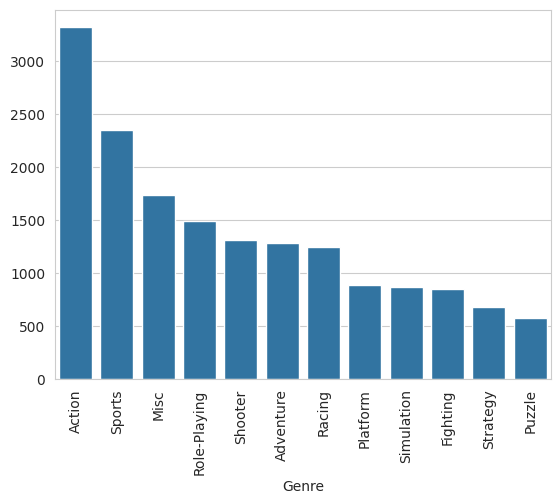

In [35]:
# 畫出直方圖用來顯示不同電玩總類的總數
Genre_count = data["Genre"].value_counts()
sns.barplot(x = Genre_count.index, y = Genre_count.values)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

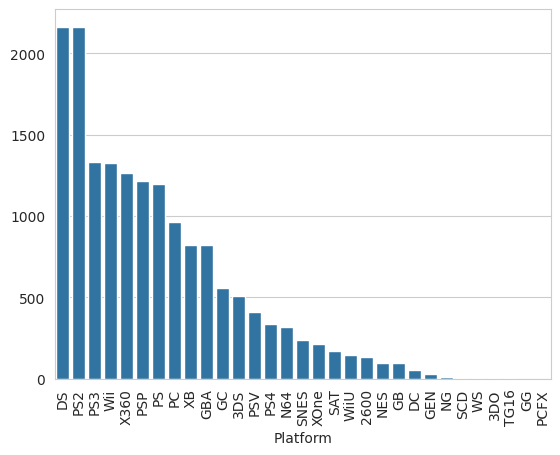

In [46]:
#練習題
#畫出每個平台的遊戲數目
Platform_count = data["Platform"].value_counts()
sns.barplot(x = Platform_count.index, y = Platform_count.values)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, 'Eidos Interactive'),
  Text(19, 0, '505 Games')])

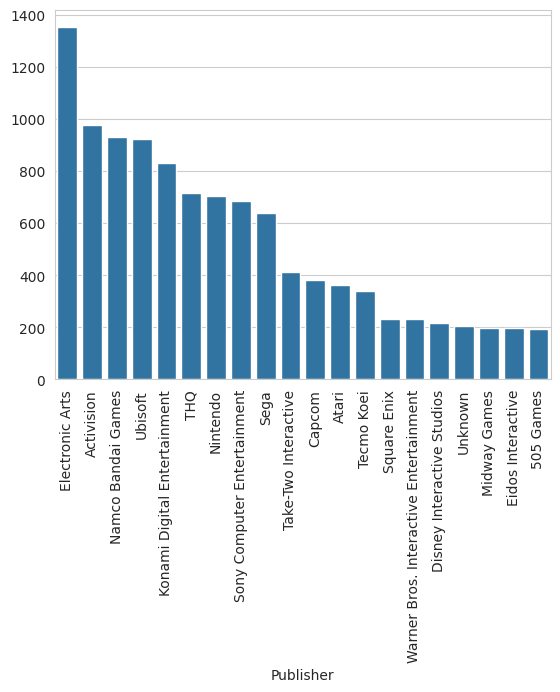

In [58]:
#練習題
#畫出每個發行商的遊戲數目
Publisher_count = data["Publisher"].value_counts()
Publisher_count_reset = Publisher_count.head(20)
sns.barplot(x = Publisher_count_reset.index, y = Publisher_count_reset.values)
plt.xticks(rotation = 90)

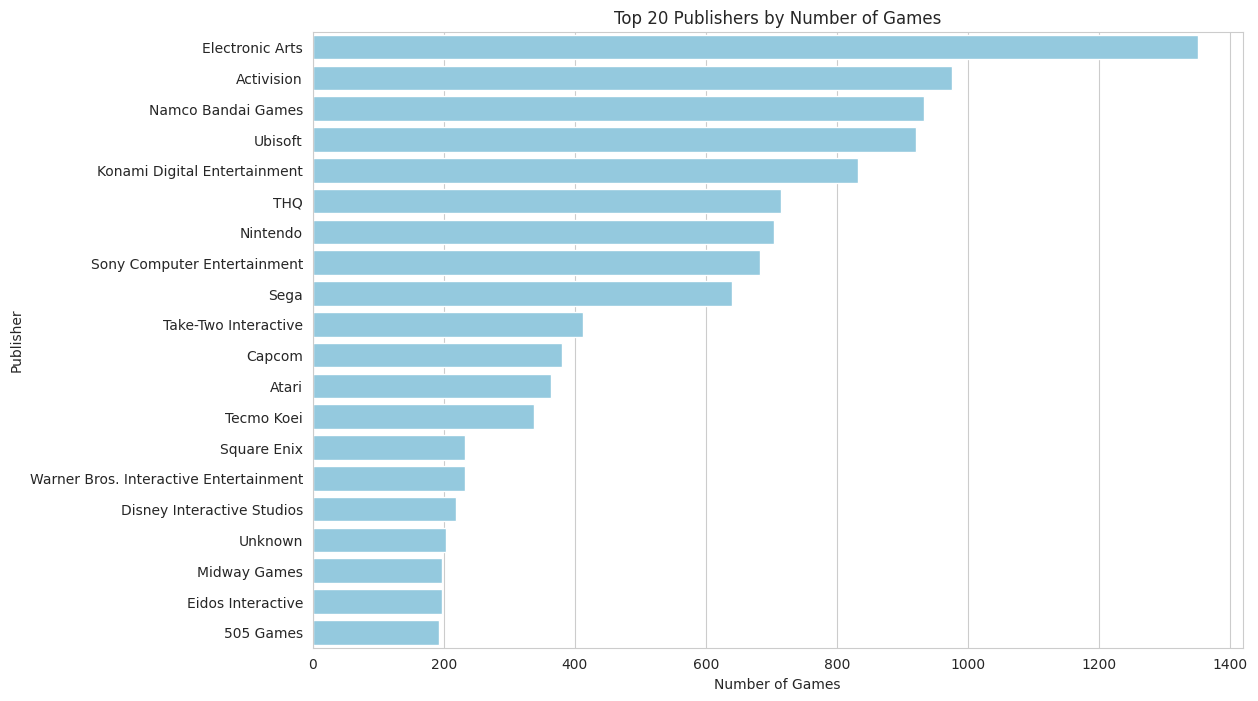

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 根據發行商進行分組並計算遊戲數目
Publisher_count = data["Publisher"].value_counts().reset_index()
Publisher_count.columns = ["Publisher", "Game_Count"]

# 繪製直方圖
plt.figure(figsize=(12, 8))
sns.barplot(x="Game_Count", y="Publisher", data=Publisher_count.head(20), color="skyblue") # colo可改成 -> palette='viridis'
plt.title("Top 20 Publishers by Number of Games")
plt.xlabel("Number of Games")
plt.ylabel("Publisher")
plt.show()

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


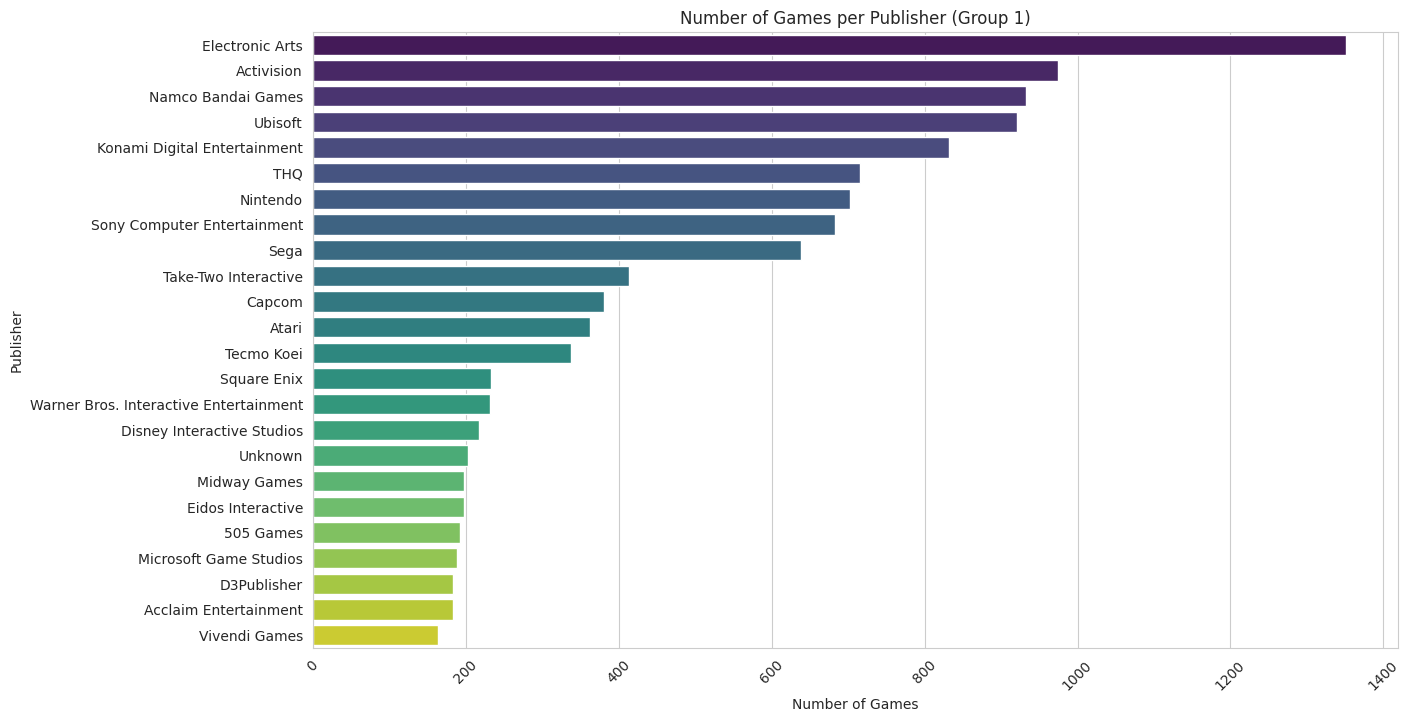

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


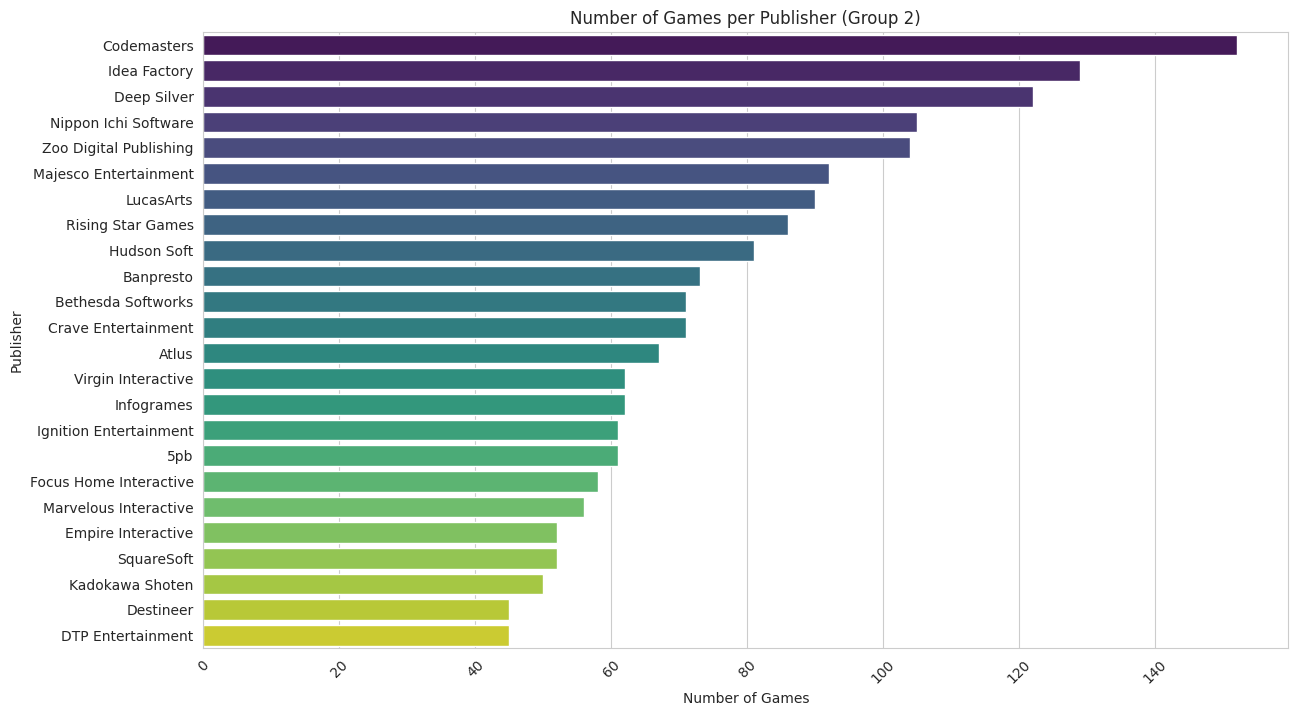

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


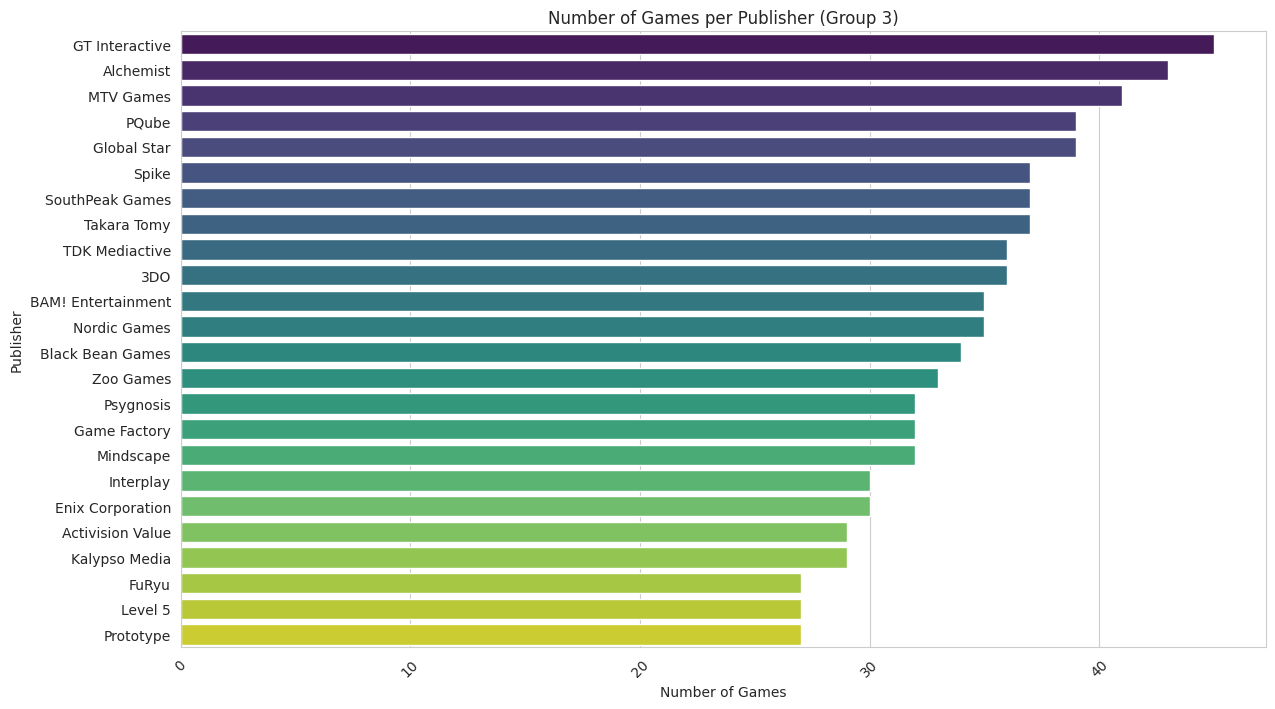

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


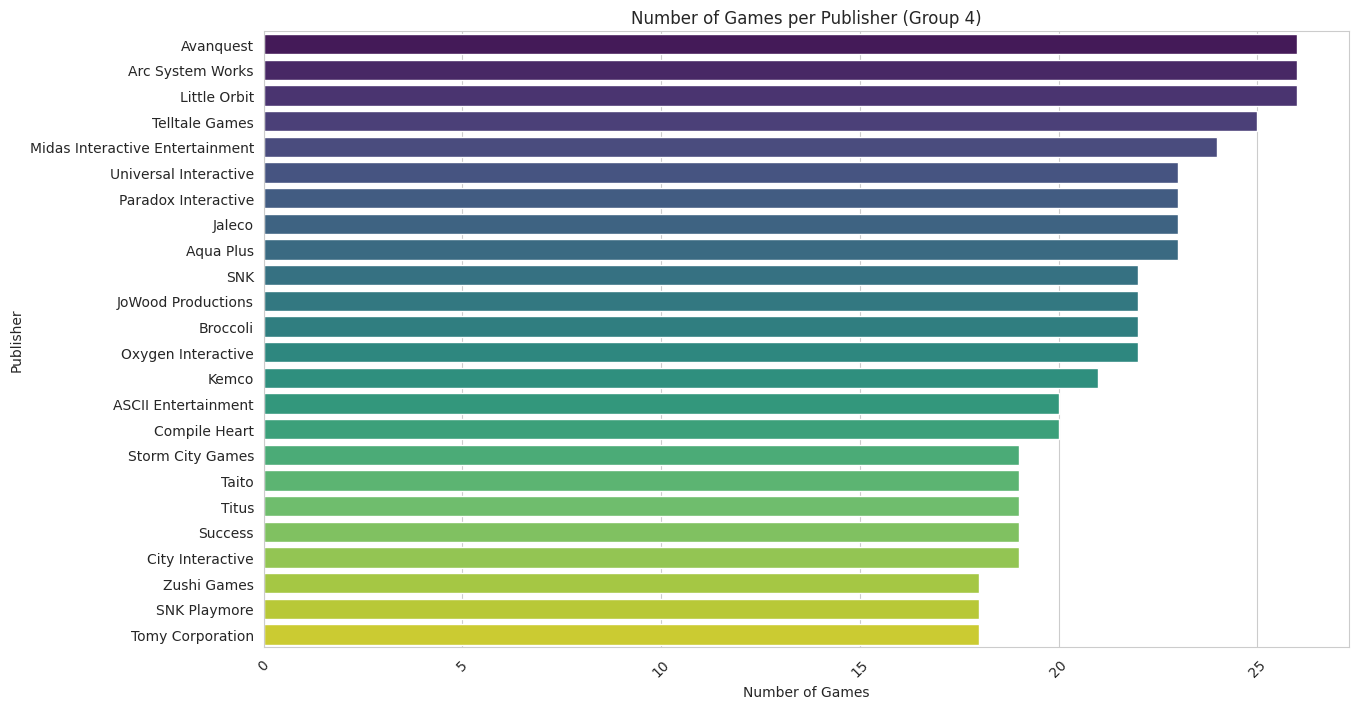

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


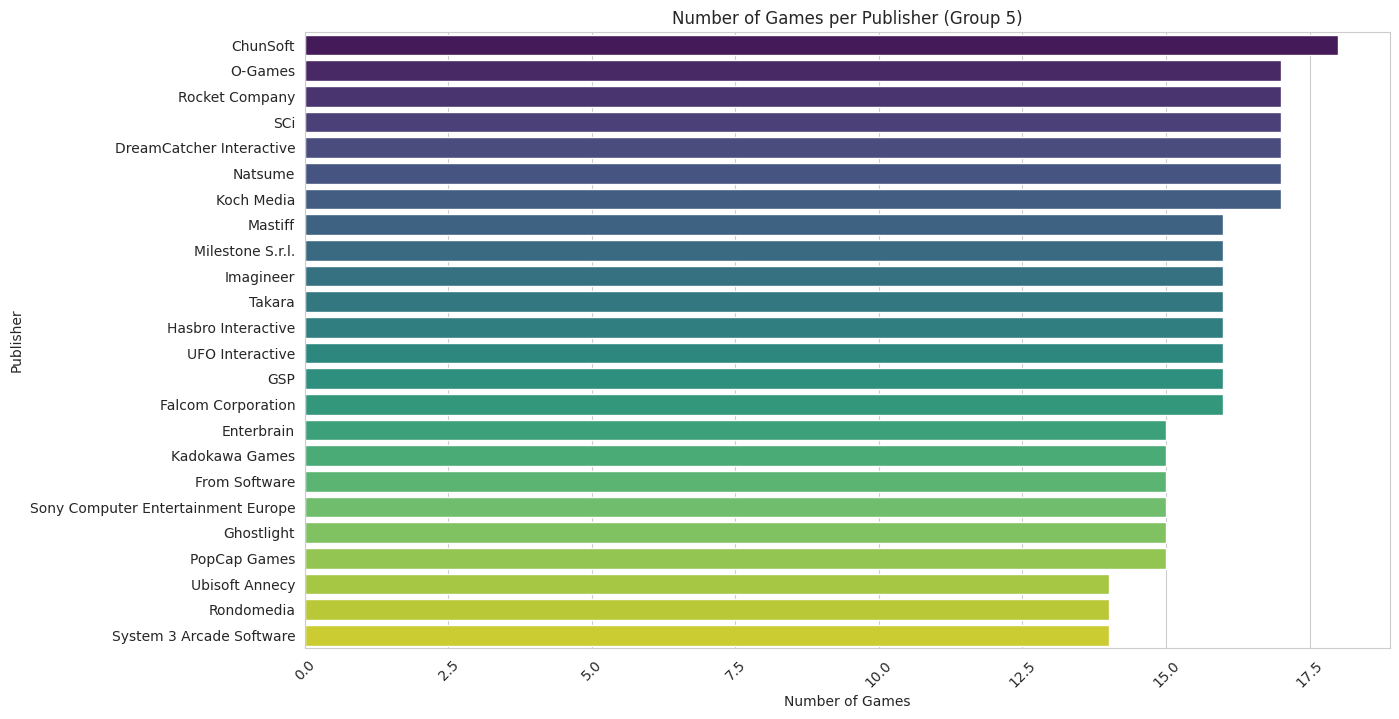

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


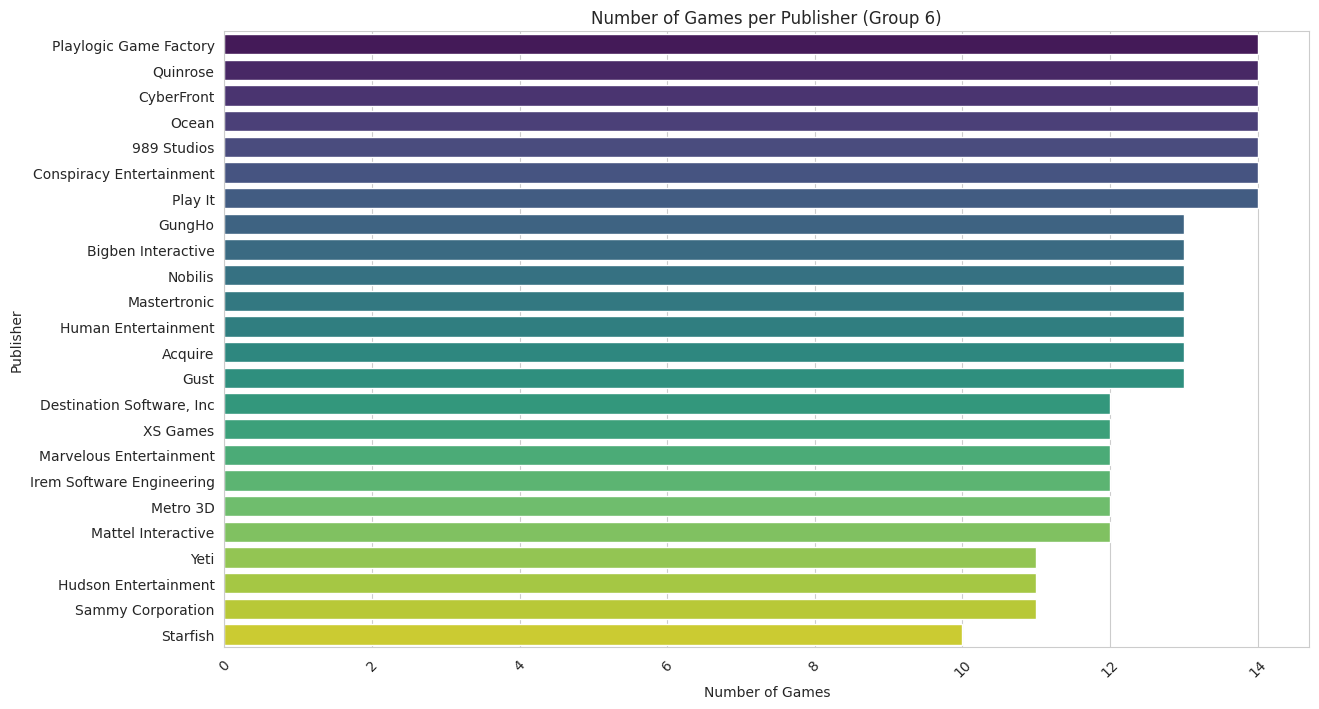

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


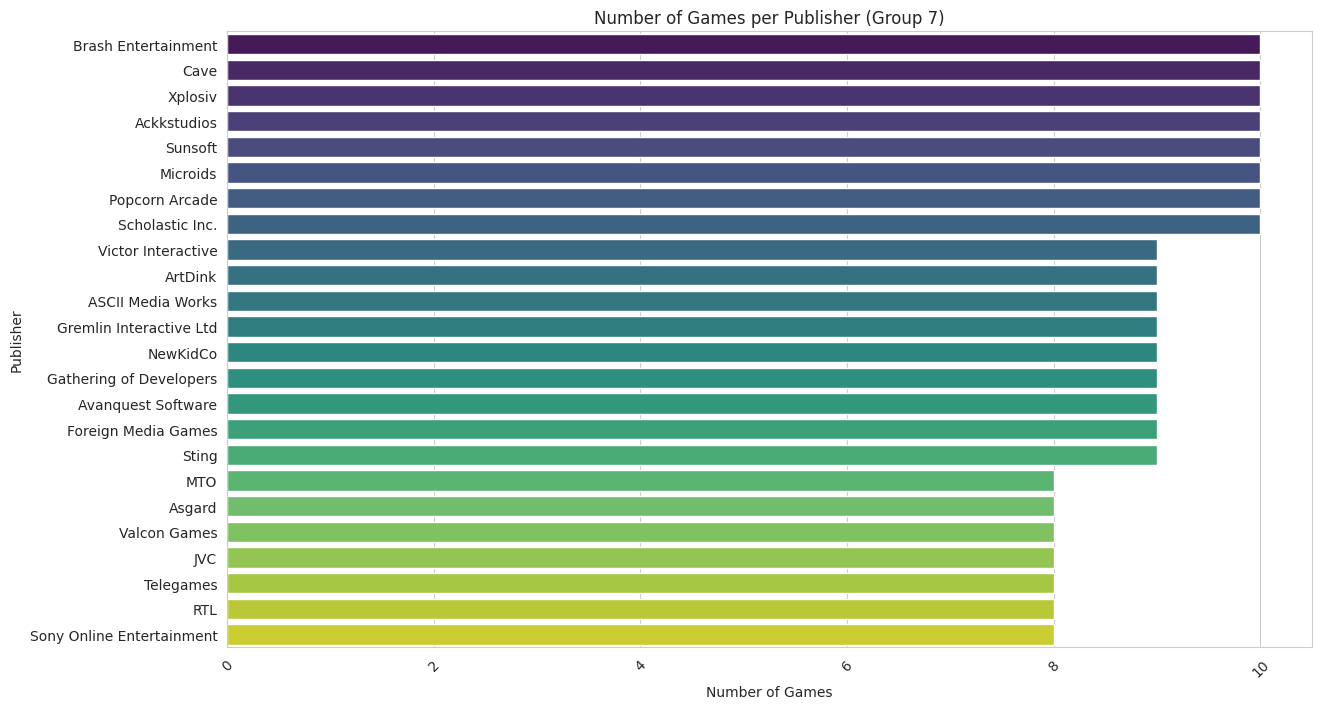

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


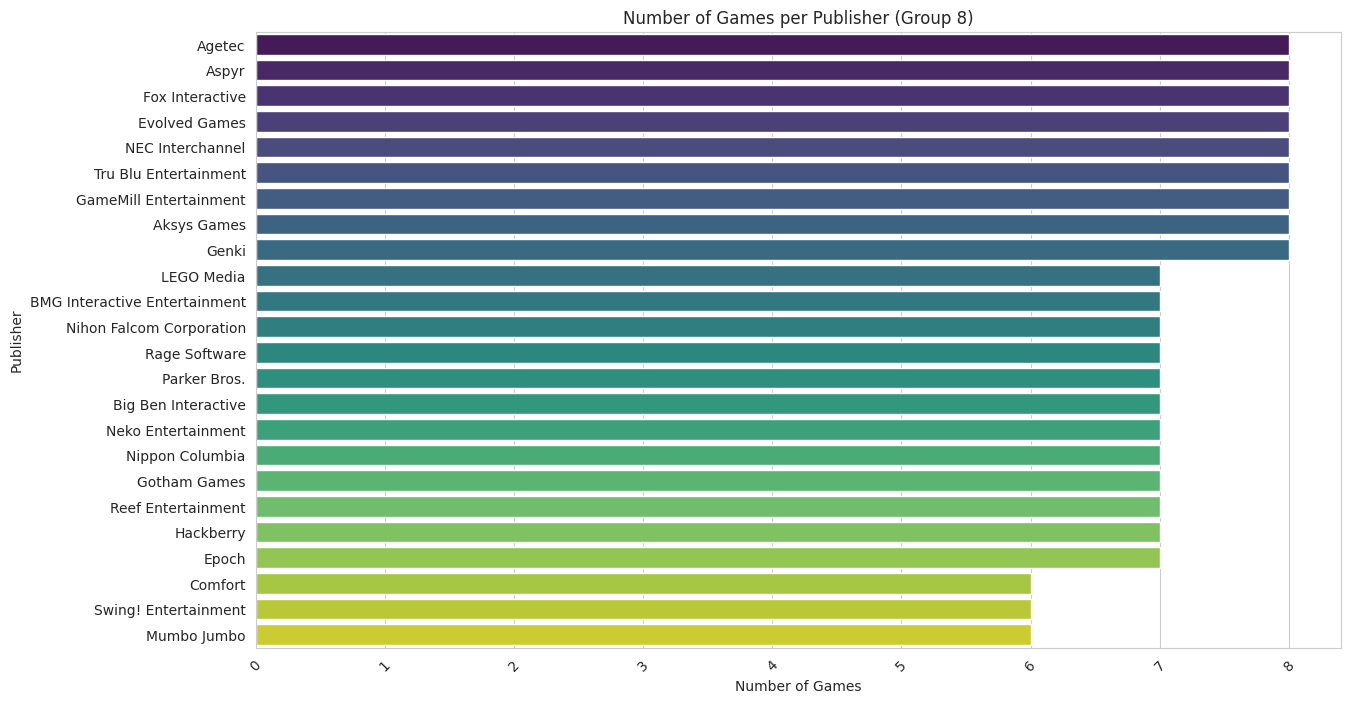

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


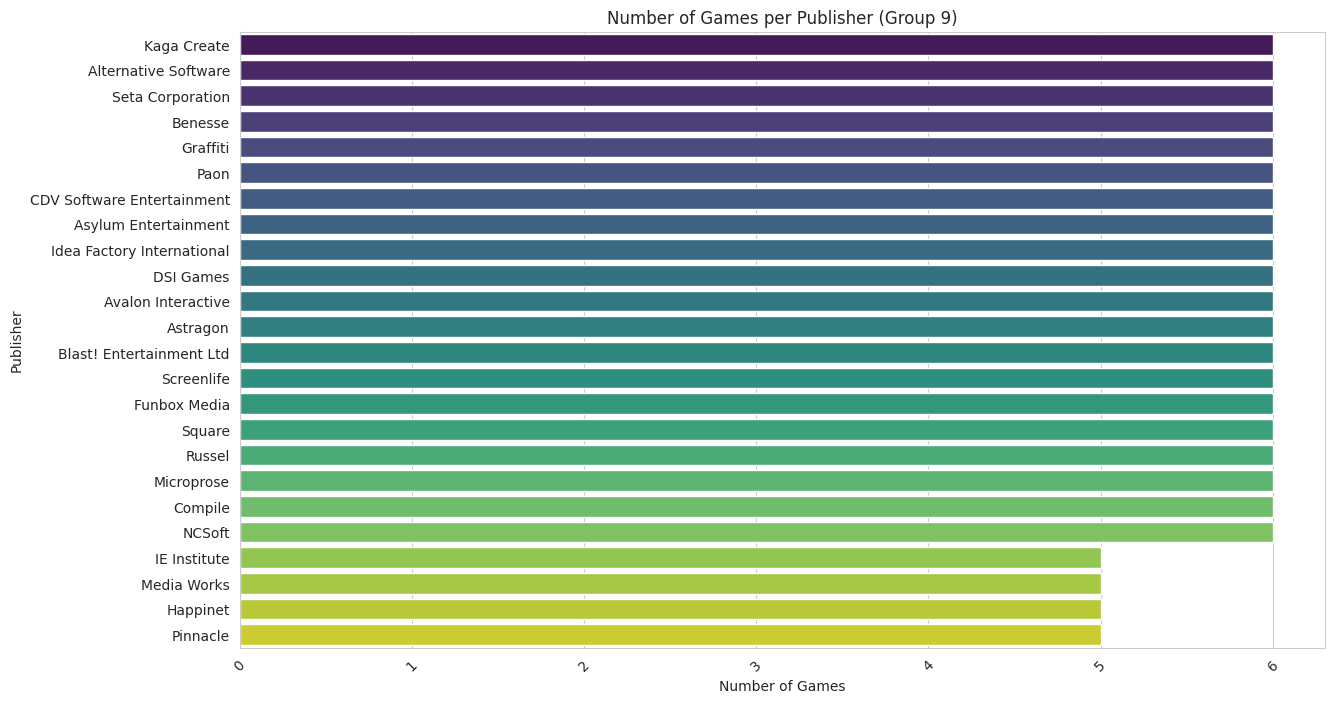

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


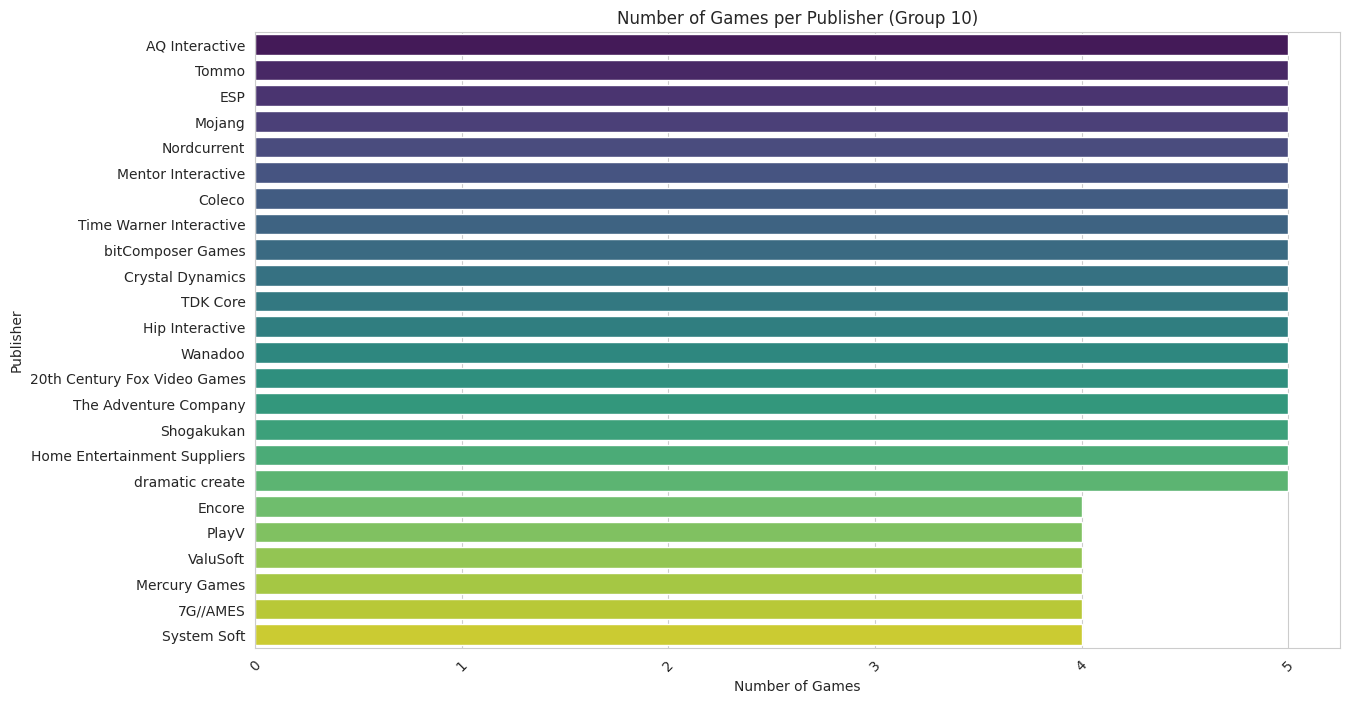

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


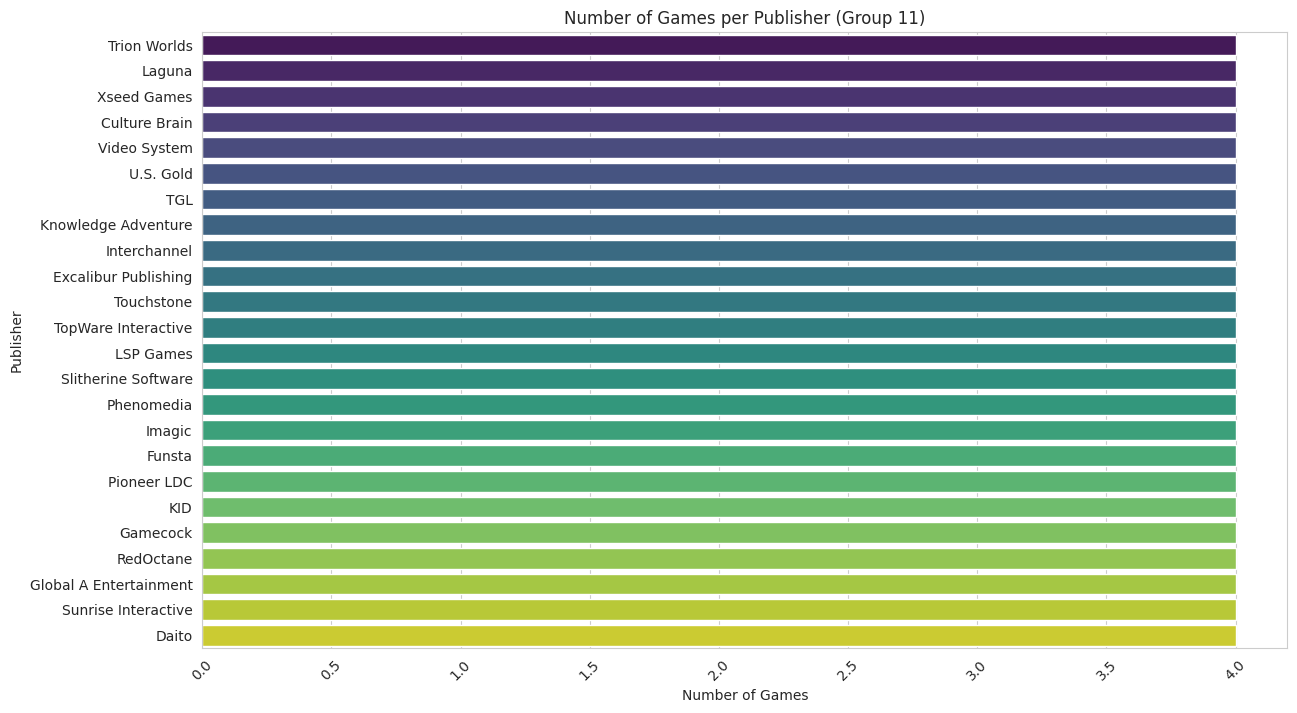

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


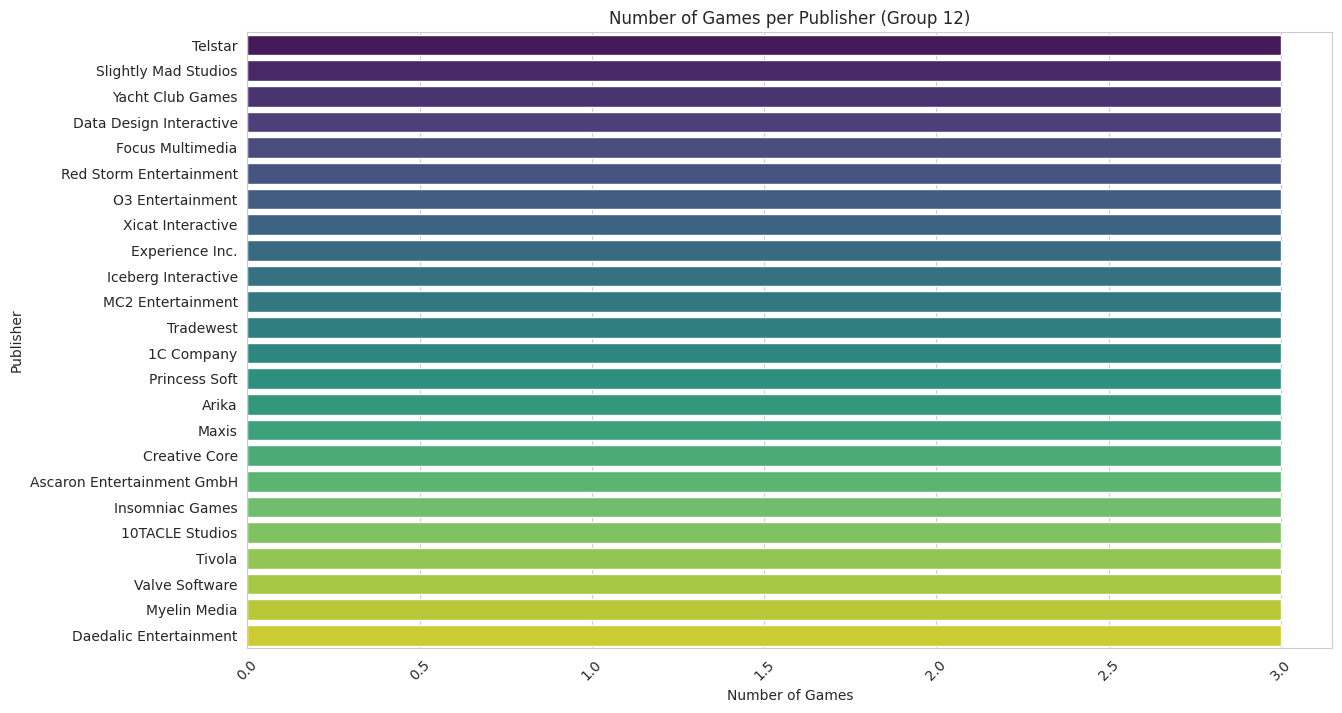

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


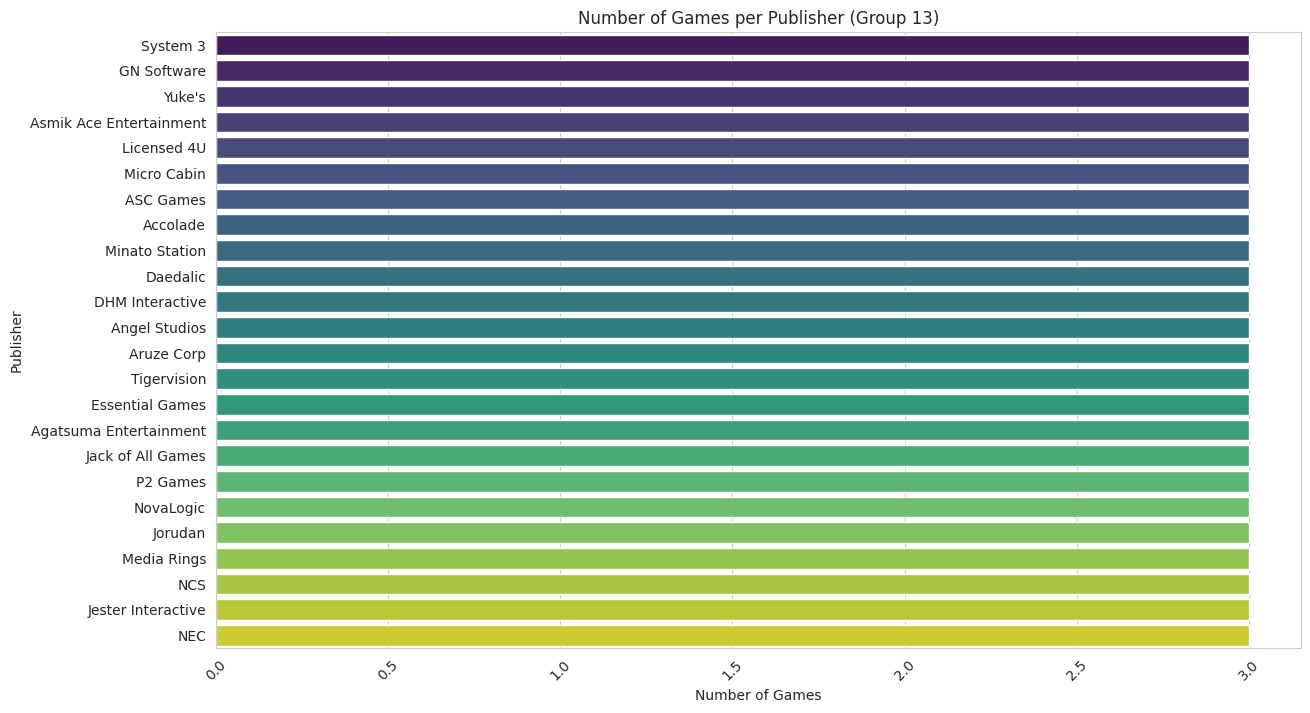

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


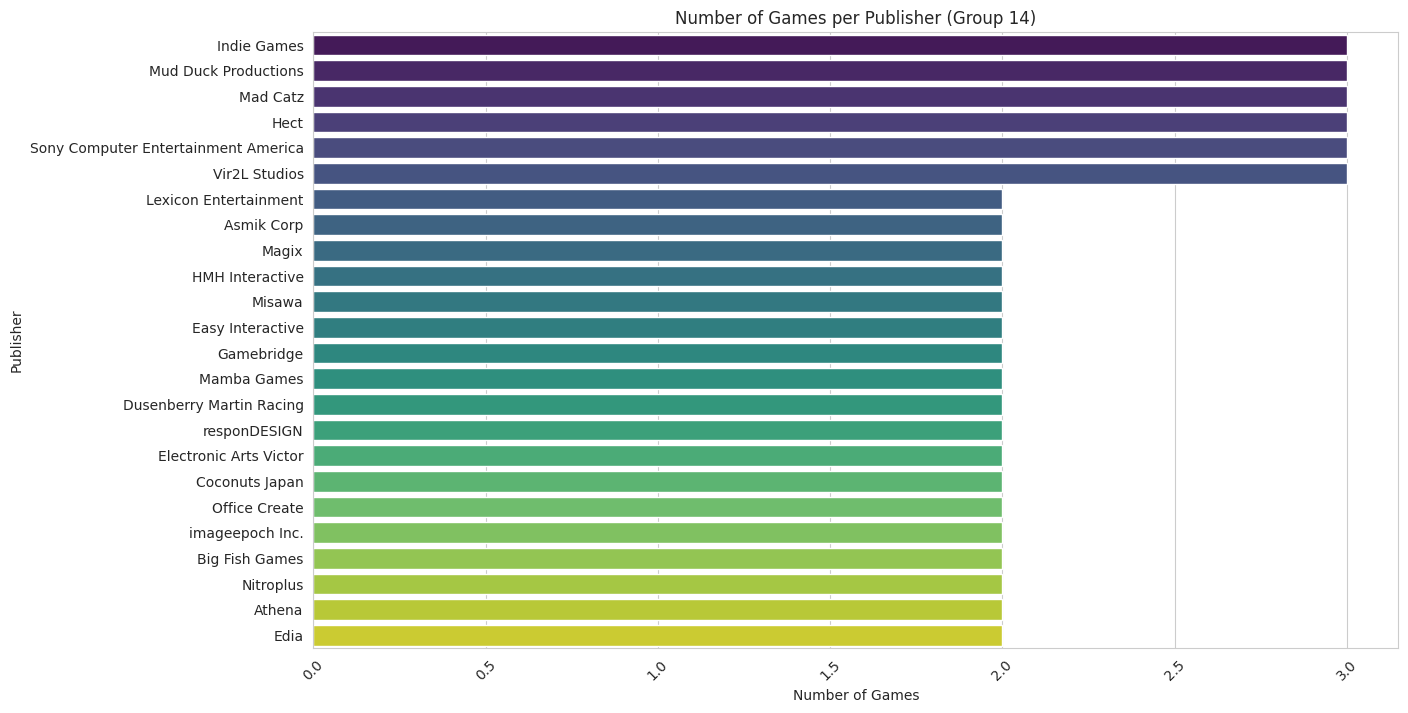

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


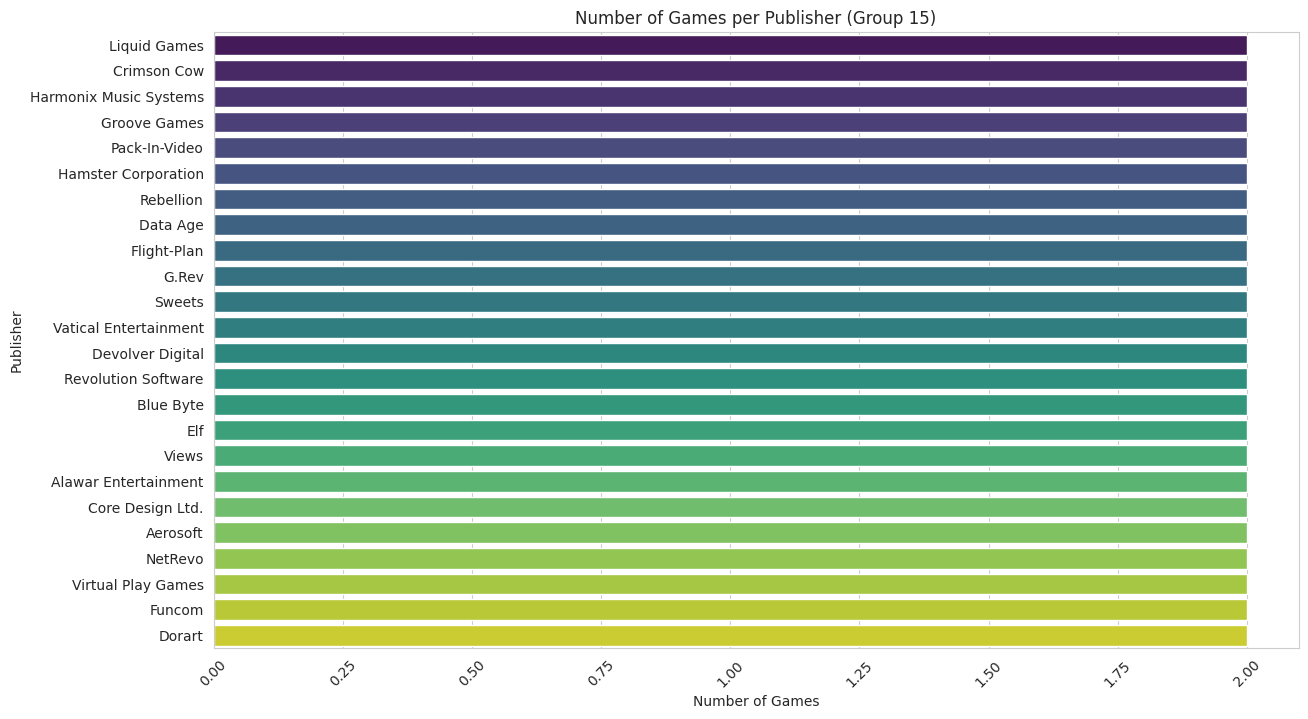

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


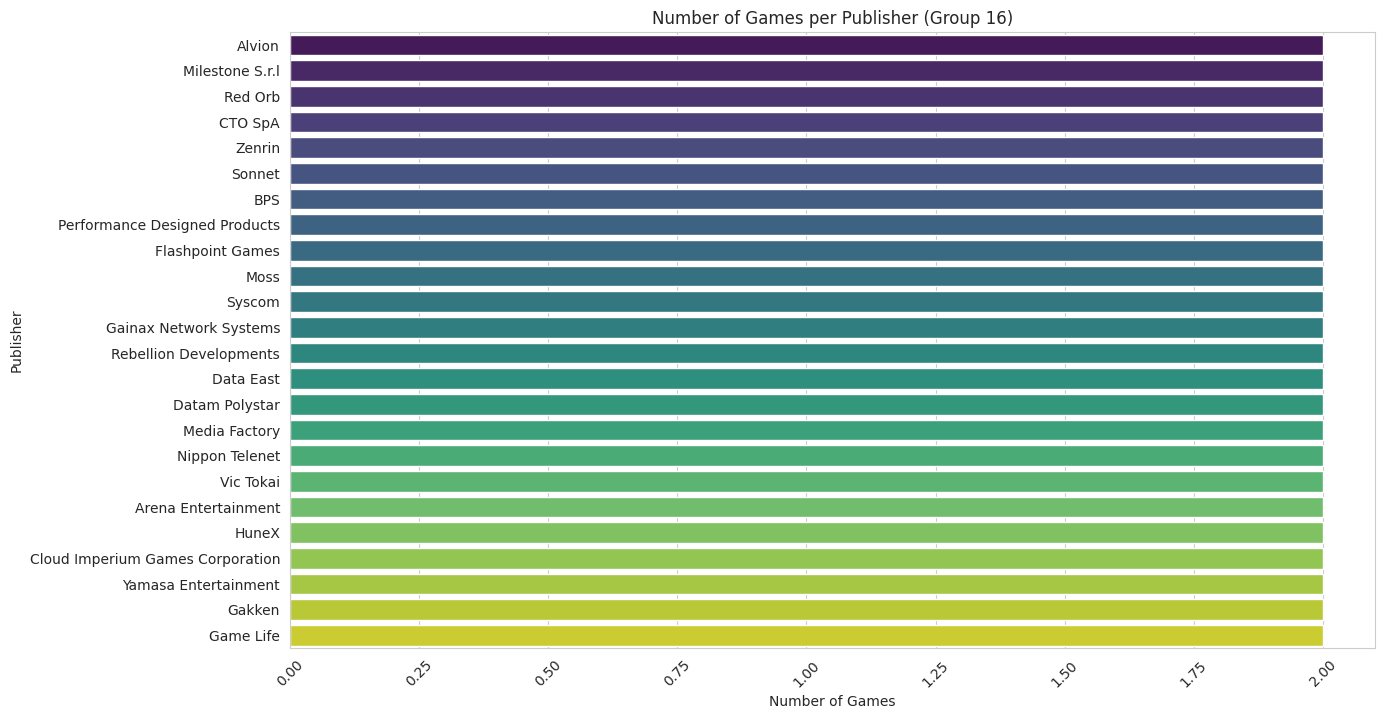

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


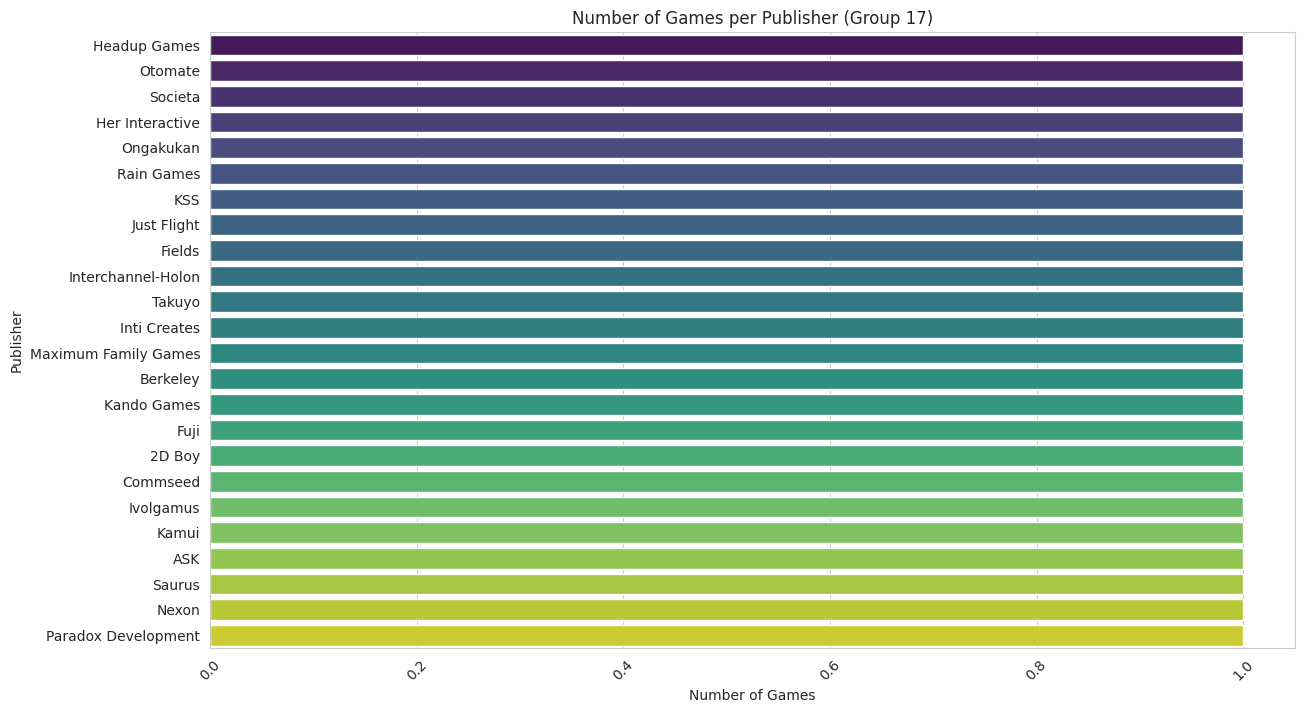

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


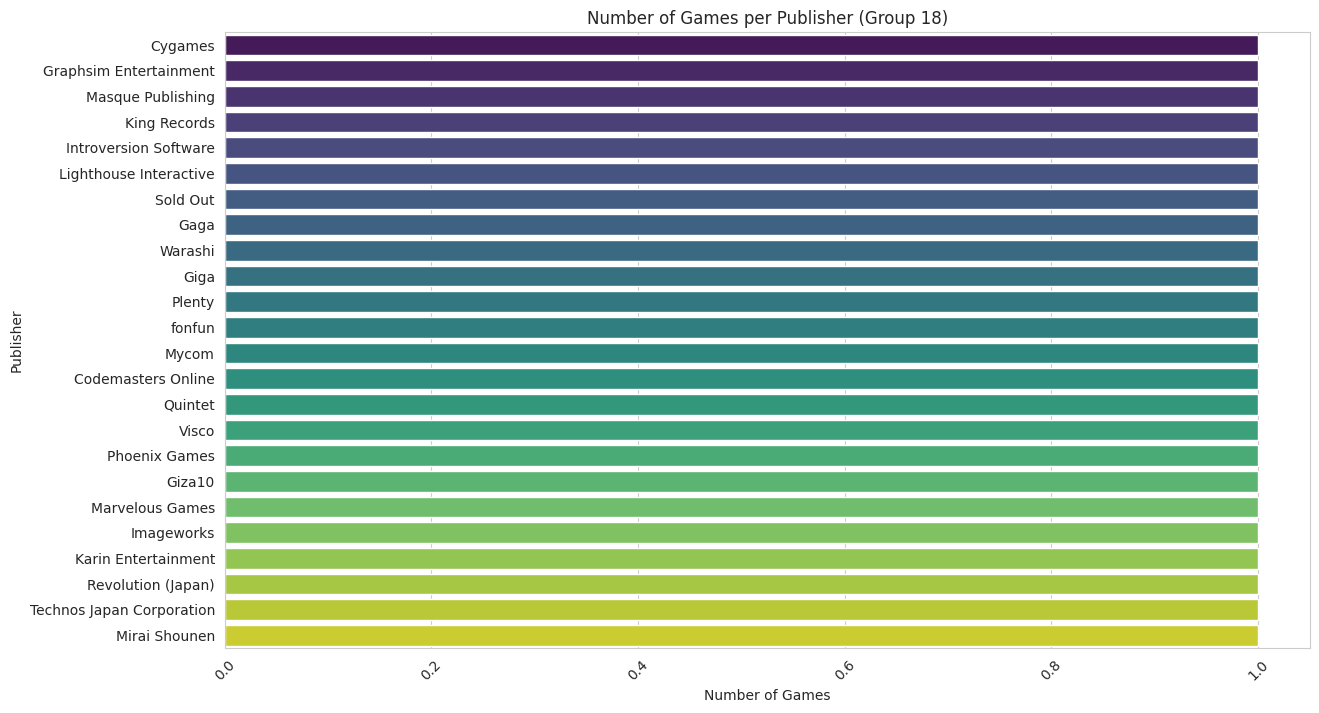

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


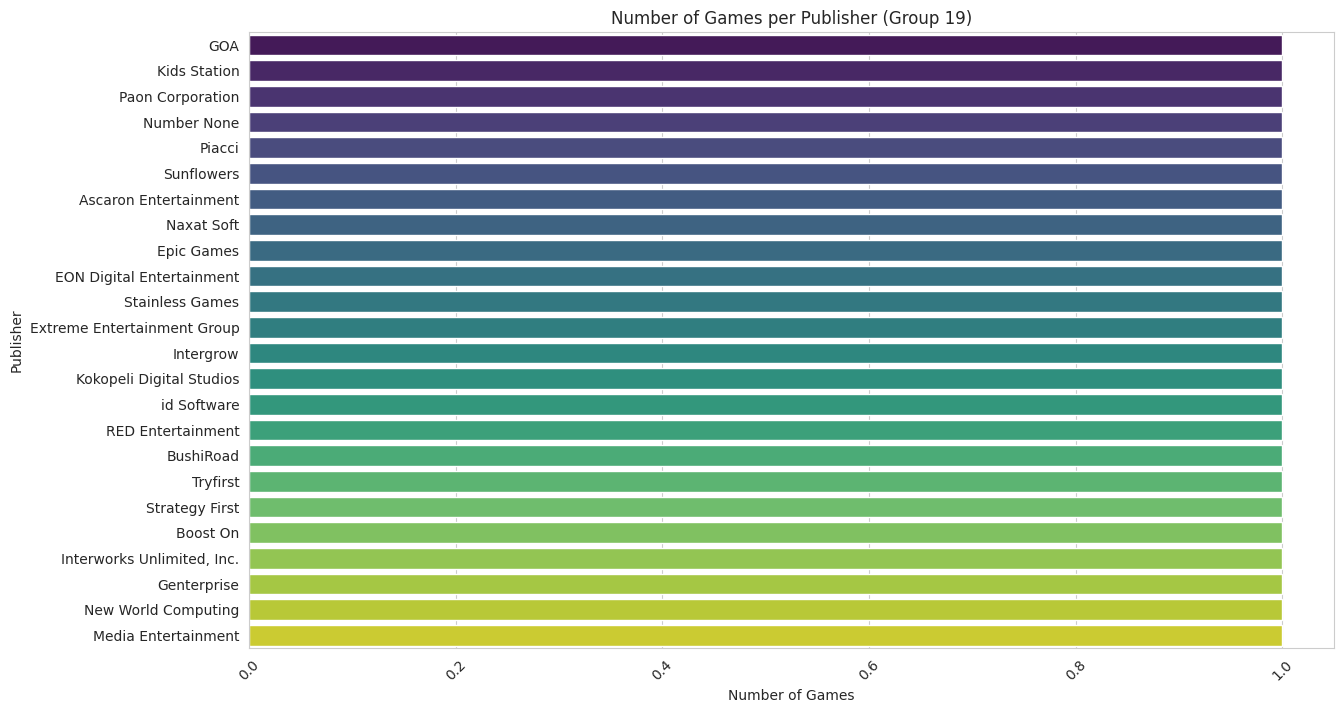

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


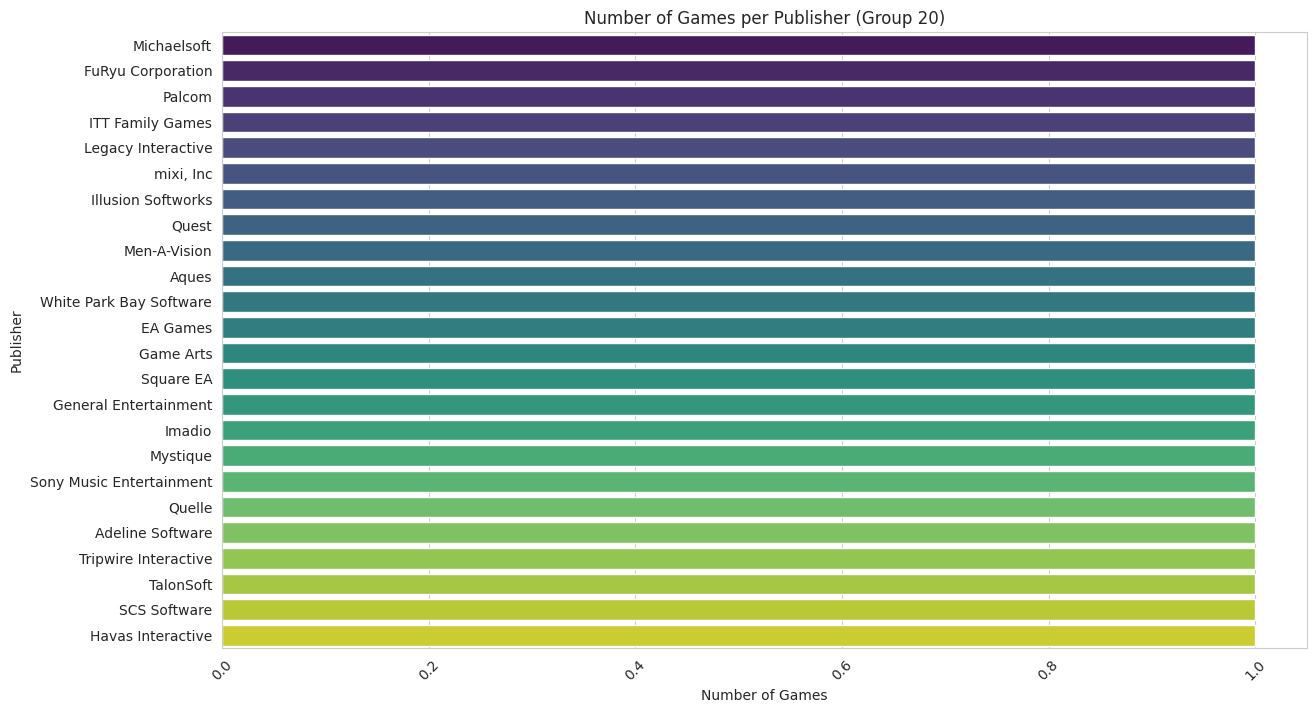

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


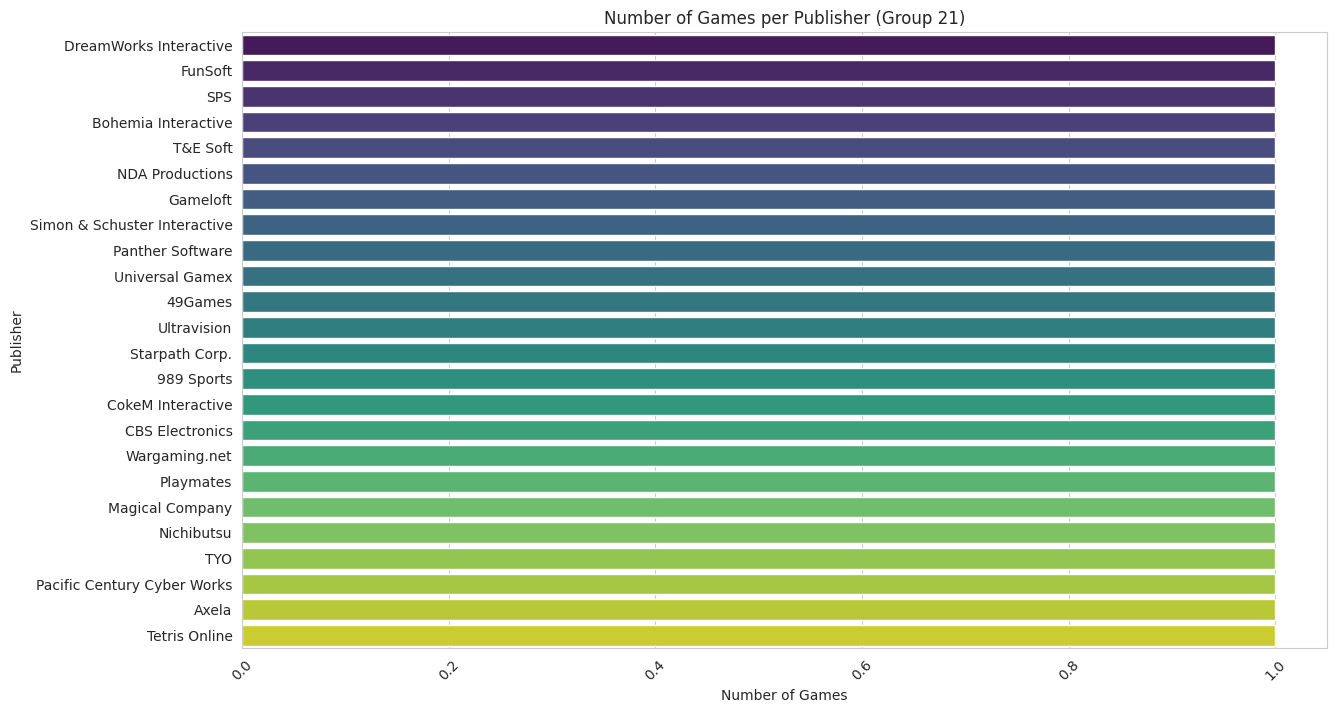

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


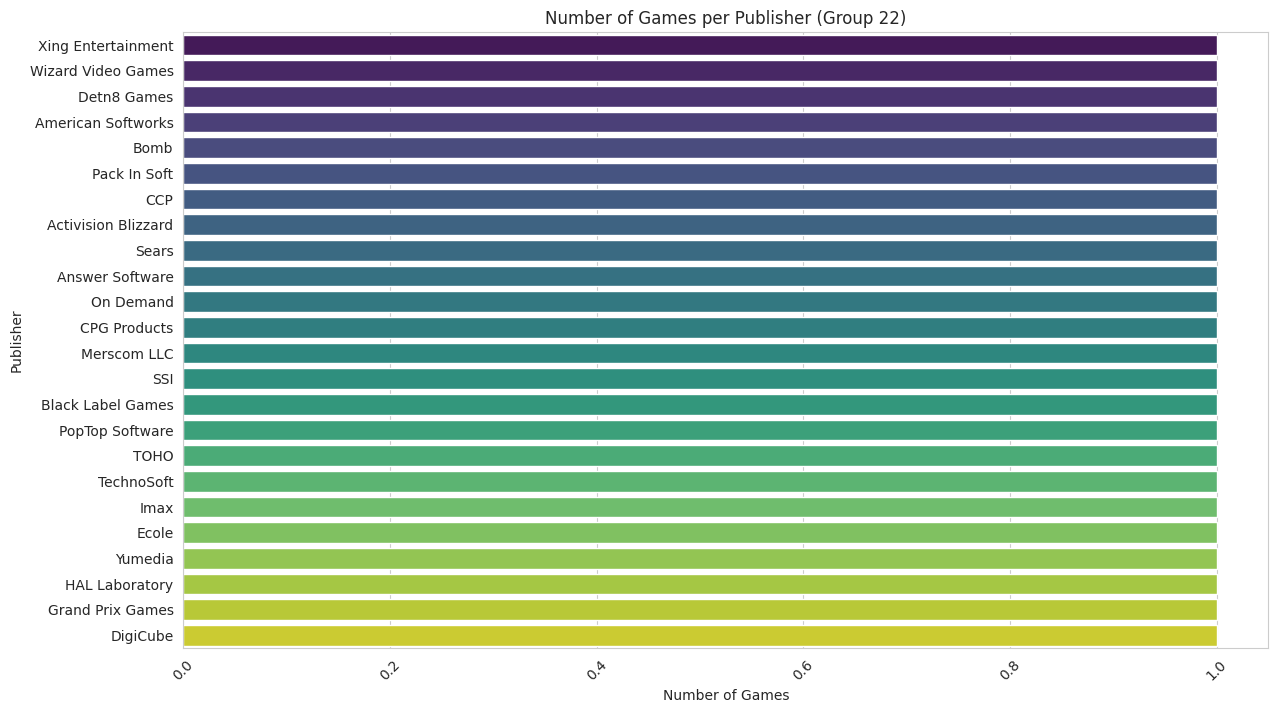

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


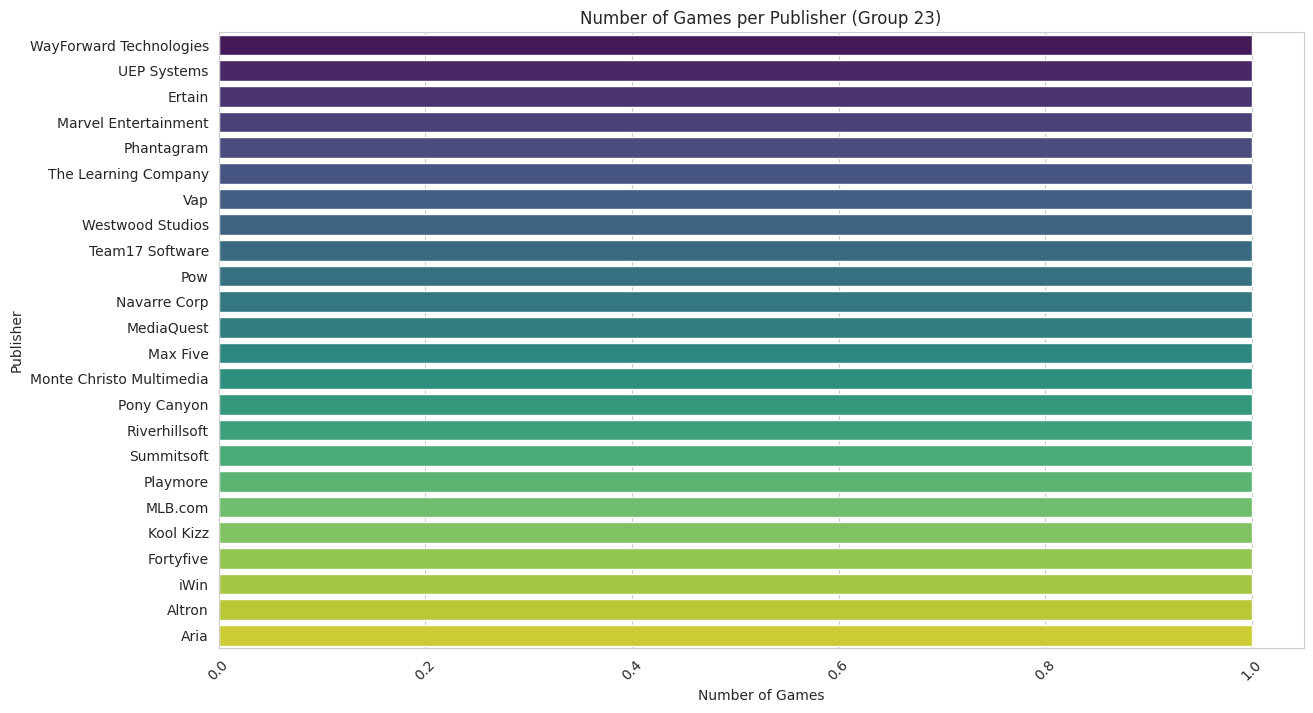

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


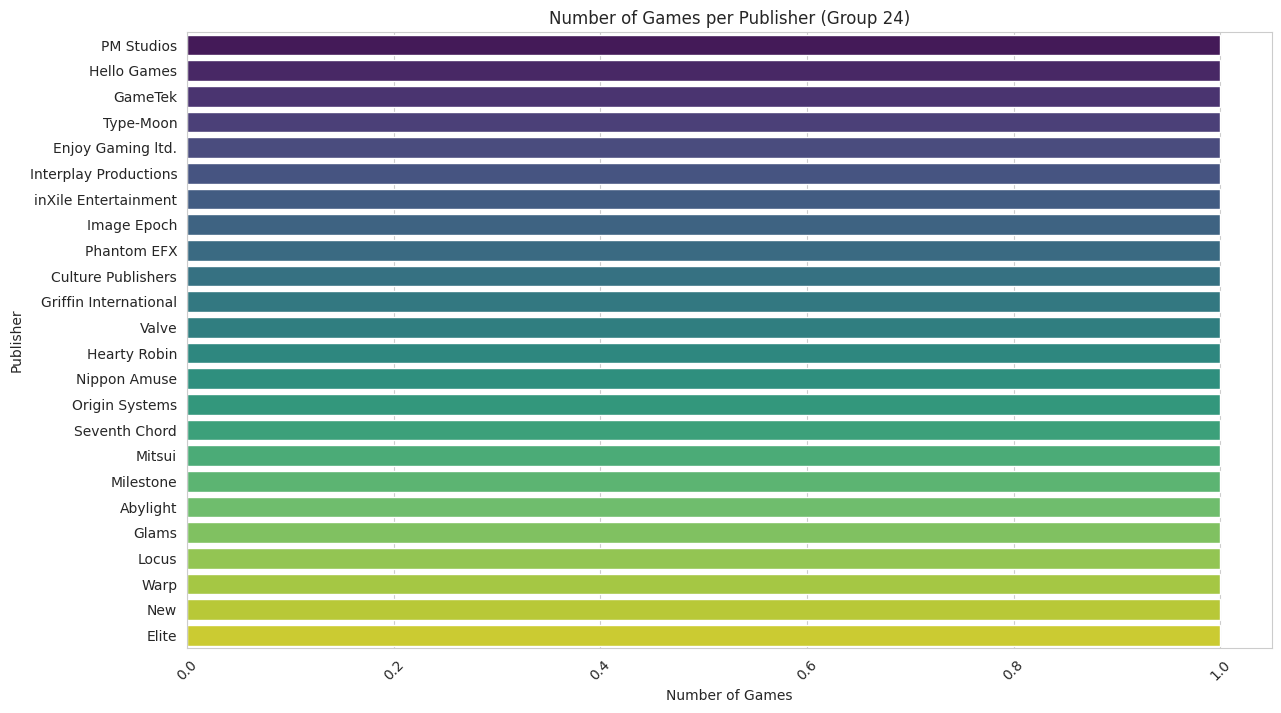

<ipython-input-64-0100e6cc2c31>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game_Count', y='Publisher', data=subset, palette='viridis')


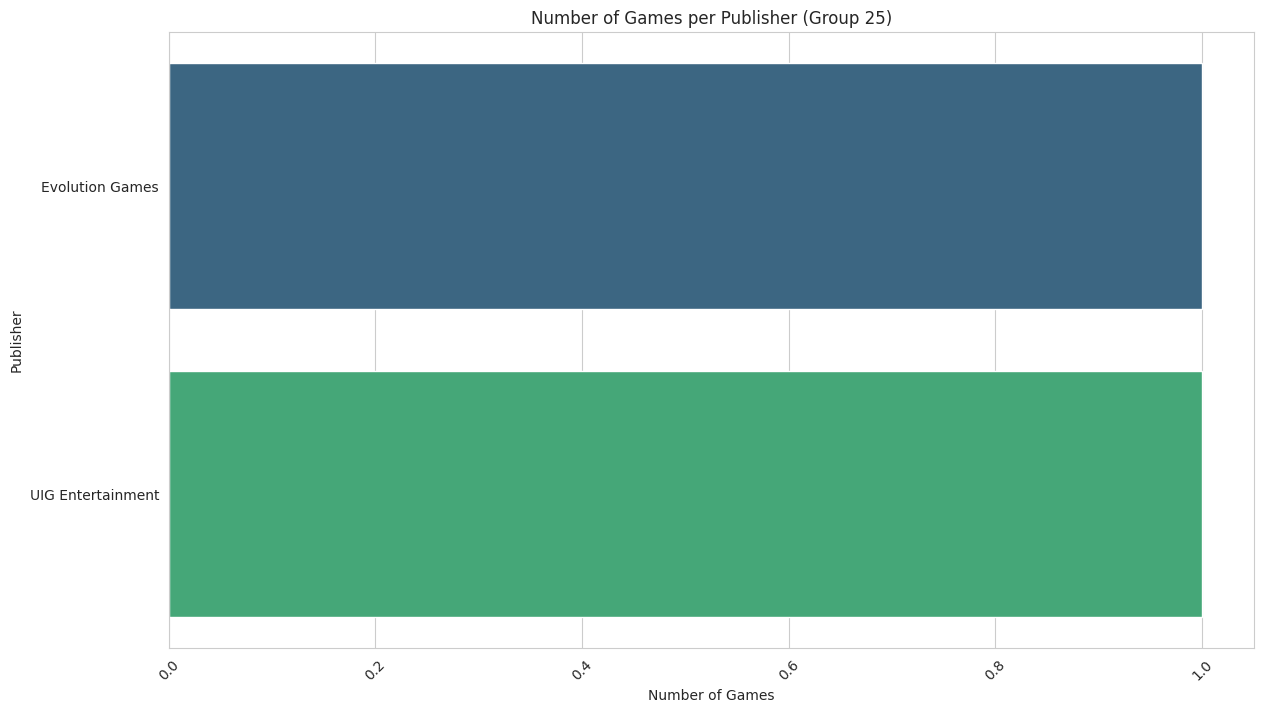

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 根據發行商進行分組並計算遊戲數目
Publisher_count = data["Publisher"].value_counts().reset_index()
Publisher_count.columns = ["Publisher", "Game_Count"]

# 定義每個子圖顯示的發行商數量
num_Publishers_per_plot = math.ceil(len(Publisher_count) / 25)

# 繪製多個直方圖
for i in range(25):
    start_idx = i * num_Publishers_per_plot
    end_idx = start_idx + num_Publishers_per_plot
    subset = Publisher_count.iloc[start_idx:end_idx]

    plt.figure(figsize=(14, 8))
    sns.barplot(x="Game_Count", y="Publisher", data=subset, palette="viridis")
    plt.title(f"Number of Games per Publisher (Group {i + 1})")
    plt.xlabel("Number of Games")
    plt.ylabel("Publisher")
    plt.xticks(rotation=45)
    plt.show()


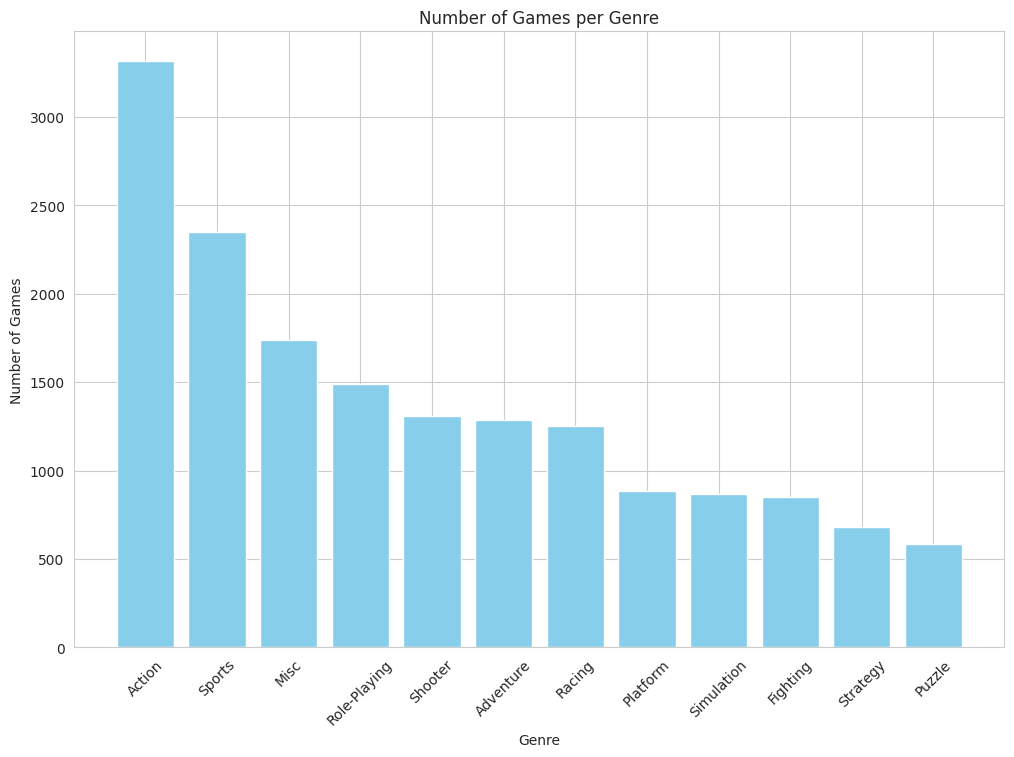

In [5]:
# 畫出直方圖用來顯示不同電玩總類的總數 (限制使用 Matplotlib)
import matplotlib.pyplot as plt

# 根據遊戲類型進行分組並計算遊戲數量
genre_counts = data["Genre"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Game_Count"]

# 繪製直方圖
plt.figure(figsize=(12, 8))
plt.bar(genre_counts["Genre"], genre_counts["Game_Count"], color="skyblue")
plt.title("Number of Games per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)  # 旋轉x軸標籤以防止擁擠
plt.show()


# 每年的遊戲數目 countplot()

In [7]:
# 統計每一年遊戲發行的總數
data["Year"].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

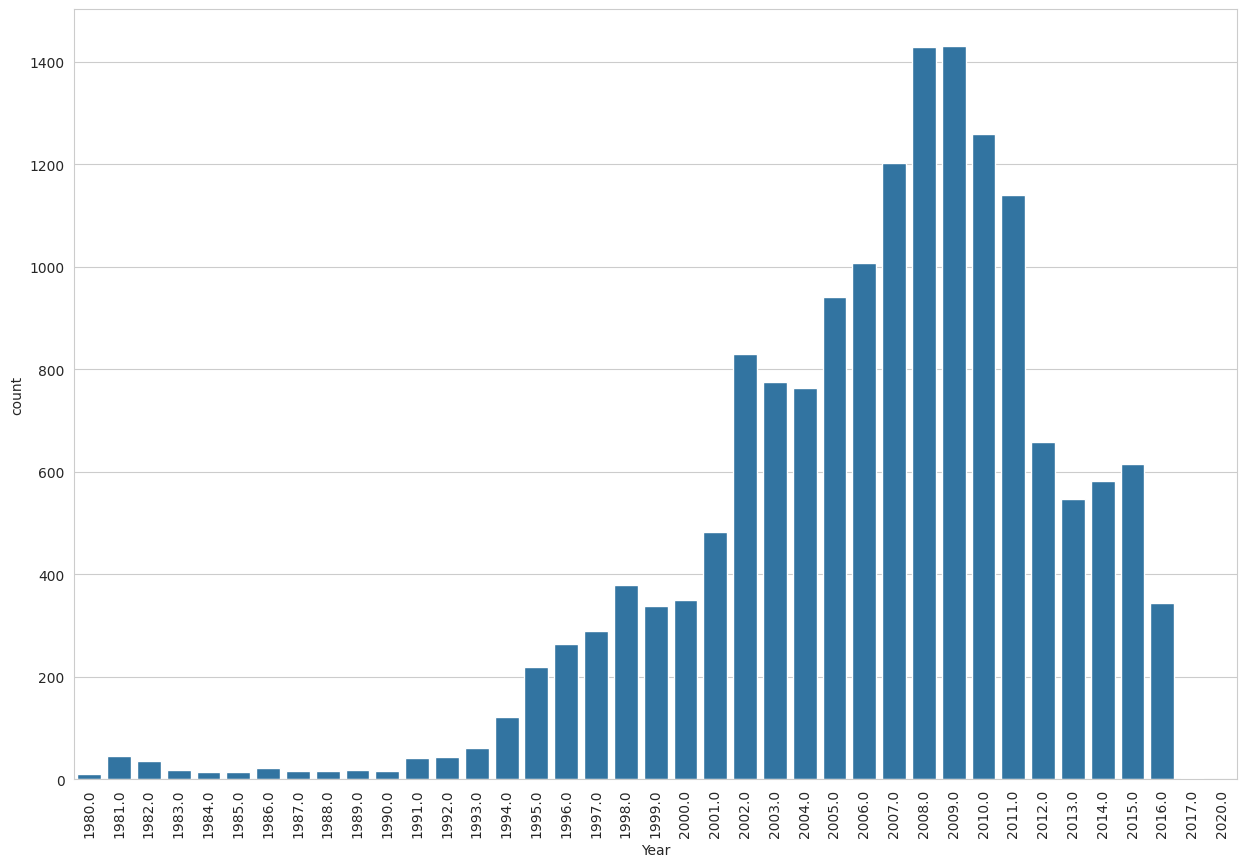

In [ ]:
# 畫出直方圖用來顯示每一年發行的遊戲數目
plt.figure(figsize=(15, 10))
sns.countplot(x = "Year", data = data)
plt.xticks(rotation = 90)
plt.show()

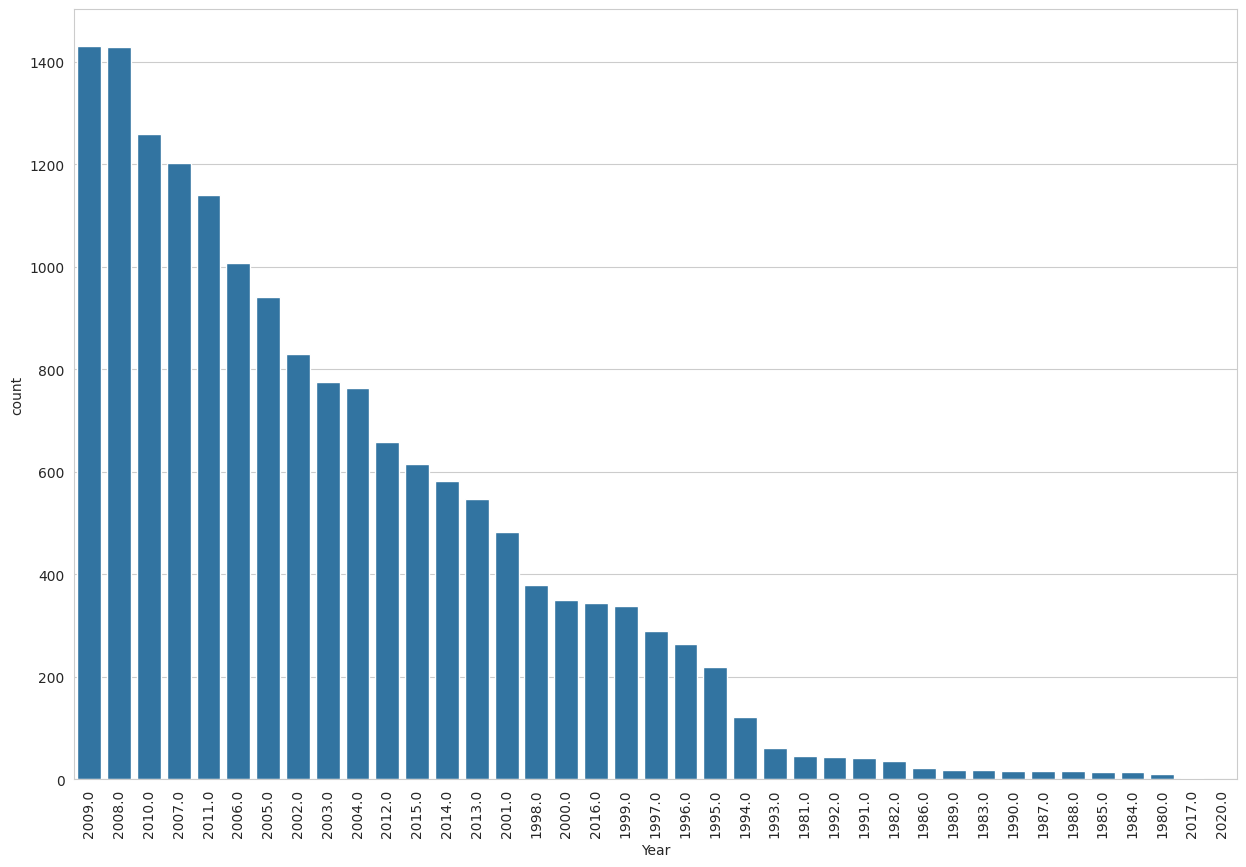

In [ ]:
# 將上面的直方圖根據發行遊戲數目來排序
# 提示 countplot() 中有個參數order可以用來限制X軸的順序
# 要先產生正確的Year順序當成order的資料
plt.figure(figsize=(15, 10))
sns.countplot(x = "Year", data = data, order = data["Year"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

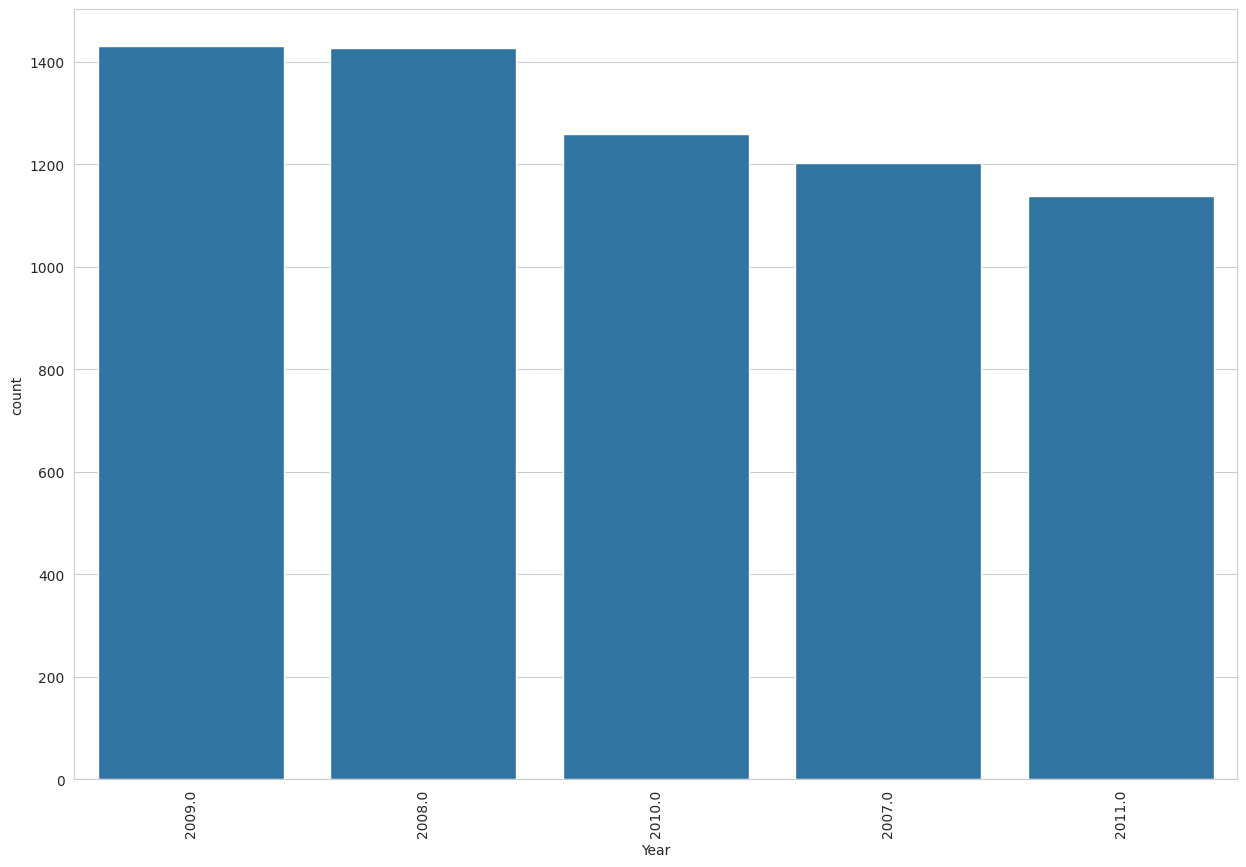

In [ ]:
# 根據上圖，但是只顯示前五個發行遊戲最多的年份
# plt.figure(figsize=(15, 10))
plt.figure(figsize=(15, 10))
sns.countplot(x = "Year", data = data, order = data["Year"].value_counts().index[:5])
plt.xticks(rotation = 90)
plt.show()

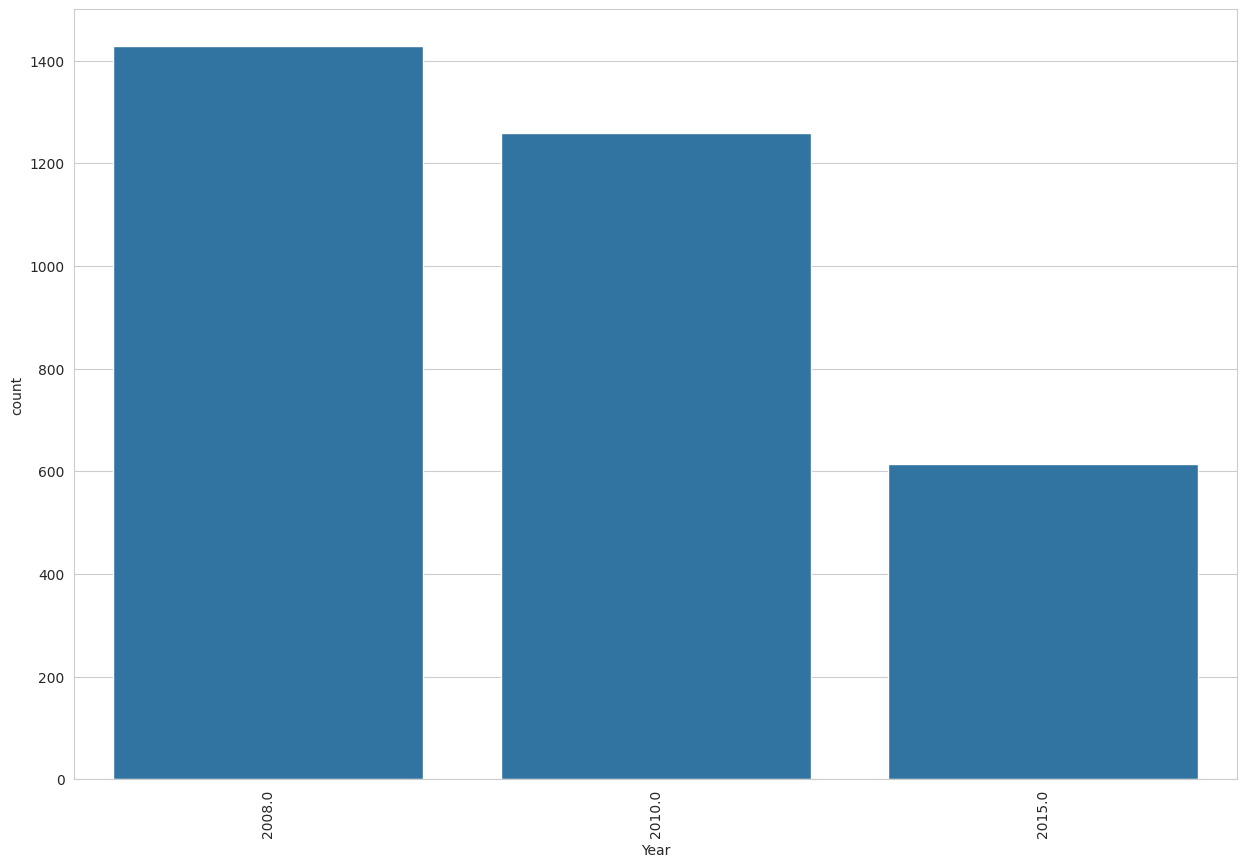

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x = "Year", data = data, order = [2008.0, 2010.0, 2015.0])
plt.xticks(rotation = 90)
plt.show()

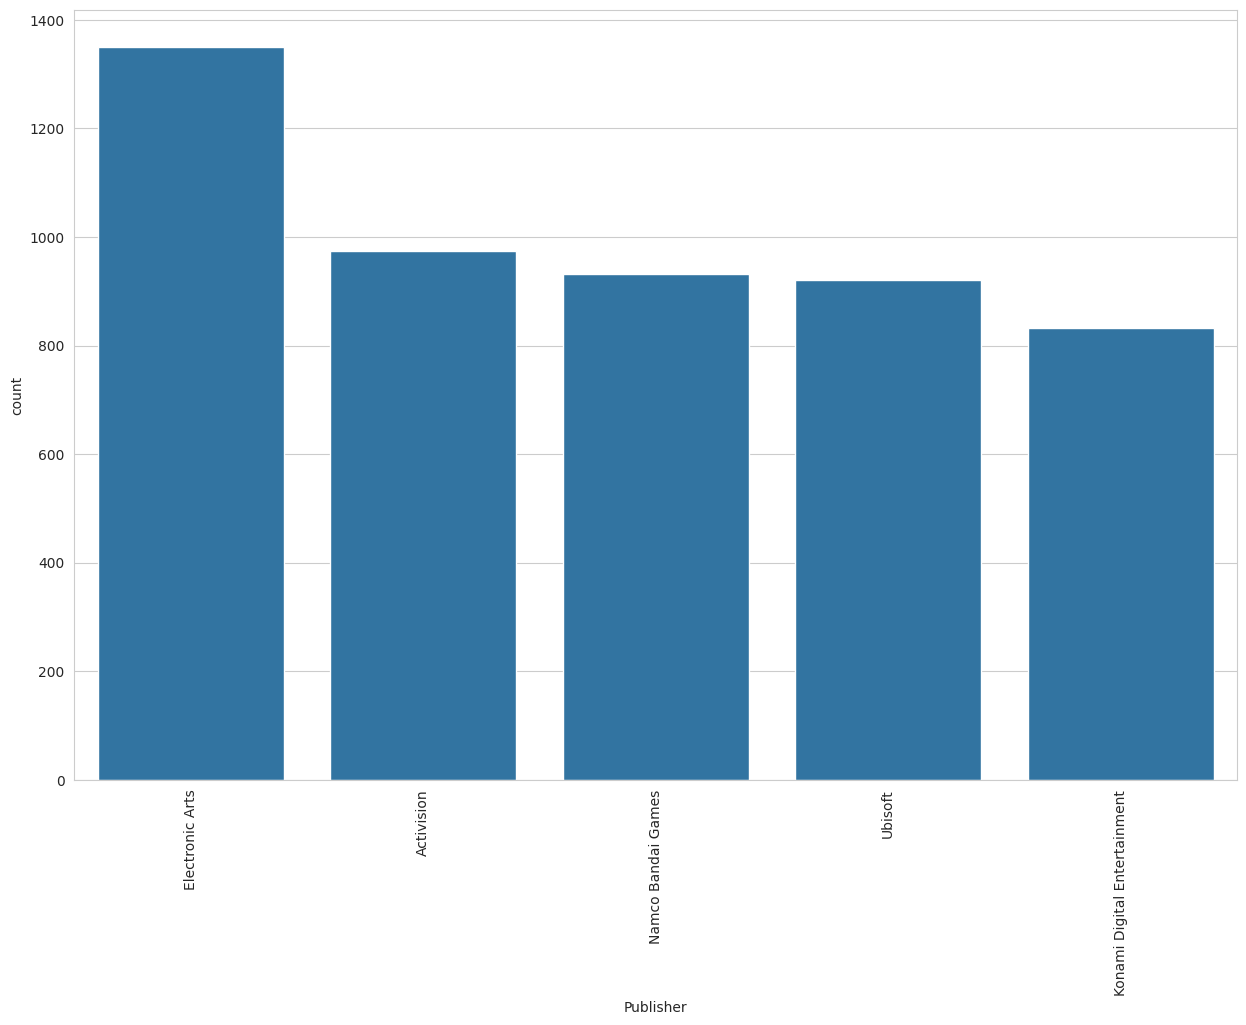

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五名發行商
plt.figure(figsize=(15, 10))
sns.countplot(x = "Publisher", data = data, order = data["Publisher"].value_counts().index[:5])
plt.xticks(rotation = 90)
plt.show()

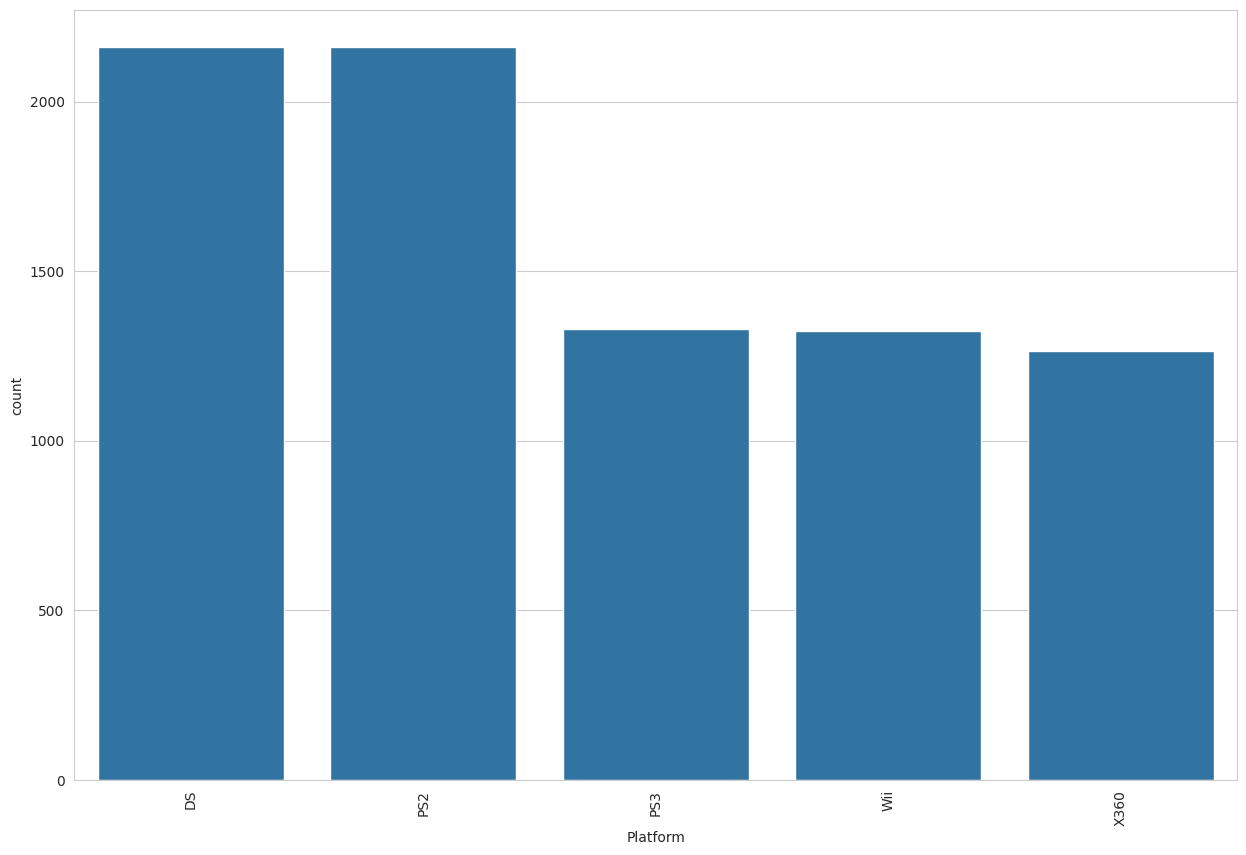

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五種平台\
plt.figure(figsize=(15, 10))
sns.countplot(x = "Platform", data = data, order = data["Platform"].value_counts().index[:5])
plt.xticks(rotation = 90)
plt.show()

### 加入hue

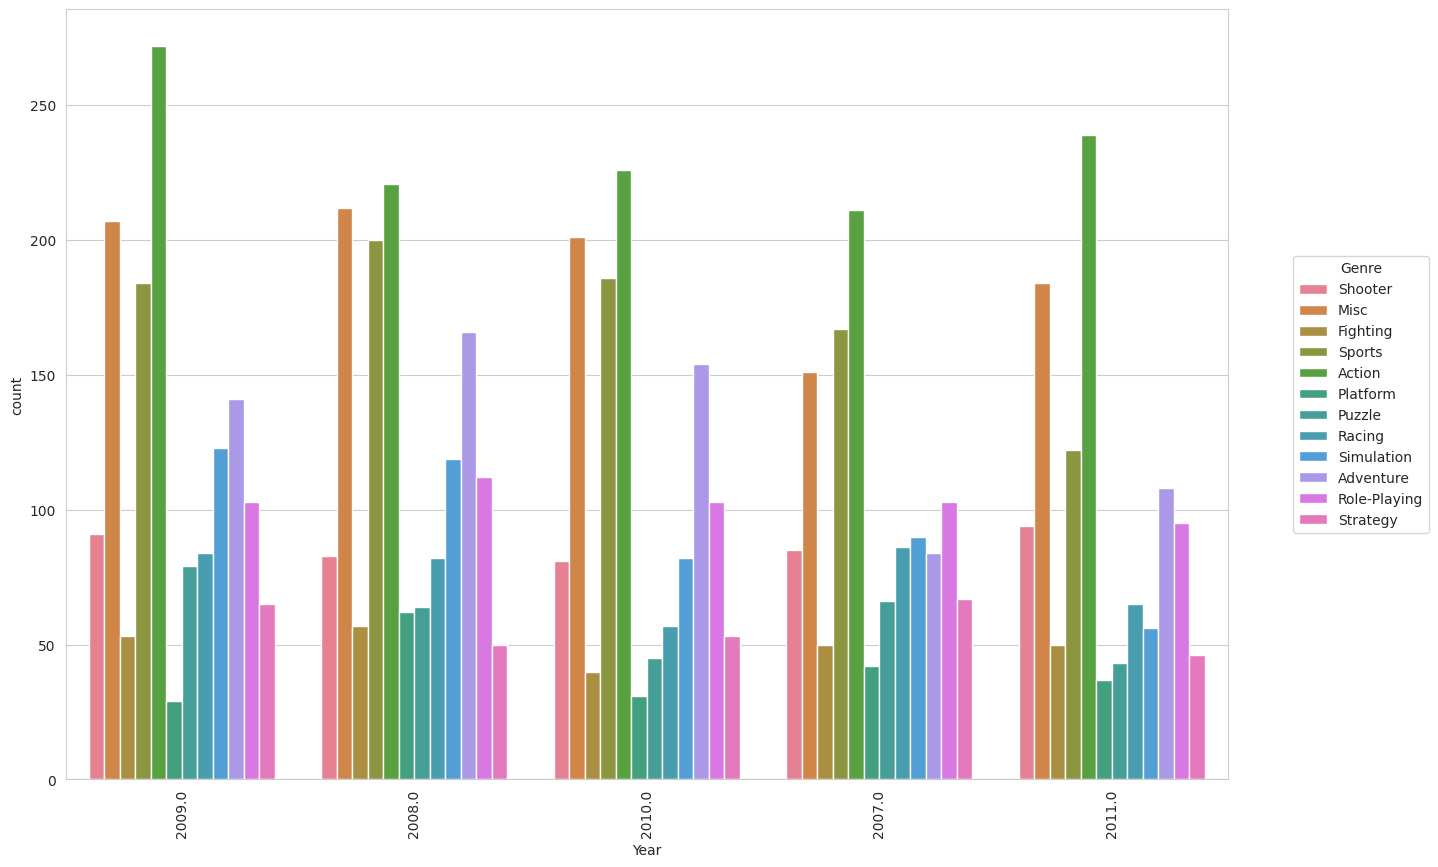

In [ ]:
# 畫出直方圖顯示：
# 發行電玩數量最多的前五年的數量
# 依據電玩種類分別顯示
plt.figure(figsize=(15, 10))
sns.countplot(x = "Year", data = data, order = data["Year"].value_counts().index[:5], hue = "Genre")
plt.xticks(rotation = 90)
plt.legend(title = "Genre", bbox_to_anchor = (1.05, 0.5), loc = "center left")
plt.show()

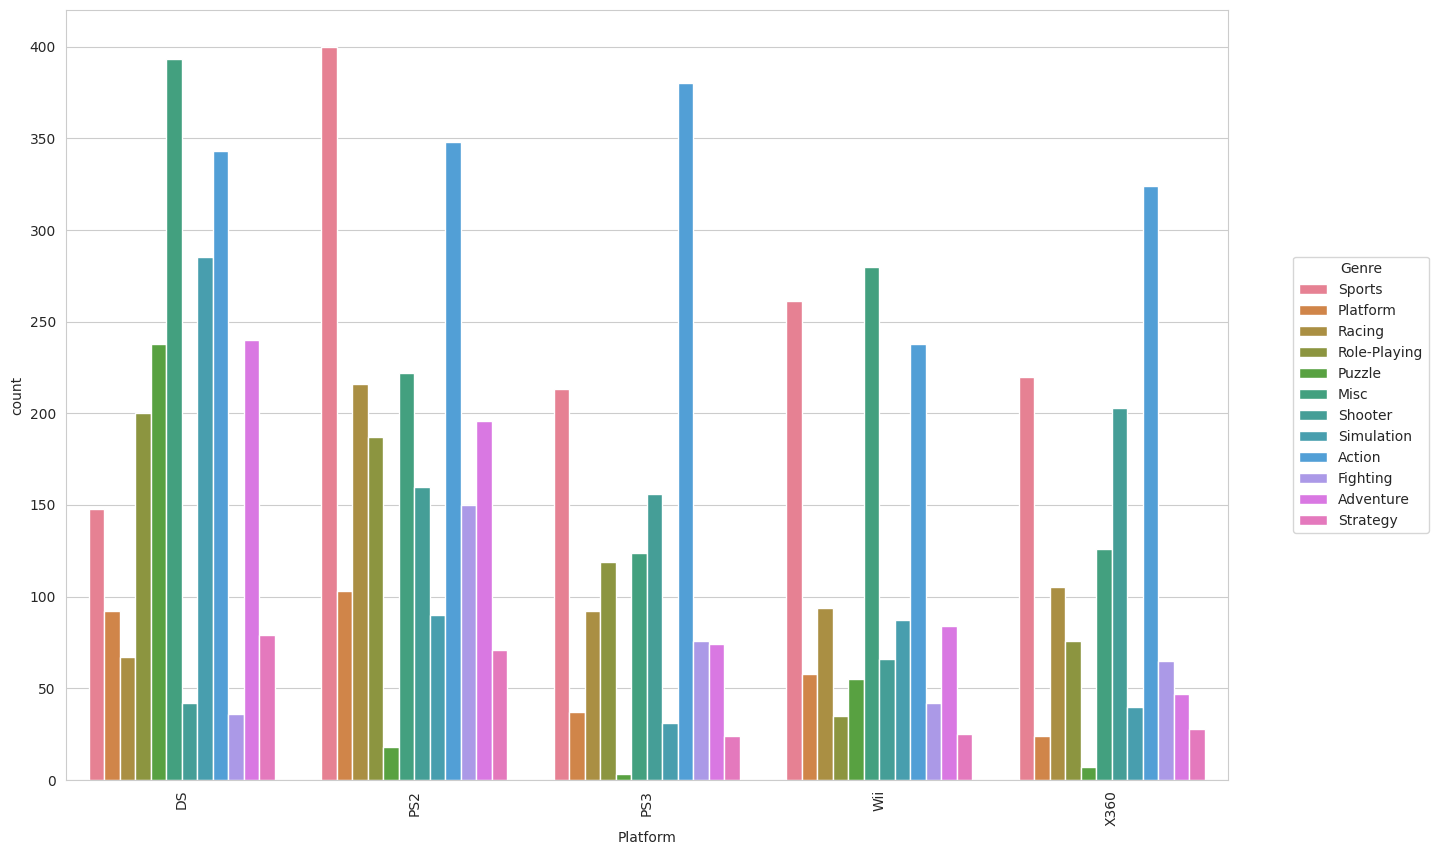

In [ ]:
#練習題
# 畫出直方圖顯示：
# 發行電玩數目最多的前五個平台
# 依據電玩種類分別顯示發行遊戲數目
plt.figure(figsize=(15, 10))
sns.countplot(x = "Platform", data = data, order = data["Platform"].value_counts().index[:5], hue = "Genre")
plt.xticks(rotation = 90)
plt.legend(title = "Genre", bbox_to_anchor = (1.05, 0.5), loc = "center left")
plt.show()

# 每年的遊戲銷售總量 barplot()

In [ ]:
# 計算每年遊戲的銷售總量
data.groupby("Year")["Global_Sales"].sum()

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [ ]:
keys = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
data.groupby(["Year","Platform"])[keys].sum()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year   Platform                                                         
1980.0 2600         10.59      0.67      0.00         0.12         11.38
1981.0 2600         33.40      1.96      0.00         0.32         35.77
1982.0 2600         26.92      1.65      0.00         0.31         28.86
1983.0 2600          5.44      0.34      0.00         0.06          5.83
       NES           2.32      0.46      8.10         0.08         10.96
...                   ...       ...       ...          ...           ...
2016.0 X360          0.36      0.40      0.00         0.07          0.83
       XOne          6.69      4.63      0.01         1.05         12.37
2017.0 PS4           0.00      0.00      0.03         0.00          0.03
       PSV           0.00      0.00      0.02         0.00          0.02
2020.0 DS            0.27      0.00      0.00         0.02          0.29

[241 rows x 5 columns]

In [9]:
# 將Year從索引重新變成欄位
dgy = data.groupby("Year")["Global_Sales"].sum().reset_index()
dgy

Year  Global_Sales
0   1980.0         11.38
1   1981.0         35.77
2   1982.0         28.86
3   1983.0         16.79
4   1984.0         50.36
5   1985.0         53.94
6   1986.0         37.07
7   1987.0         21.74
8   1988.0         47.22
9   1989.0         73.45
10  1990.0         49.39
11  1991.0         32.23
12  1992.0         76.16
13  1993.0         45.98
14  1994.0         79.17
15  1995.0         88.11
16  1996.0        199.15
17  1997.0        200.98
18  1998.0        256.47
19  1999.0        251.27
20  2000.0        201.56
21  2001.0        331.47
22  2002.0        395.52
23  2003.0        357.85
24  2004.0        419.31
25  2005.0        459.94
26  2006.0        521.04
27  2007.0        611.13
28  2008.0        678.90
29  2009.0        667.30
30  2010.0        600.45
31  2011.0        515.99
32  2012.0        363.54
33  2013.0        368.11
34  2014.0        337.05
35  2015.0        264.44
36  2016.0         70.93
37  2017.0          0.05
38  2020.0          0.29

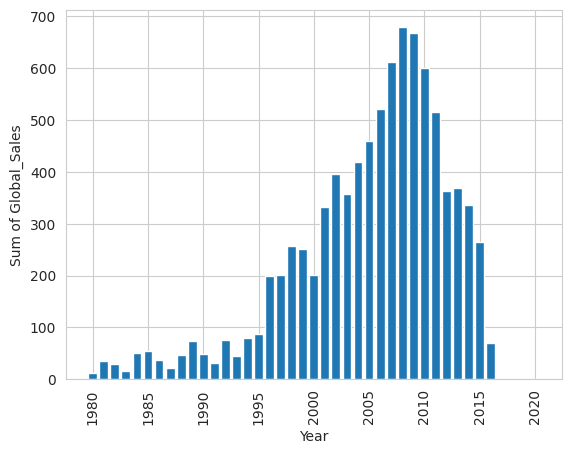

In [ ]:
#限制使用Matplotlib來畫出每年遊戲的銷售總量
plt.bar(dgy["Year"], dgy["Global_Sales"])
plt.xlabel("Year")
plt.ylabel("Sum of Global_Sales")
plt.xticks(rotation=90)
plt.show()

In [11]:
# 將上圖依照全年銷售額來排序
dgy_sort = dgy.sort_values(by="Global_Sales",ascending=False)
dgy_sort

Year  Global_Sales
28  2008.0        678.90
29  2009.0        667.30
27  2007.0        611.13
30  2010.0        600.45
26  2006.0        521.04
31  2011.0        515.99
25  2005.0        459.94
24  2004.0        419.31
22  2002.0        395.52
33  2013.0        368.11
32  2012.0        363.54
23  2003.0        357.85
34  2014.0        337.05
21  2001.0        331.47
35  2015.0        264.44
18  1998.0        256.47
19  1999.0        251.27
20  2000.0        201.56
17  1997.0        200.98
16  1996.0        199.15
15  1995.0         88.11
14  1994.0         79.17
12  1992.0         76.16
9   1989.0         73.45
36  2016.0         70.93
5   1985.0         53.94
4   1984.0         50.36
10  1990.0         49.39
8   1988.0         47.22
13  1993.0         45.98
6   1986.0         37.07
1   1981.0         35.77
11  1991.0         32.23
2   1982.0         28.86
7   1987.0         21.74
3   1983.0         16.79
0   1980.0         11.38
38  2020.0          0.29
37  2017.0          0.05

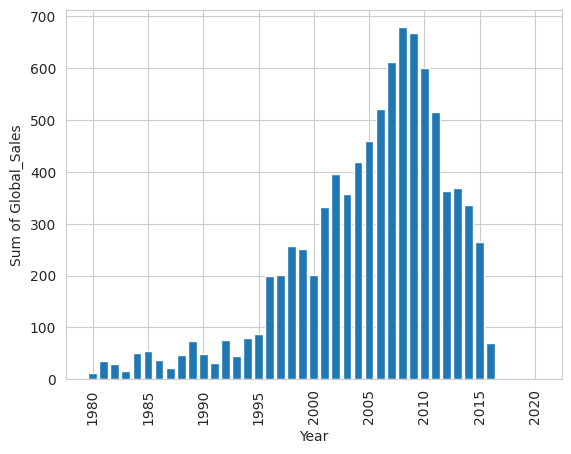

In [12]:
plt.bar(dgy_sort["Year"], dgy_sort["Global_Sales"])
plt.xlabel("Year")
plt.ylabel("Sum of Global_Sales")
plt.xticks(rotation=90)
plt.show()

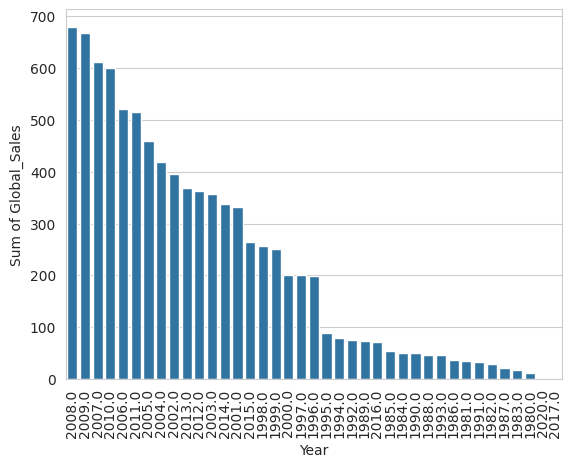

In [ ]:
sns.barplot(x="Year", y="Global_Sales", data=dgy
           ,order=dgy_sort['Year'])
plt.xlabel("Year")
plt.ylabel("Sum of Global_Sales")
plt.xticks(rotation=90)
plt.show()

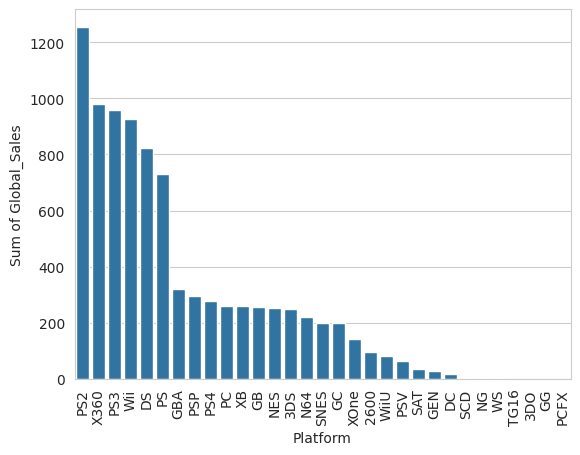

In [18]:
#練習題
#請畫出各平台的銷售總額
Platform_Sales = data.groupby("Platform")["Global_Sales"].sum().reset_index()
Platform_Sales_sort = Platform_Sales.sort_values(by="Global_Sales",ascending=False)
sns.barplot(x="Platform", y="Global_Sales", data=Platform_Sales
           ,order=Platform_Sales_sort["Platform"])
plt.xlabel("Platform")
plt.ylabel("Sum of Global_Sales")
plt.xticks(rotation=90)
plt.show()

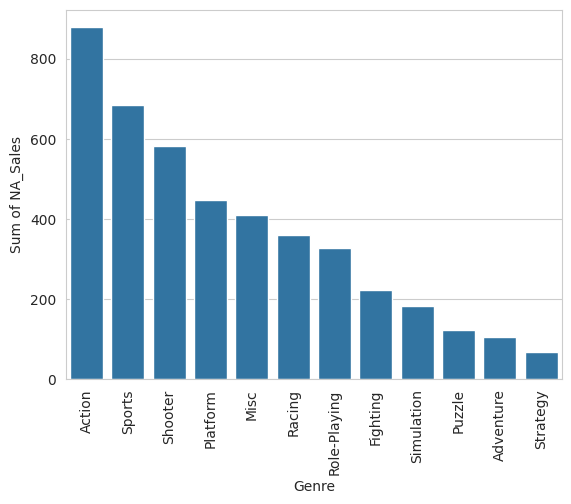

In [21]:
#練習題
#請畫出各遊戲種類的北美銷售總額
Genre_NA_Sales = data.groupby("Genre")["NA_Sales"].sum().reset_index()
Genre_NA_Sales_sort = Genre_NA_Sales.sort_values(by="NA_Sales",ascending=False)
sns.barplot(x="Genre", y="NA_Sales", data=Genre_NA_Sales
           ,order=Genre_NA_Sales_sort["Genre"])
plt.xlabel("Genre")
plt.ylabel("Sum of NA_Sales")
plt.xticks(rotation=90)
plt.show()

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




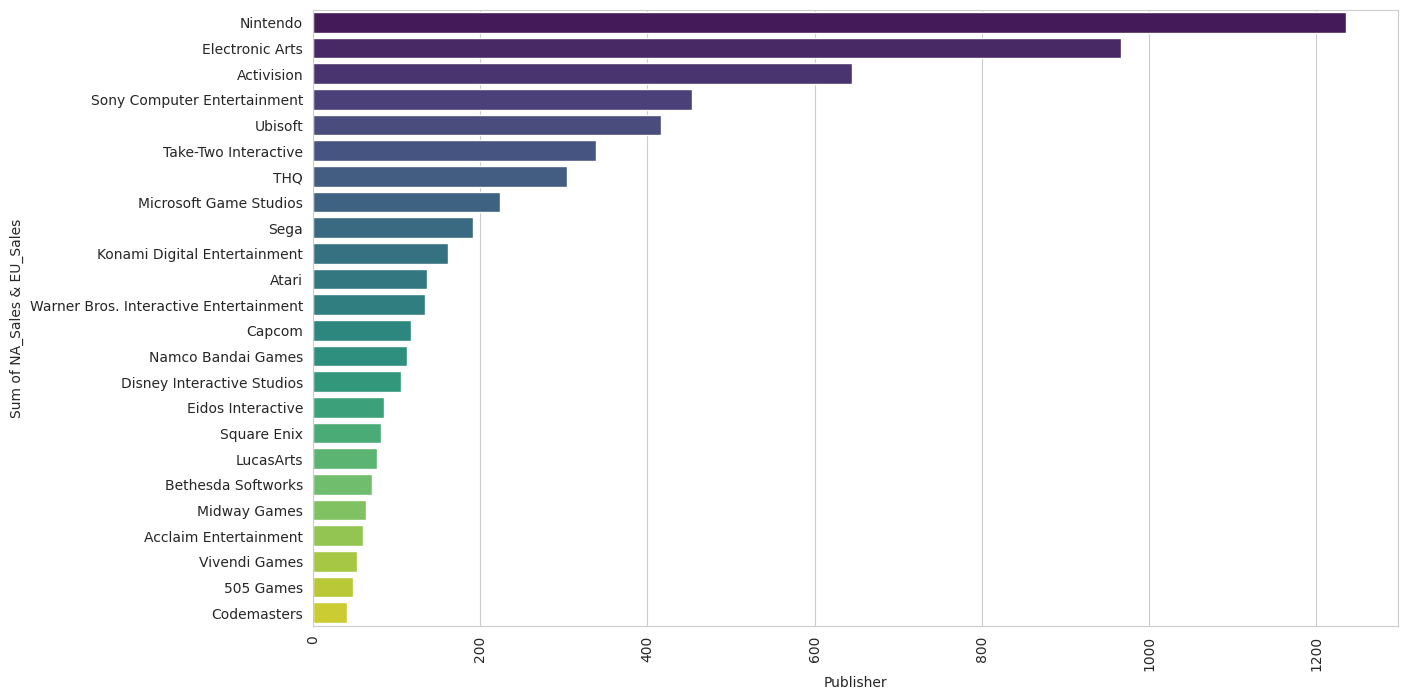

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




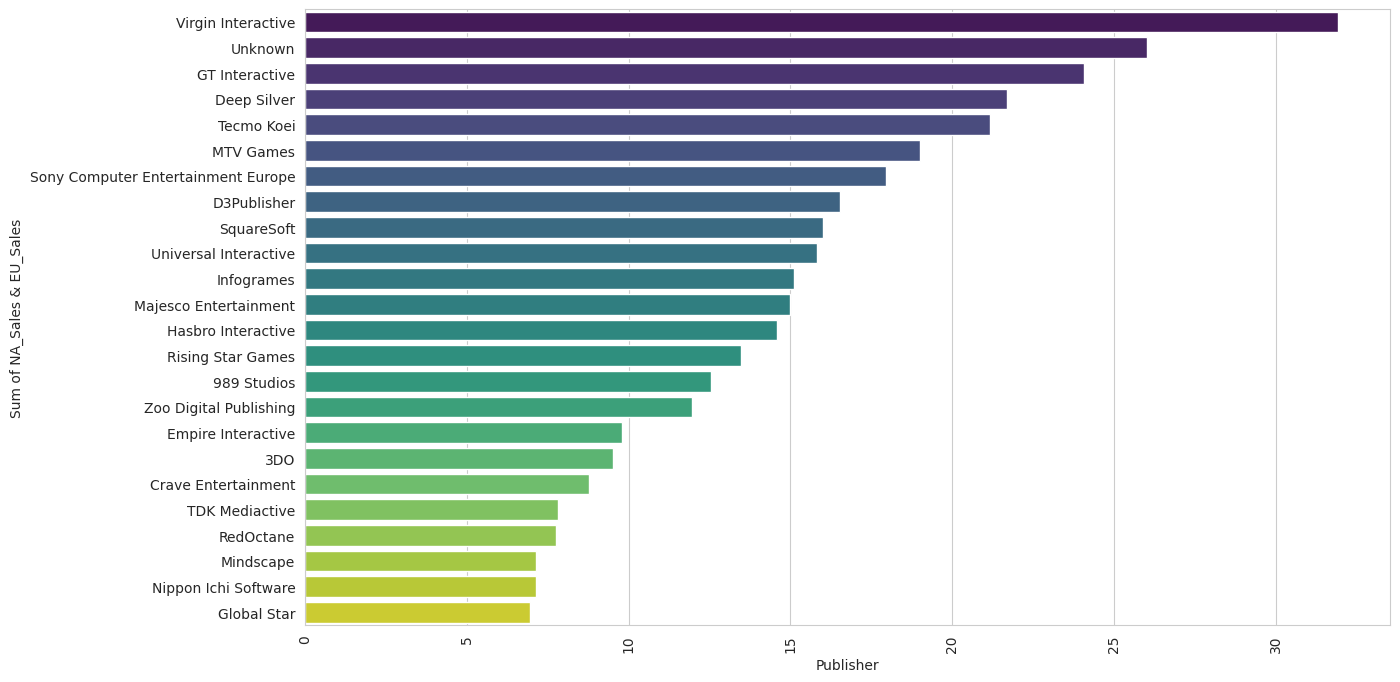

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




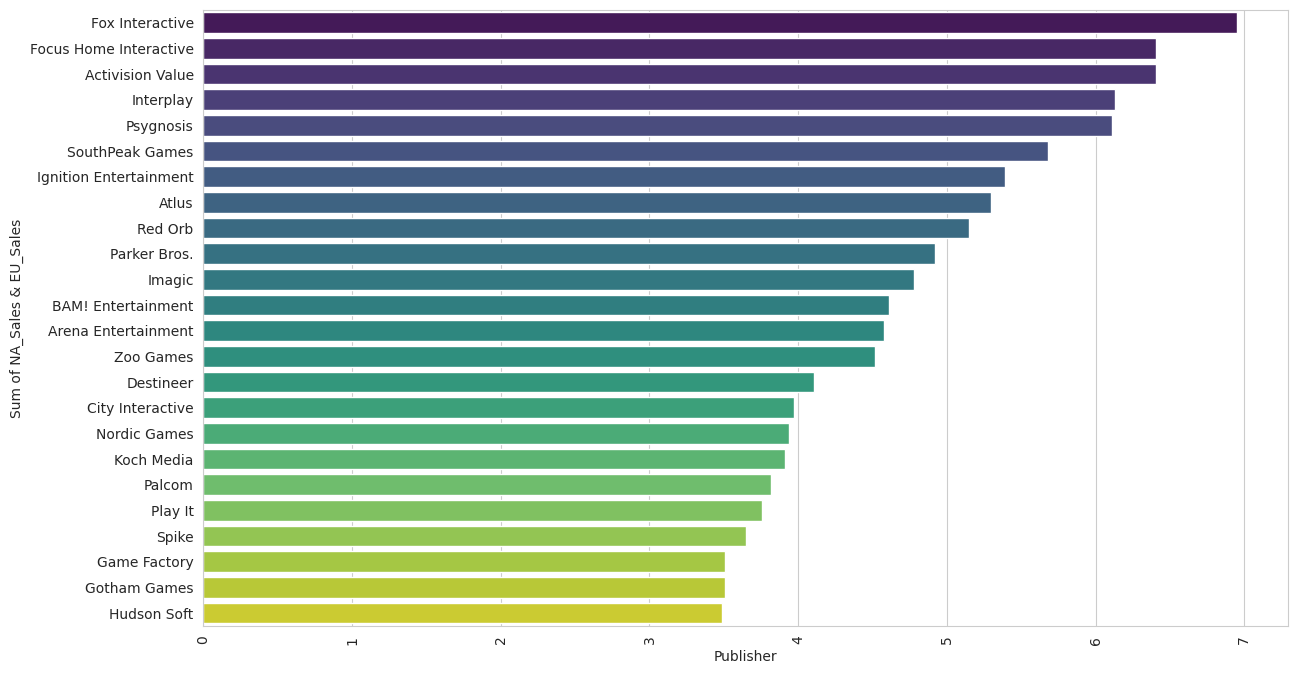

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




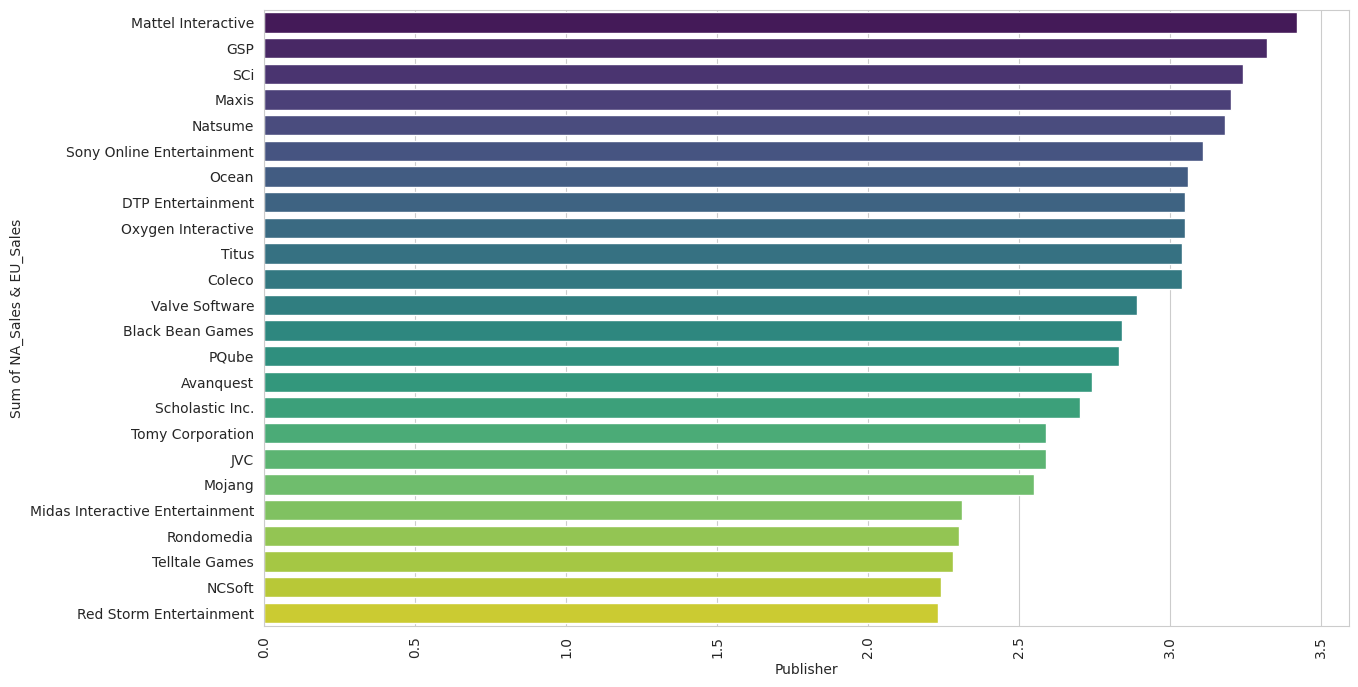

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




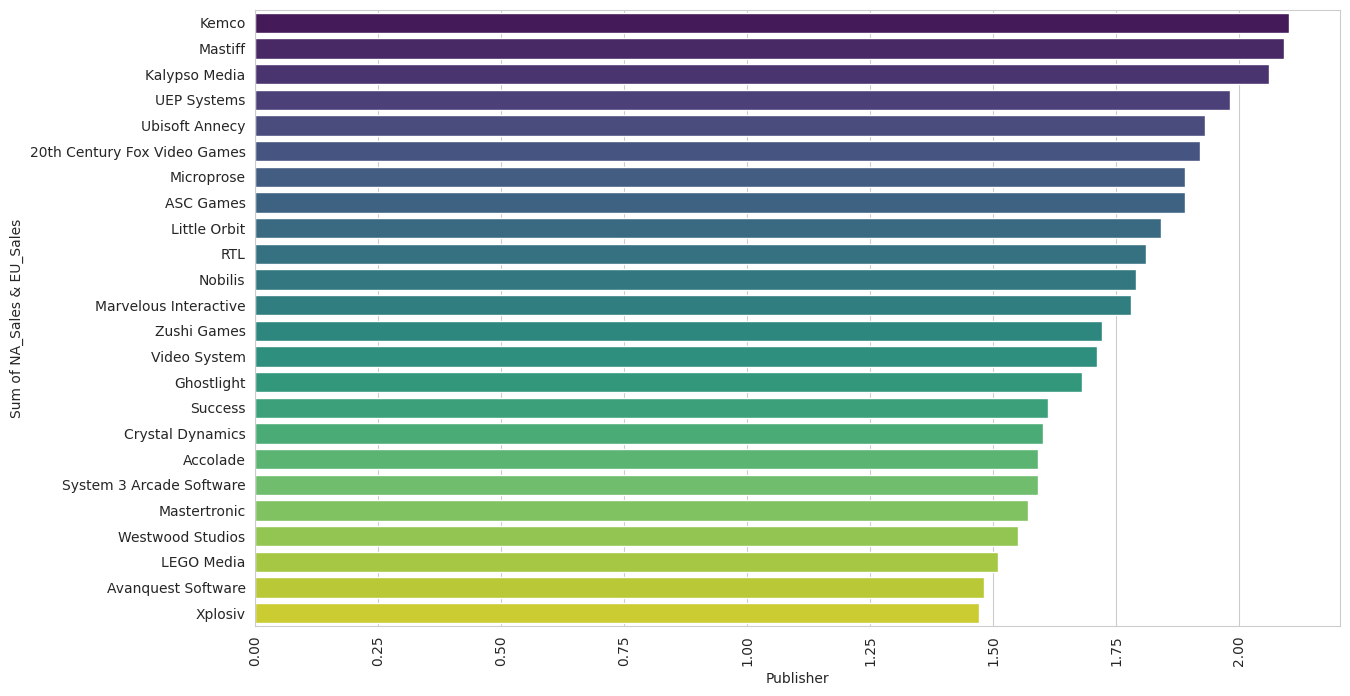

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




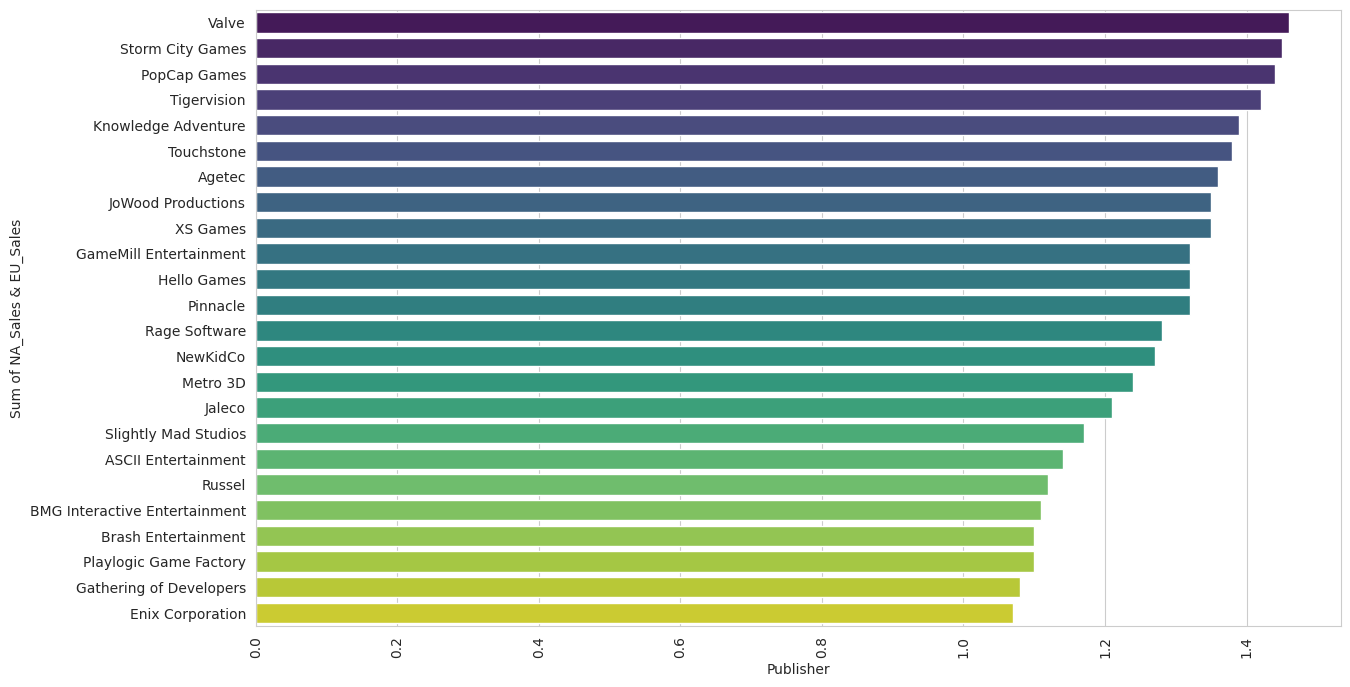

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




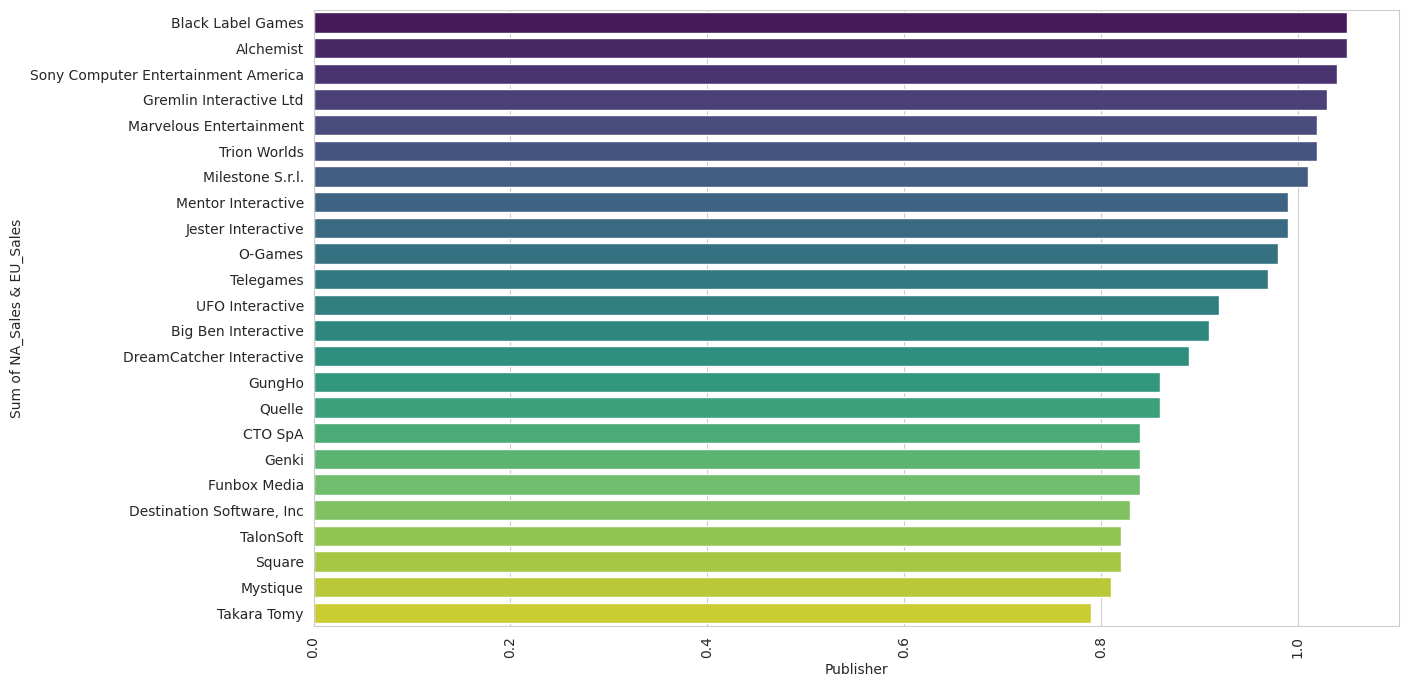

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




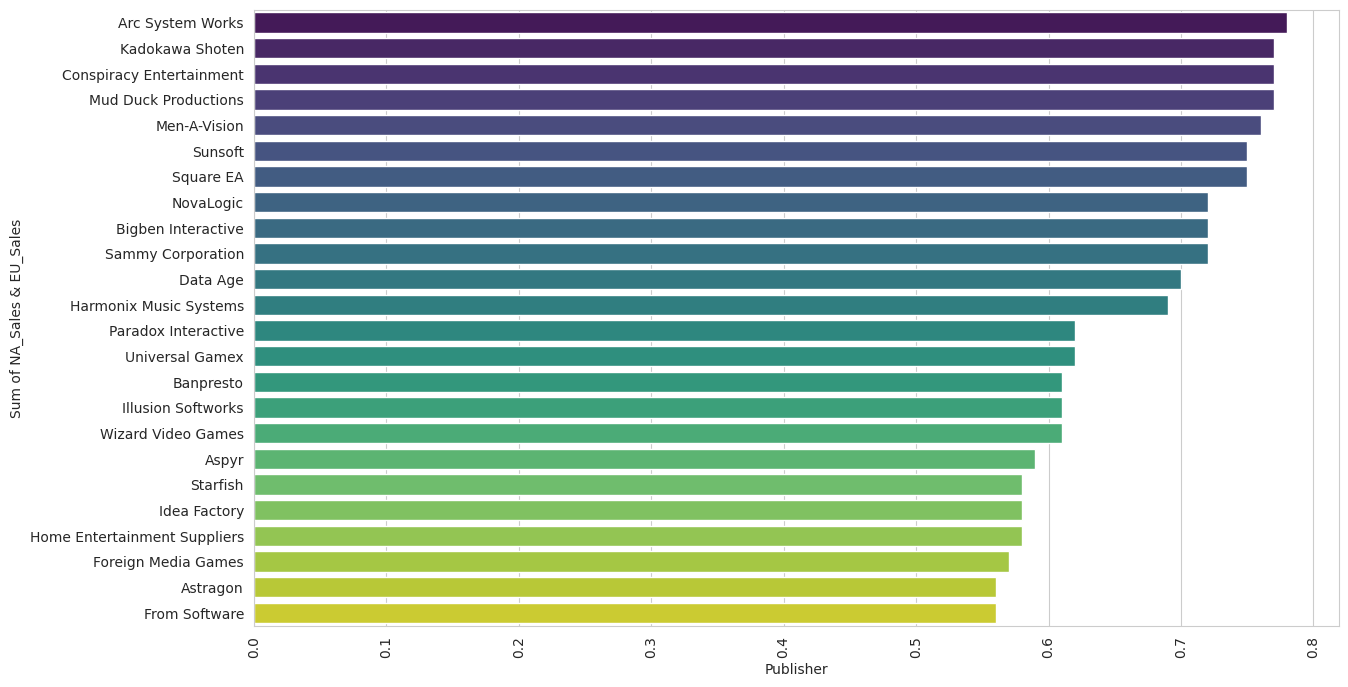

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




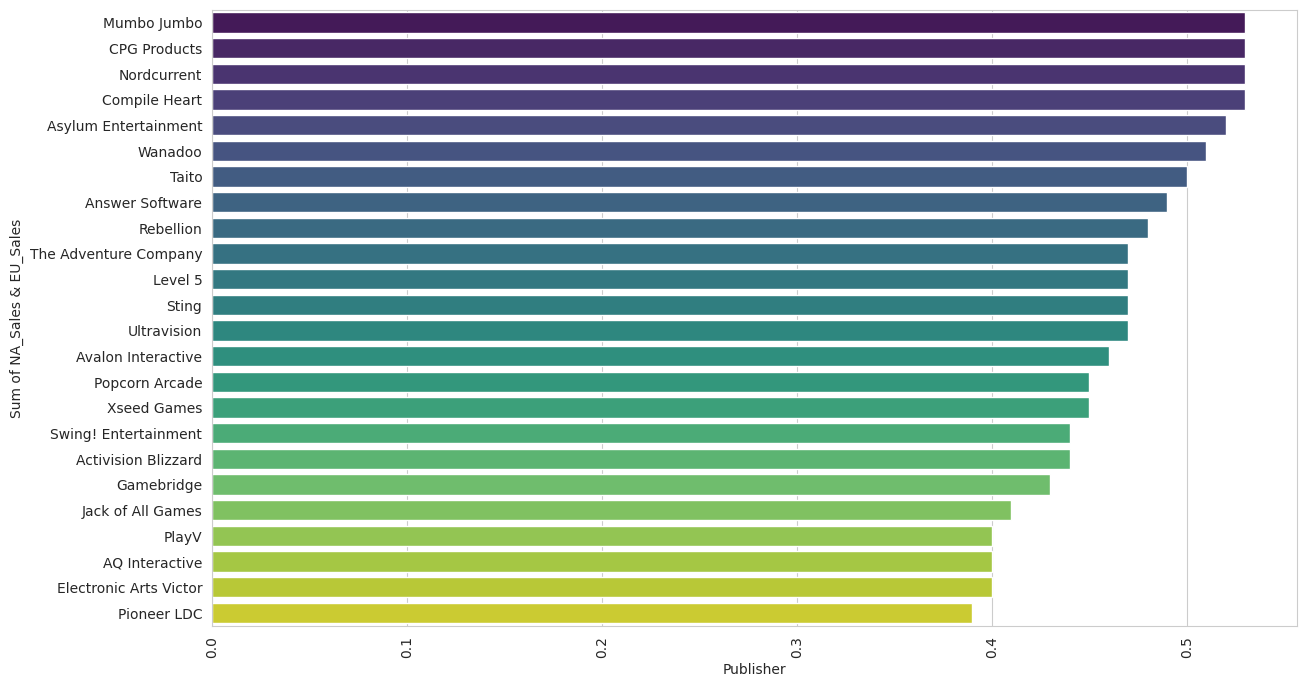

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




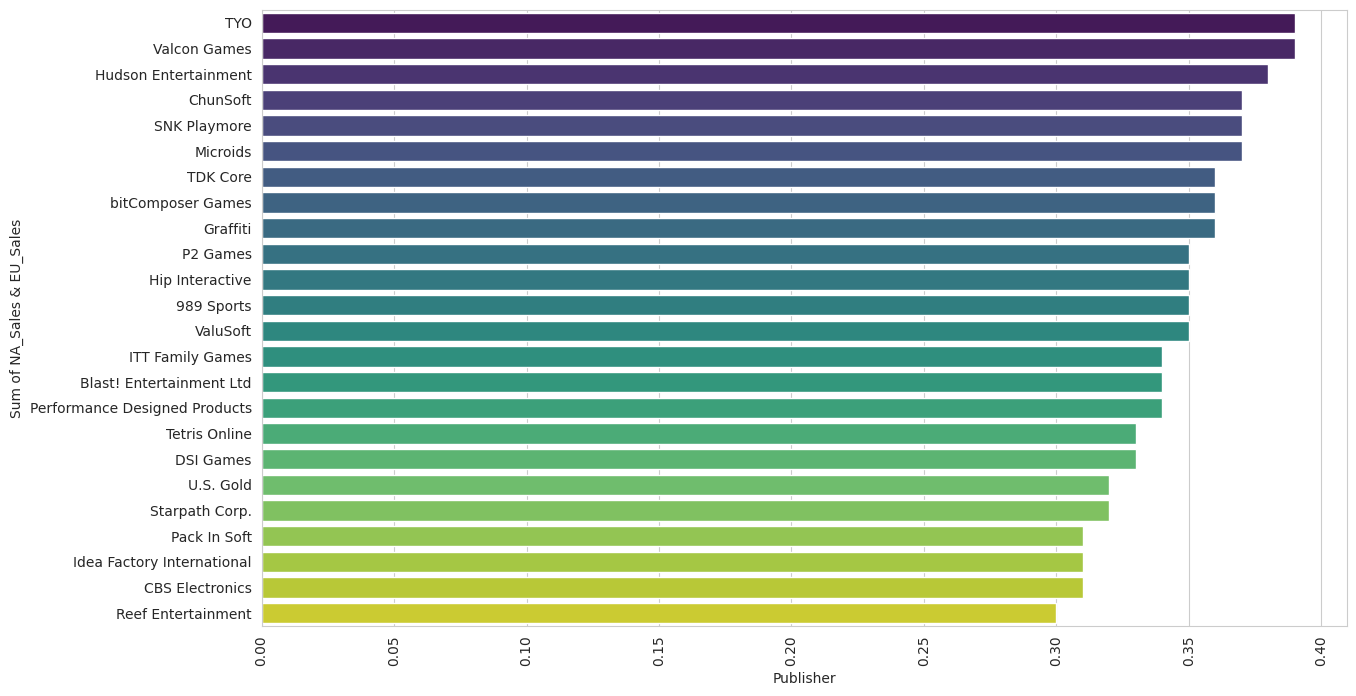

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




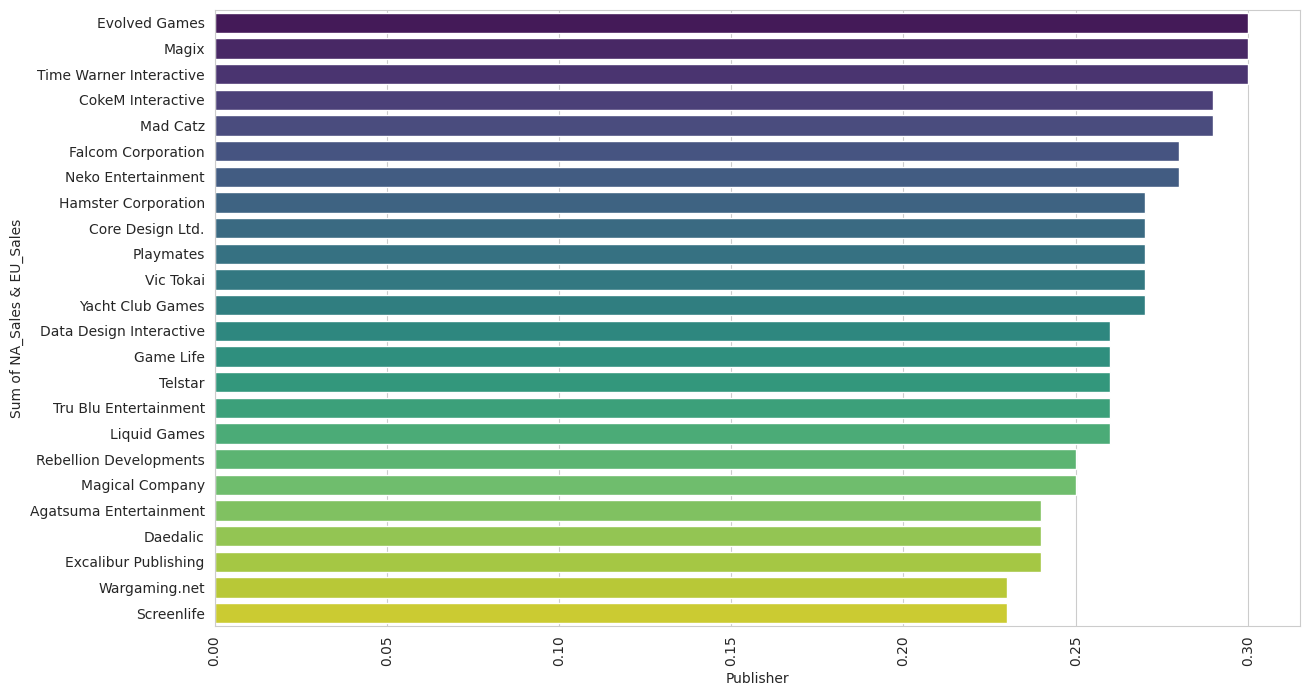

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




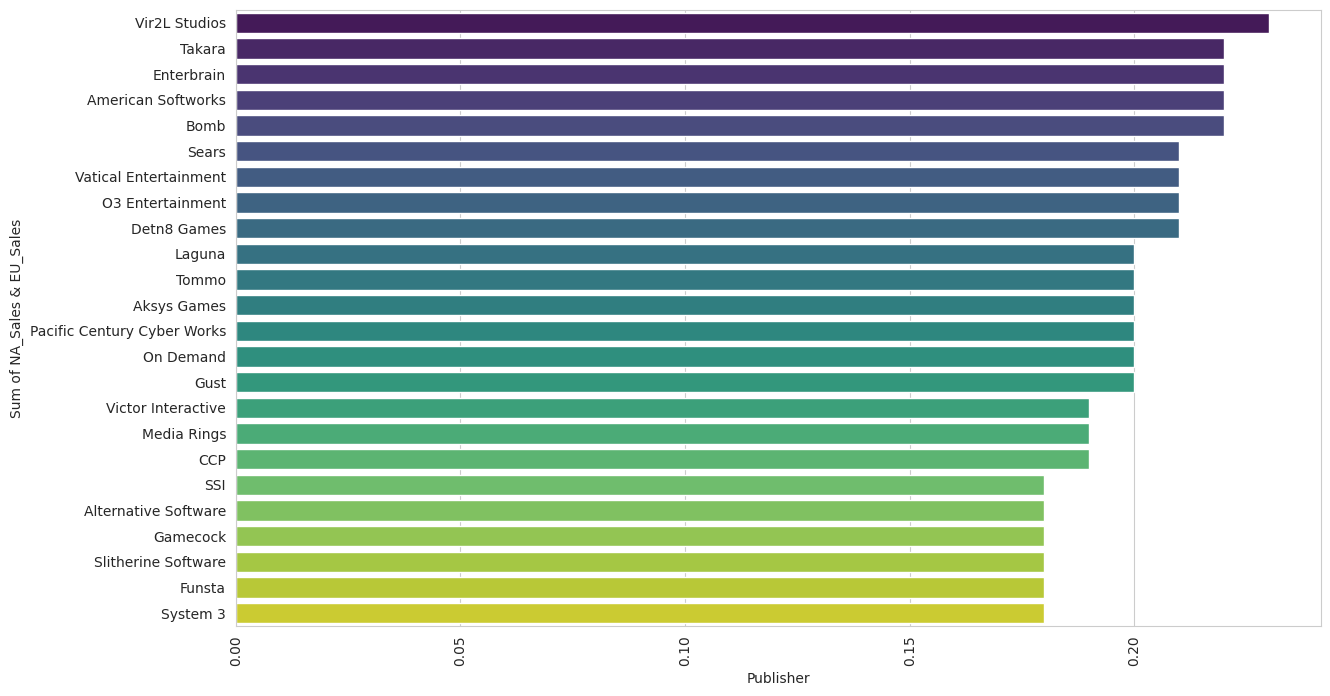

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




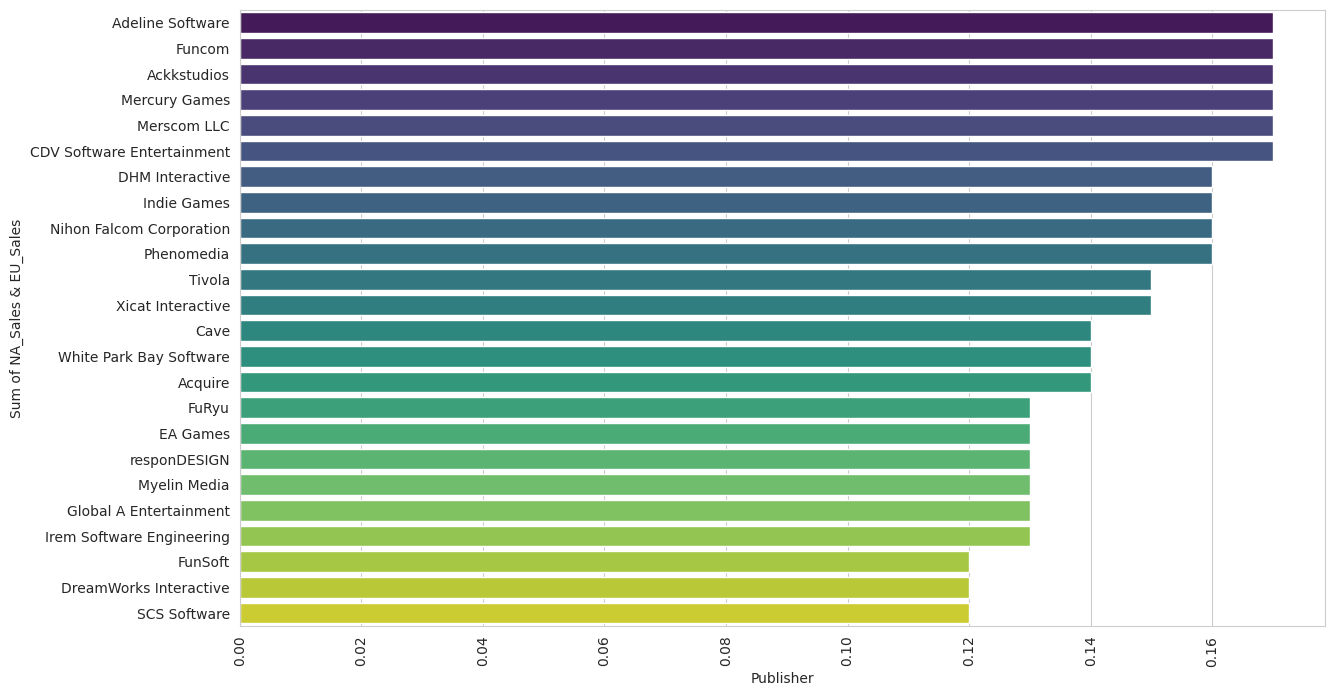

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




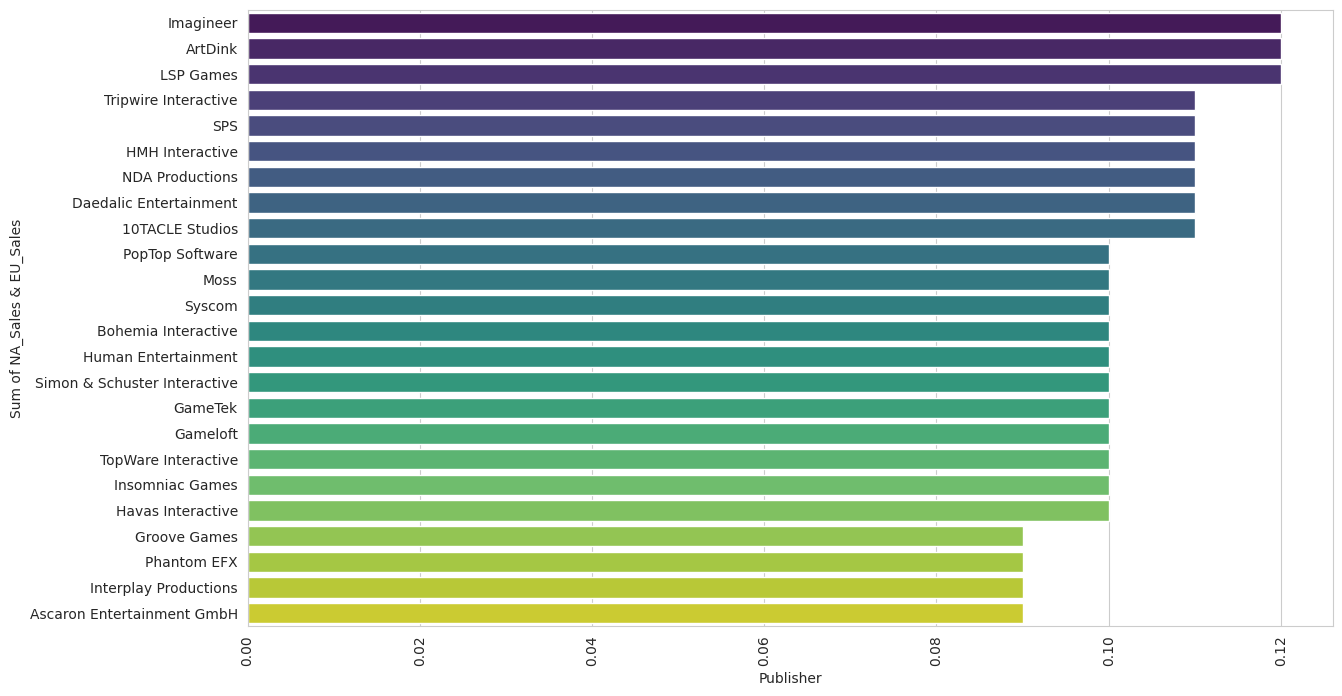

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




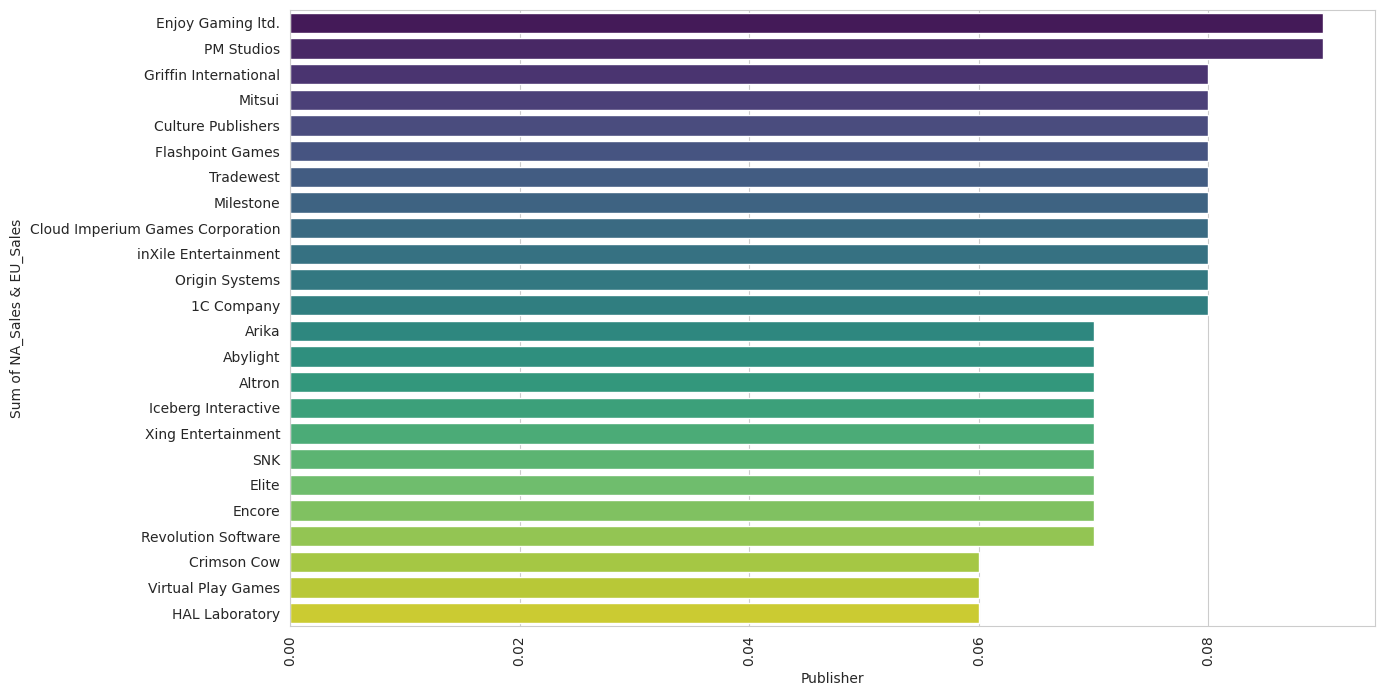

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




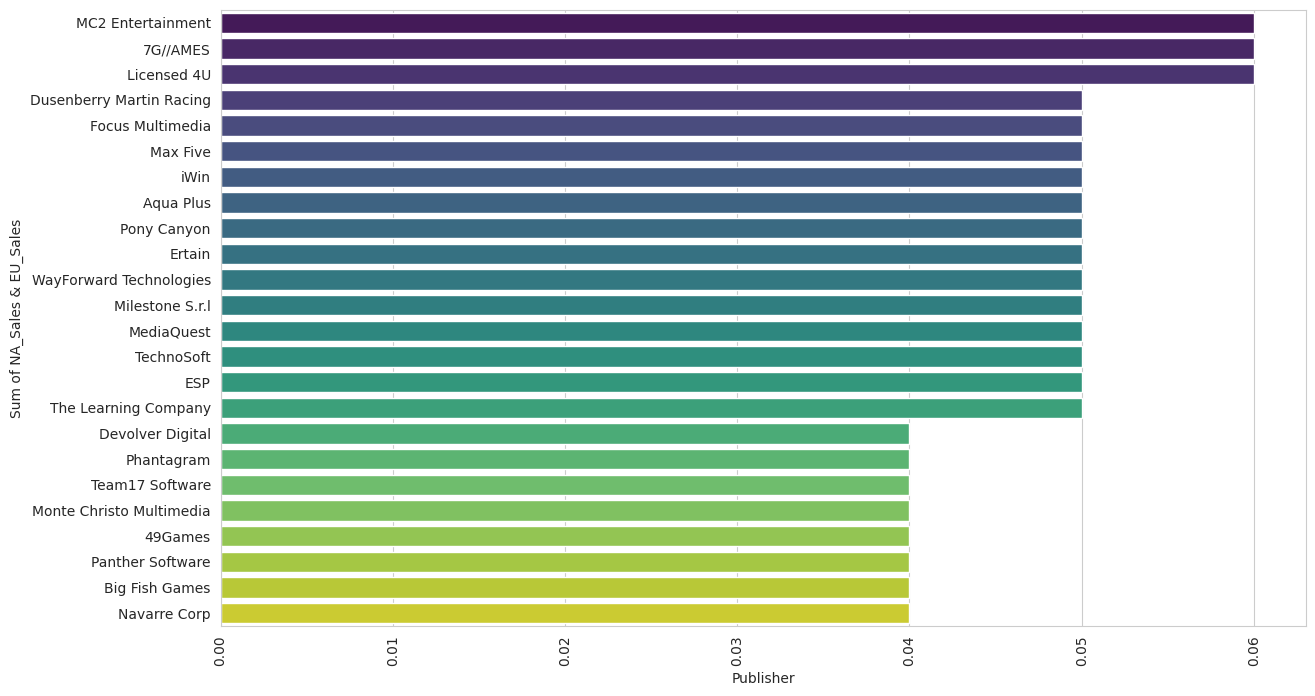

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




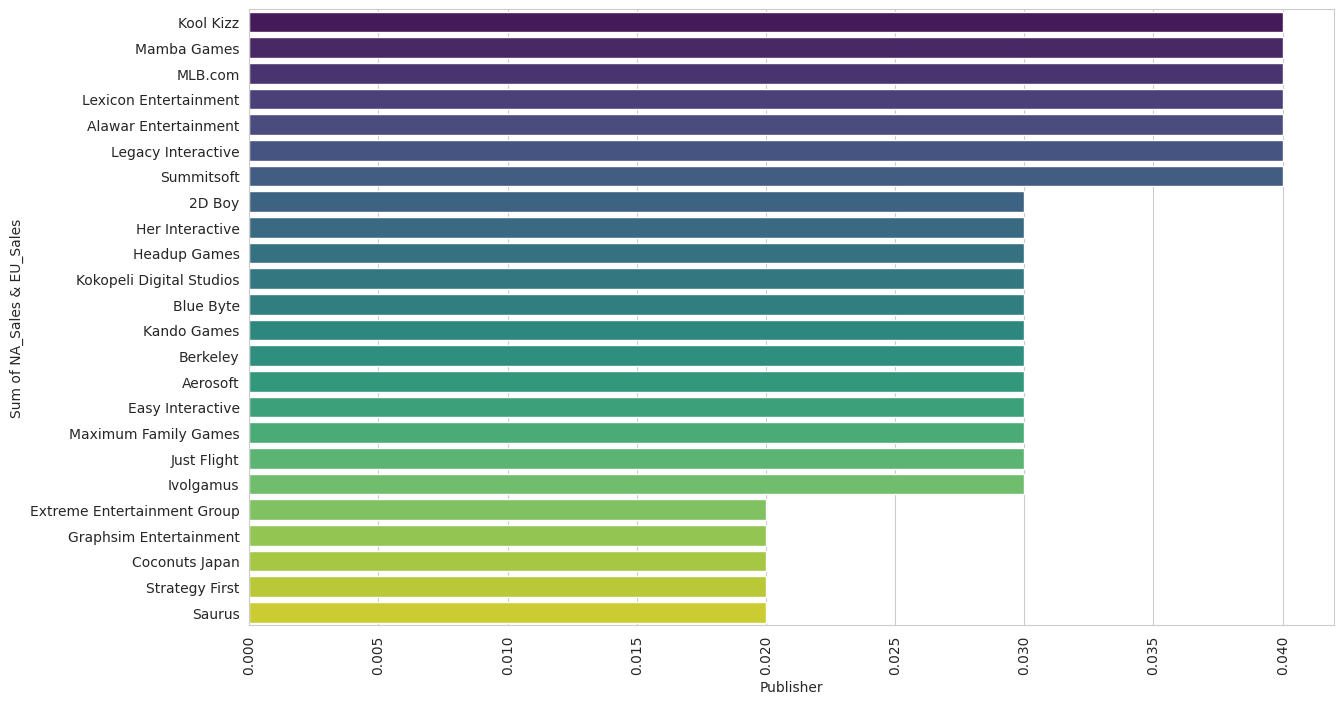

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




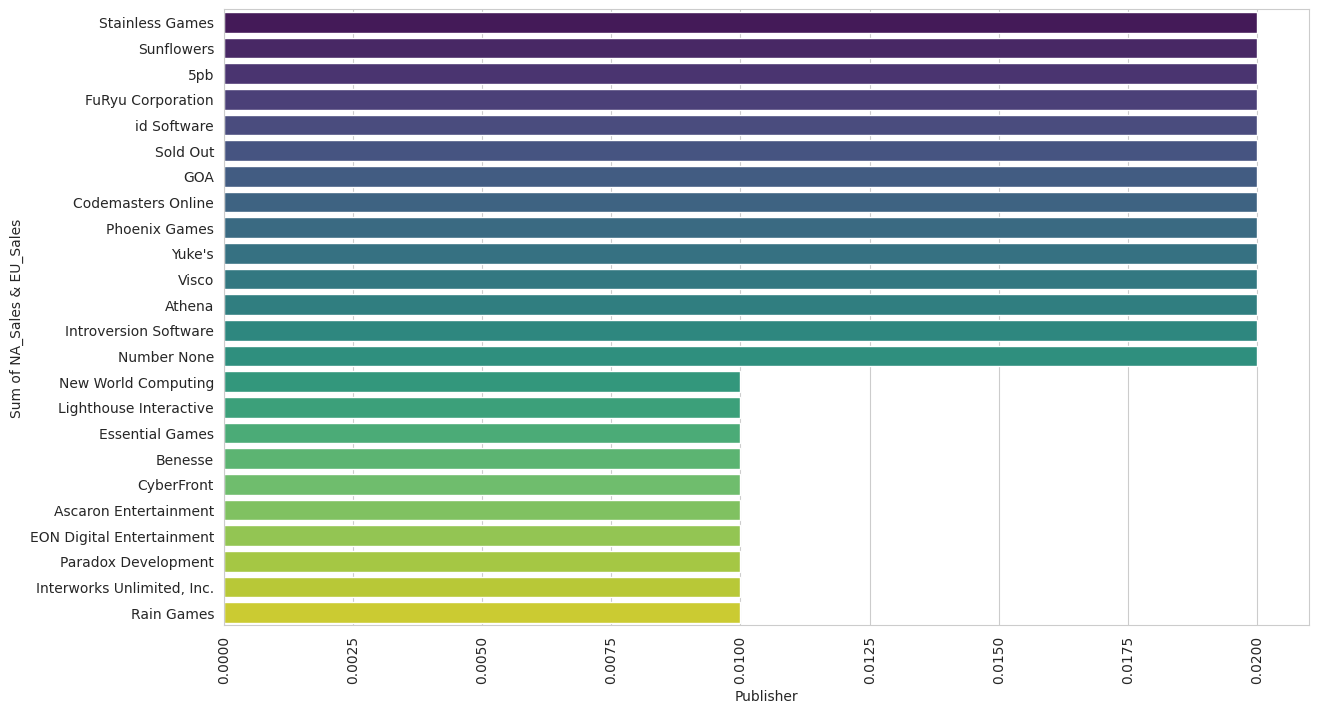

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




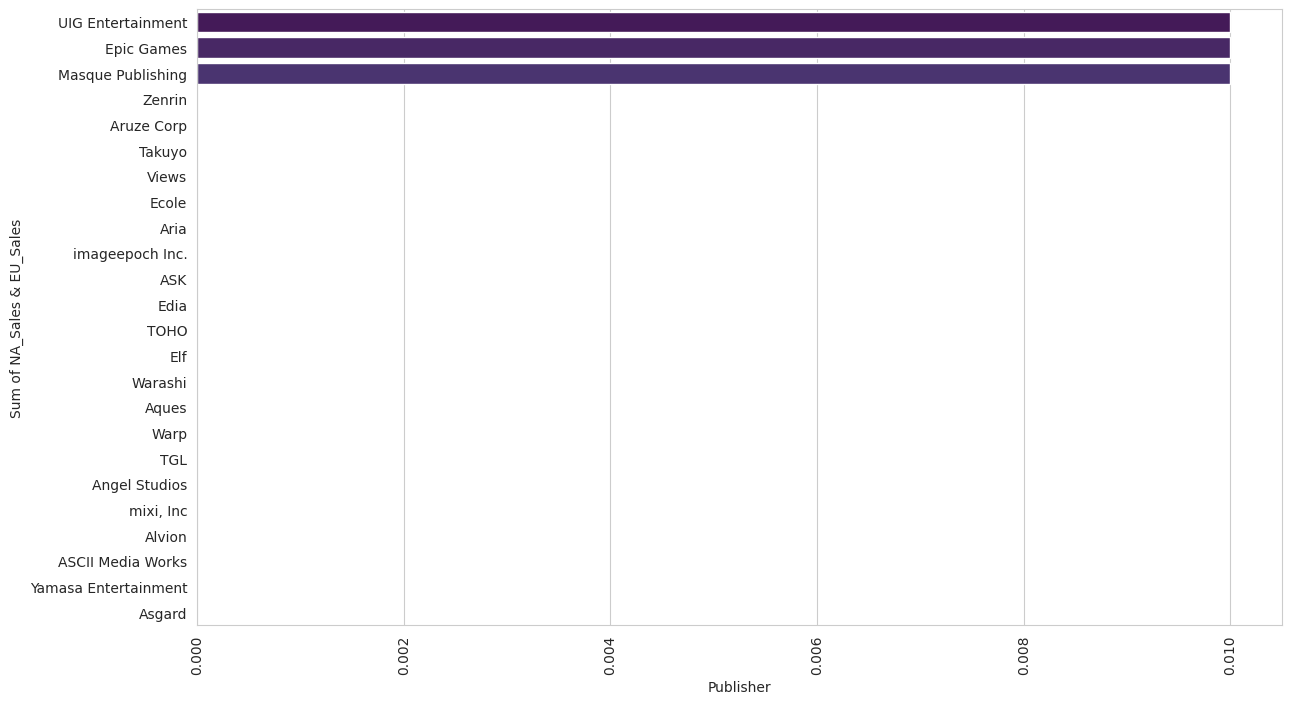

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




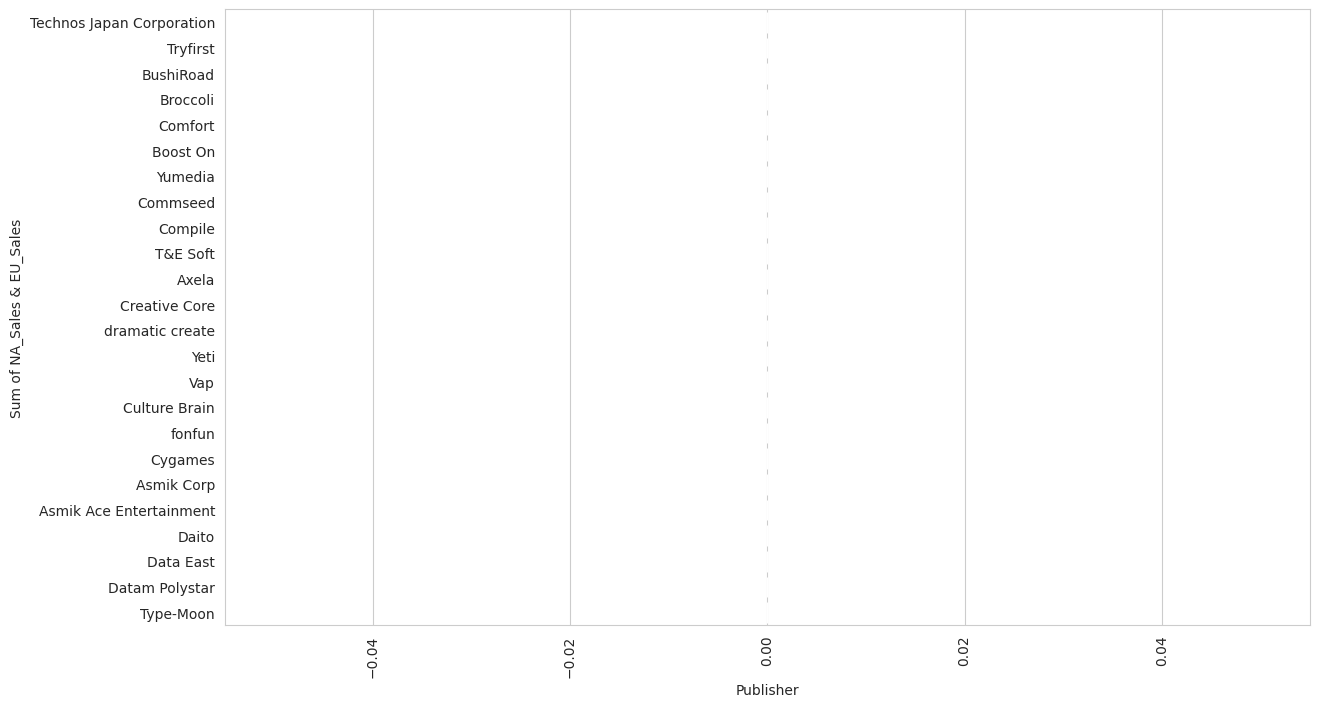

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




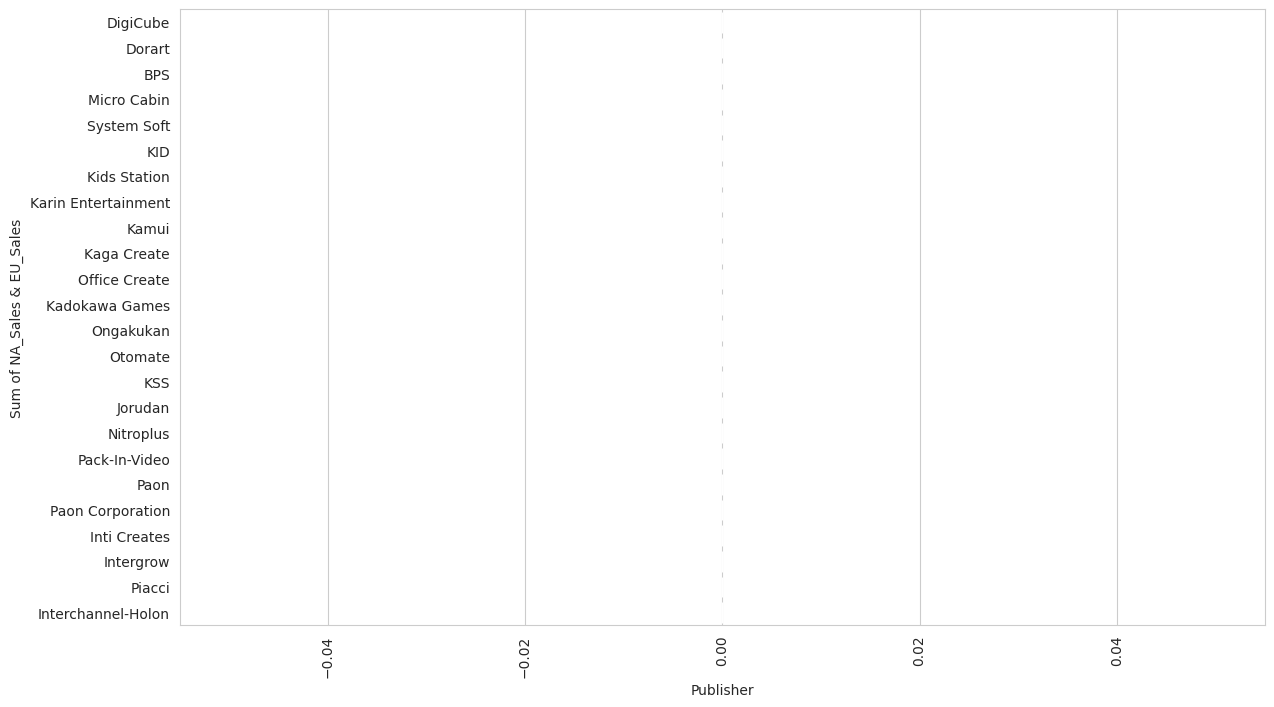

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




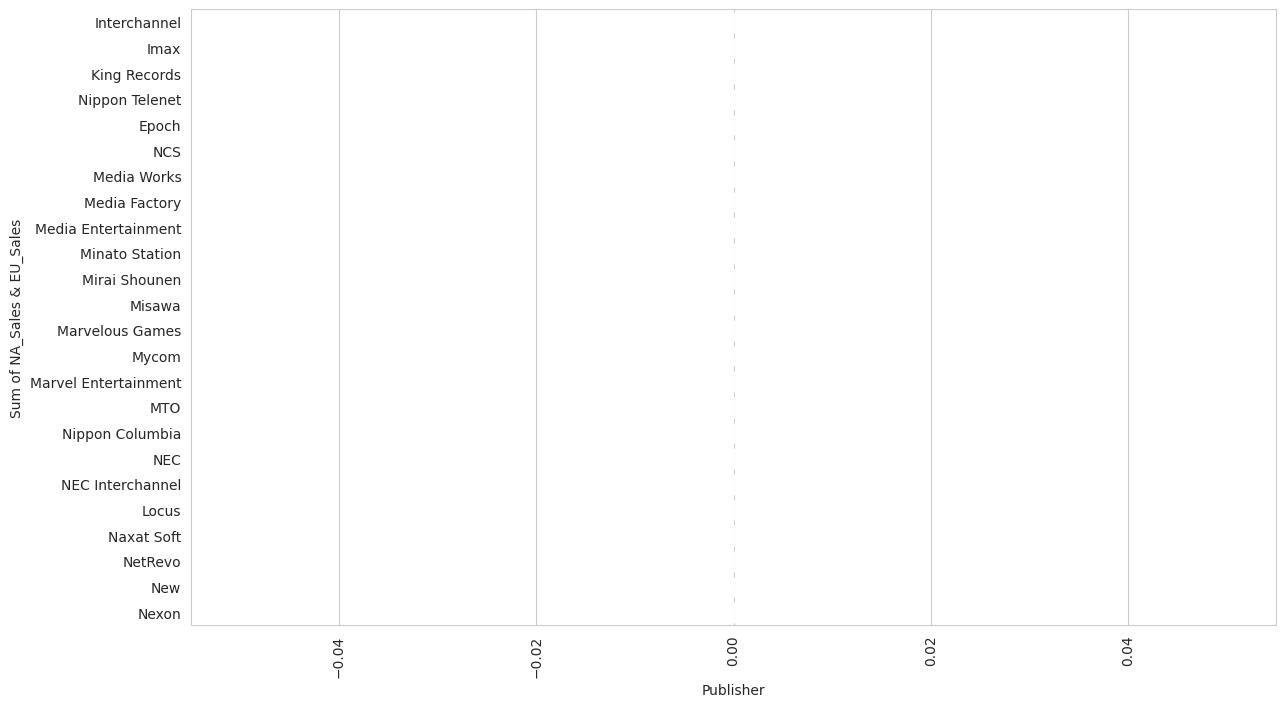

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




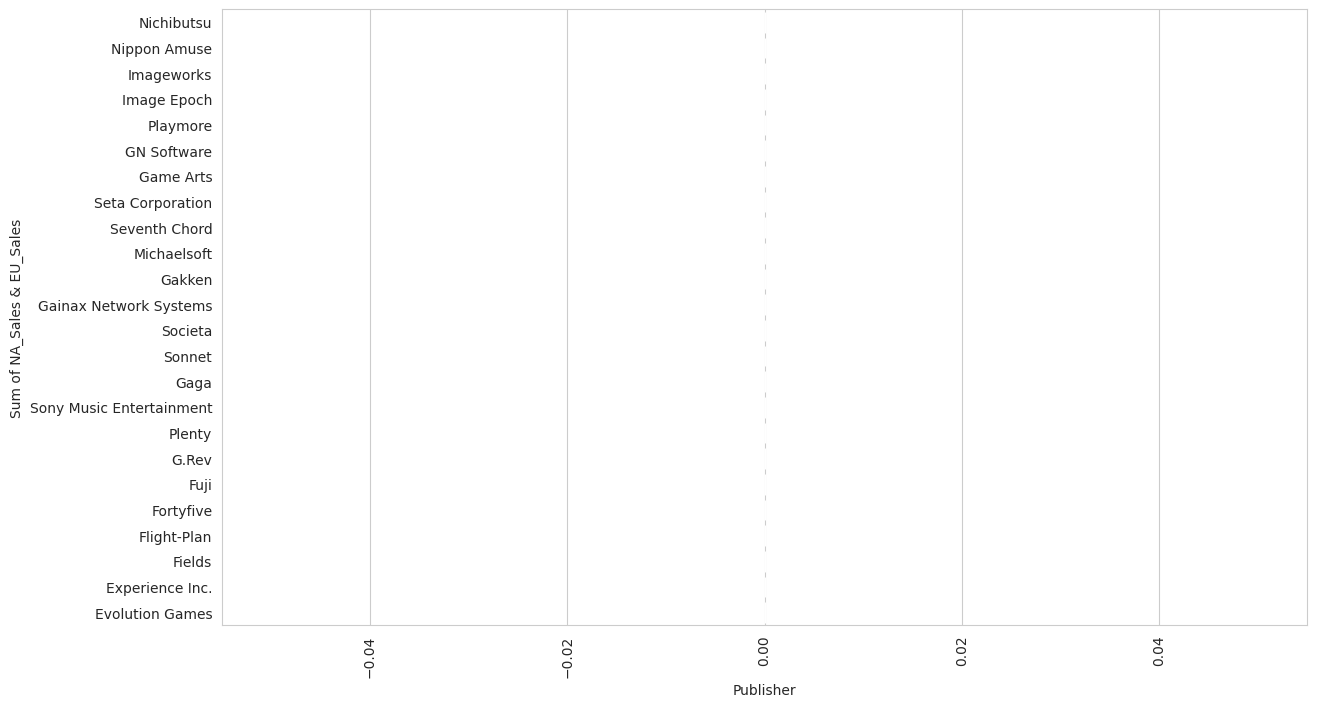

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




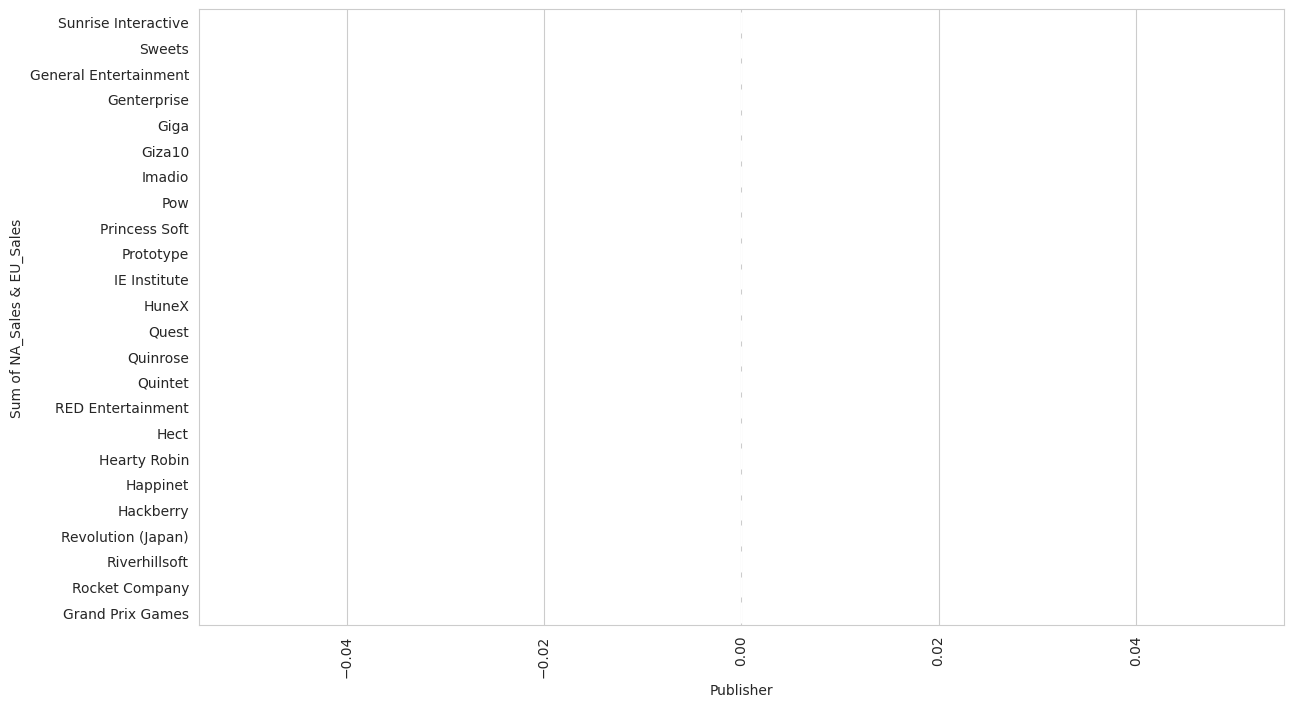

<ipython-input-65-3eae45aaf682>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




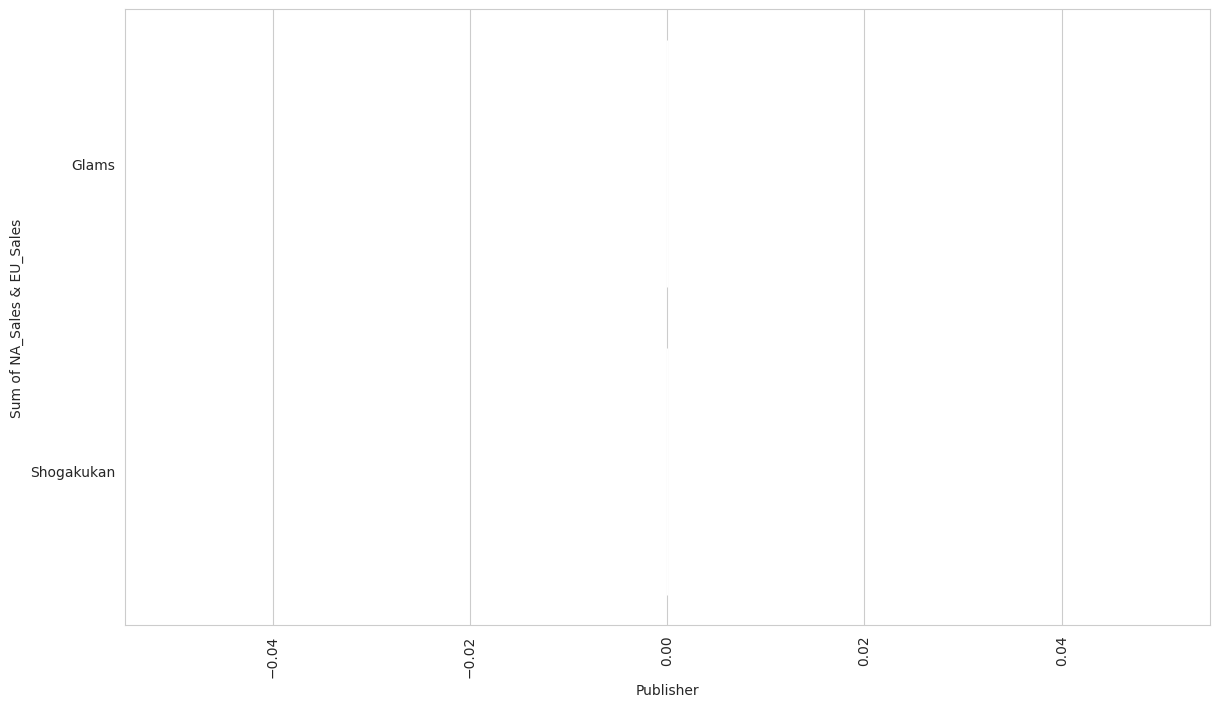

In [65]:
#練習題
#請畫出各遊戲發行商的北美加歐洲銷售總額

import math
Publisher_Sales = data.groupby("Publisher")[["NA_Sales","EU_Sales"]].sum().reset_index()
Publisher_Sales["Total_Sales"] = Publisher_Sales["NA_Sales"] + Publisher_Sales["EU_Sales"]

Publisher_Total_Sales_sort = Publisher_Sales.sort_values(by="Total_Sales",ascending=False)
num_Publishers_per_plot = math.ceil(len(Publisher_Total_Sales_sort) / 25)

for i in range(25):
    start_idx = i * num_Publishers_per_plot
    end_idx = start_idx + num_Publishers_per_plot
    subset = Publisher_Total_Sales_sort.iloc[start_idx:end_idx]

    plt.figure(figsize=(14, 8))
    sns.barplot(x="Total_Sales", y="Publisher", data=subset, palette='viridis')
    plt.xlabel("Publisher")
    plt.ylabel("Sum of NA_Sales & EU_Sales")
    plt.xticks(rotation=90)
    plt.show()

<ipython-input-68-5664f8d8e7c3>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




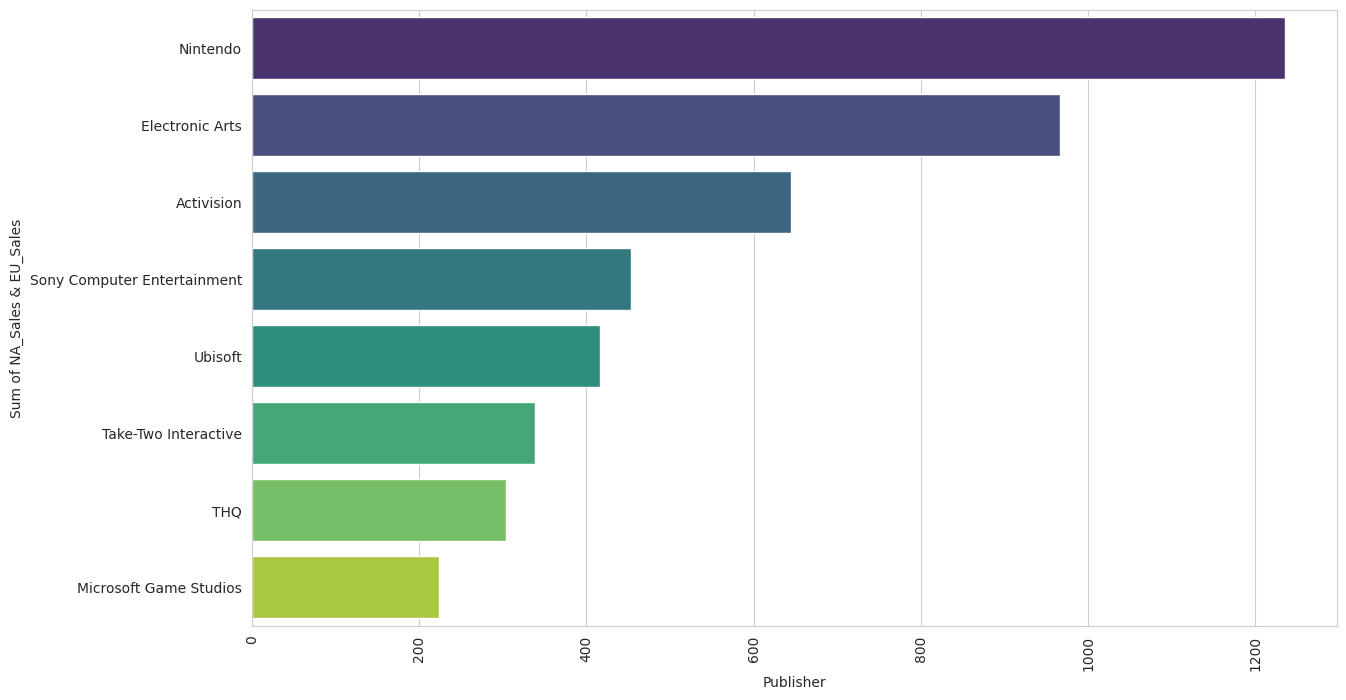

<ipython-input-68-5664f8d8e7c3>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




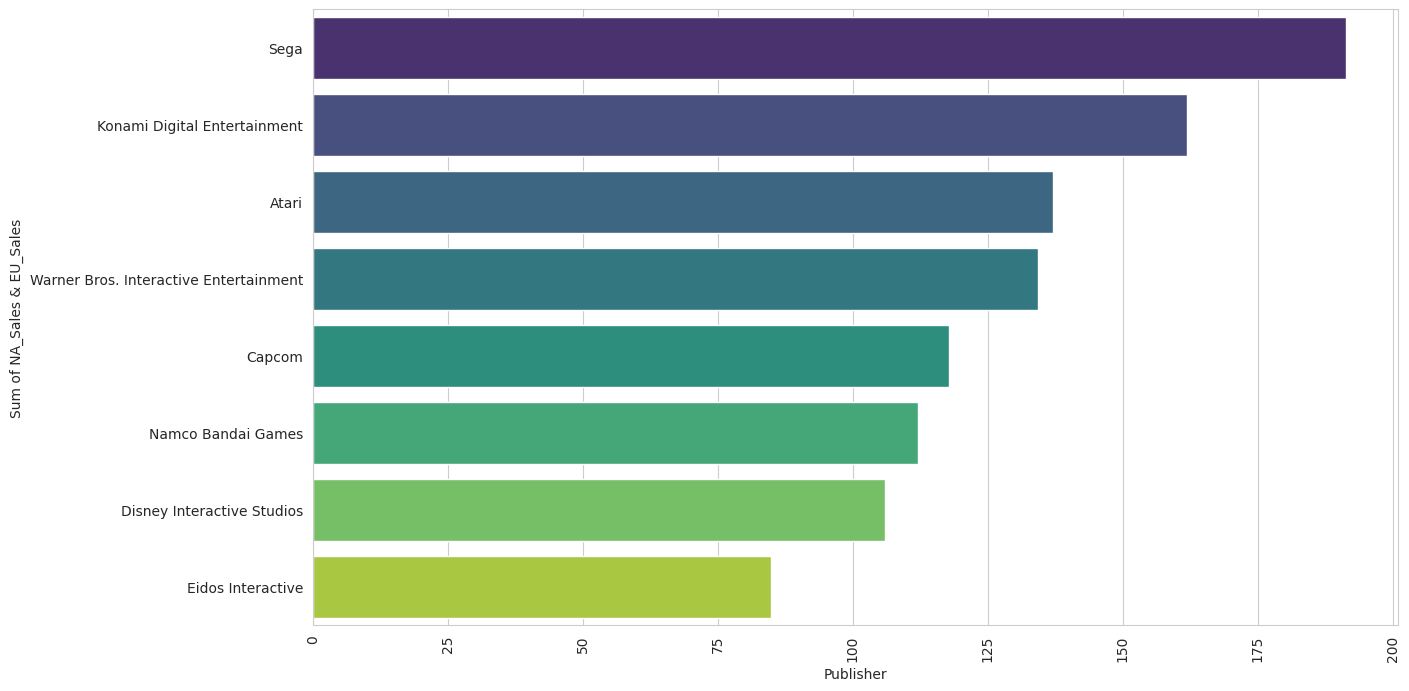

<ipython-input-68-5664f8d8e7c3>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




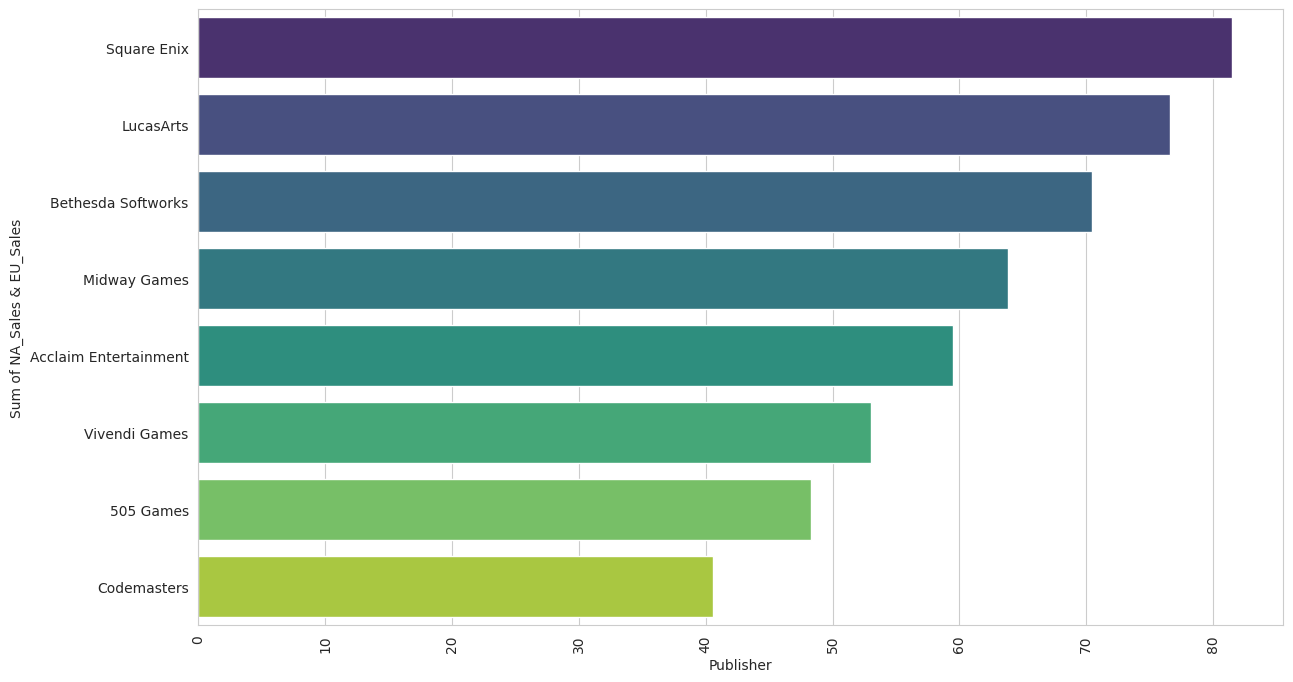

<ipython-input-68-5664f8d8e7c3>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




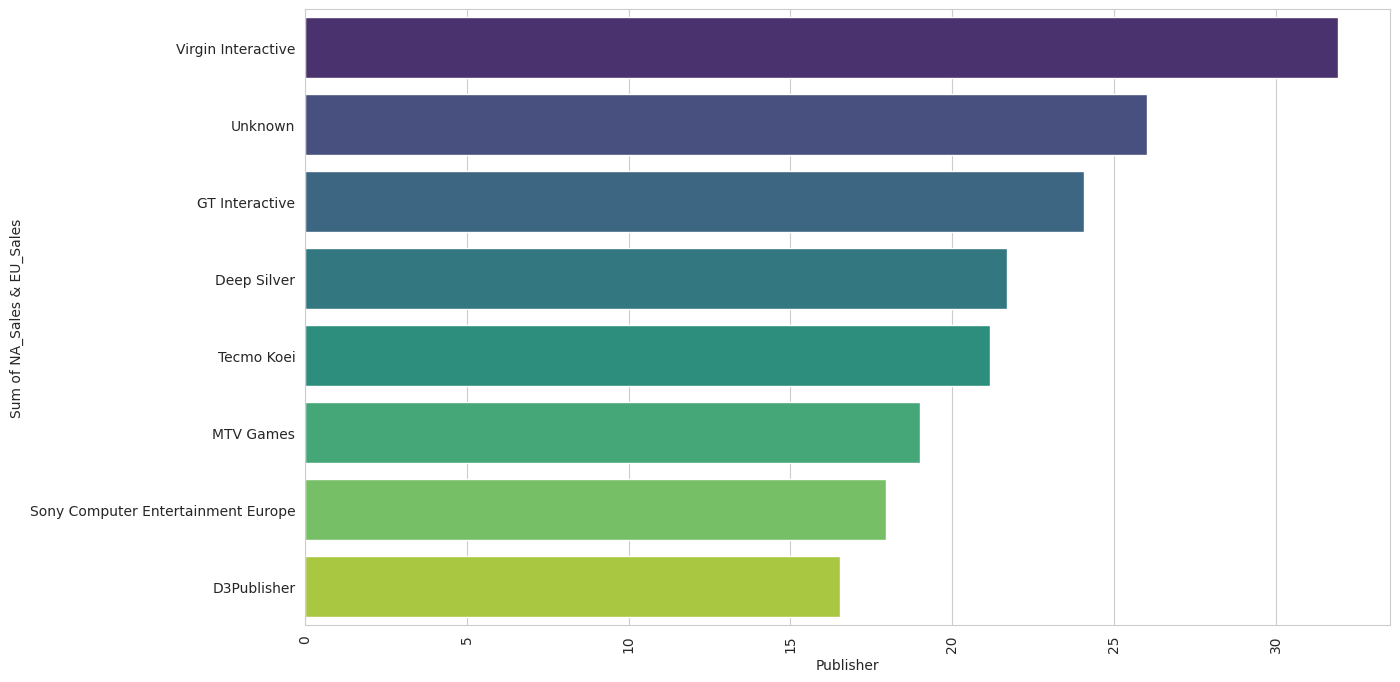

<ipython-input-68-5664f8d8e7c3>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




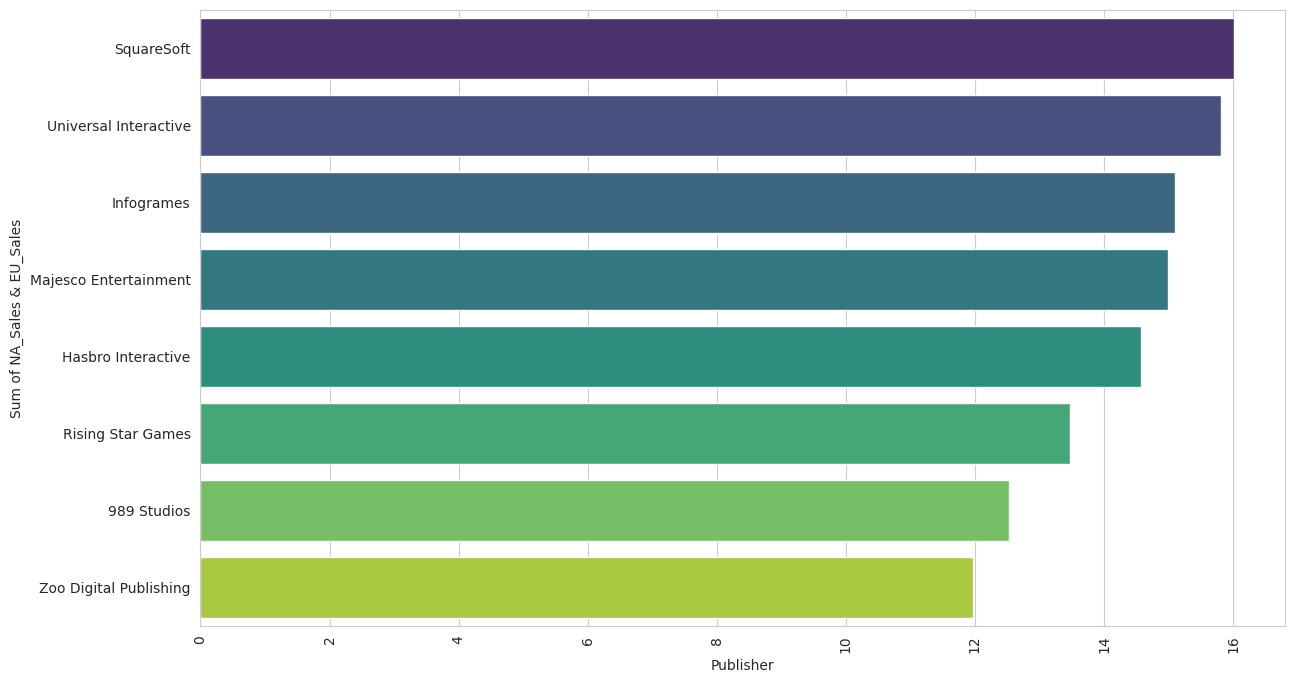

In [68]:
import math
Publisher_Sales = data.groupby("Publisher")[["NA_Sales","EU_Sales"]].sum().reset_index()
Publisher_Sales["Total_Sales"] = Publisher_Sales["NA_Sales"] + Publisher_Sales["EU_Sales"]

# 設置閾值過濾數據，只保留總銷售額大於一定值的發行商
threshold = 10  # 可根據需要調整閾值，這裡設置為1百萬
Publisher_Sales_filtered = Publisher_Sales[Publisher_Sales["Total_Sales"] > threshold]

# 將發行商按總銷售額排序
Publisher_Sales_filtered = Publisher_Sales_filtered.sort_values(by="Total_Sales", ascending=False)
num_Publishers_per_plot = math.ceil(len(Publisher_Sales_filtered) / 5)

for i in range(5):
    start_idx = i * num_Publishers_per_plot
    end_idx = start_idx + num_Publishers_per_plot
    subset = Publisher_Sales_filtered.iloc[start_idx:end_idx]

    plt.figure(figsize=(14, 8))
    sns.barplot(x="Total_Sales", y="Publisher", data=subset, palette='viridis')
    plt.xlabel("Publisher")
    plt.ylabel("Sum of NA_Sales & EU_Sales")
    plt.xticks(rotation=90)
    plt.show()

In [54]:
import plotly.express as px
import pandas as pd

# 根據發行商進行分組，計算北美和歐洲的總銷售額
Publisher_Sales = data.groupby("Publisher")[["NA_Sales","EU_Sales"]].sum().reset_index()
Publisher_Sales["Total_Sales"] = Publisher_Sales["NA_Sales"] + Publisher_Sales["EU_Sales"]

# 繪製長條圖
fig = px.bar(Publisher_Sales.sort_values(by="Total_Sales", ascending=False),
             x='Total_Sales', y='Publisher',
             title='Total Sales in North America and Europe per Publisher',
             labels={'Total_Sales':'Total Sales (in millions)', 'Publisher':'Publisher'},
             orientation='h')

# 顯示圖表
fig.show()


In [57]:
import plotly.express as px
import pandas as pd

# 根據發行商進行分組，計算北美和歐洲的總銷售額
Publisher_Sales = data.groupby("Publisher")[["NA_Sales","EU_Sales"]].sum().reset_index()
Publisher_Sales["Total_Sales"] = Publisher_Sales["NA_Sales"] + Publisher_Sales["EU_Sales"]

# 設置閾值過濾數據，只保留總銷售額大於一定值的發行商
threshold = 1  # 可根據需要調整閾值，這裡設置為1百萬
Publisher_Sales_filtered = Publisher_Sales[Publisher_Sales["Total_Sales"] > threshold]

# 繪製長條圖
fig = px.bar(Publisher_Sales_filtered.sort_values(by="Total_Sales", ascending=False),
             x='Total_Sales', y='Publisher',
             title='Total Sales in North America and Europe per Publisher',
             labels={'Total_Sales':'Total Sales (in millions)', 'Publisher':'Publisher'},
             orientation='h')

# 顯示圖表
fig.show()


## 每年分別哪一種遊戲種類的發行數目最多？

In [ ]:
# 根據 年份與遊戲種類 來做群組，並計算每個群組的總數
data.groupby(["Year","Genre"]).size().reset_index(name="Game number")

Year         Genre  Game number
0    1980.0        Action            1
1    1980.0      Fighting            1
2    1980.0          Misc            4
3    1980.0       Shooter            2
4    1980.0        Sports            1
..      ...           ...          ...
384  2016.0        Sports           38
385  2016.0      Strategy           10
386  2017.0        Action            1
387  2017.0  Role-Playing            2
388  2020.0    Simulation            1

[389 rows x 3 columns]

In [ ]:
# 依據年份的不同，計算每年中遊戲種類數量最多的那個數量

In [ ]:
#將上面的結束使用transform對應回去原本的資料表

In [ ]:
#找出year_max_df中那些資料的欄位'count'值與上面找出的最大值一樣

In [ ]:
#將上面的程式整合在一起

<ipython-input-44-8cf702528175>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  x["max"] = x.groupby("Year")["Game number"].transform(max)


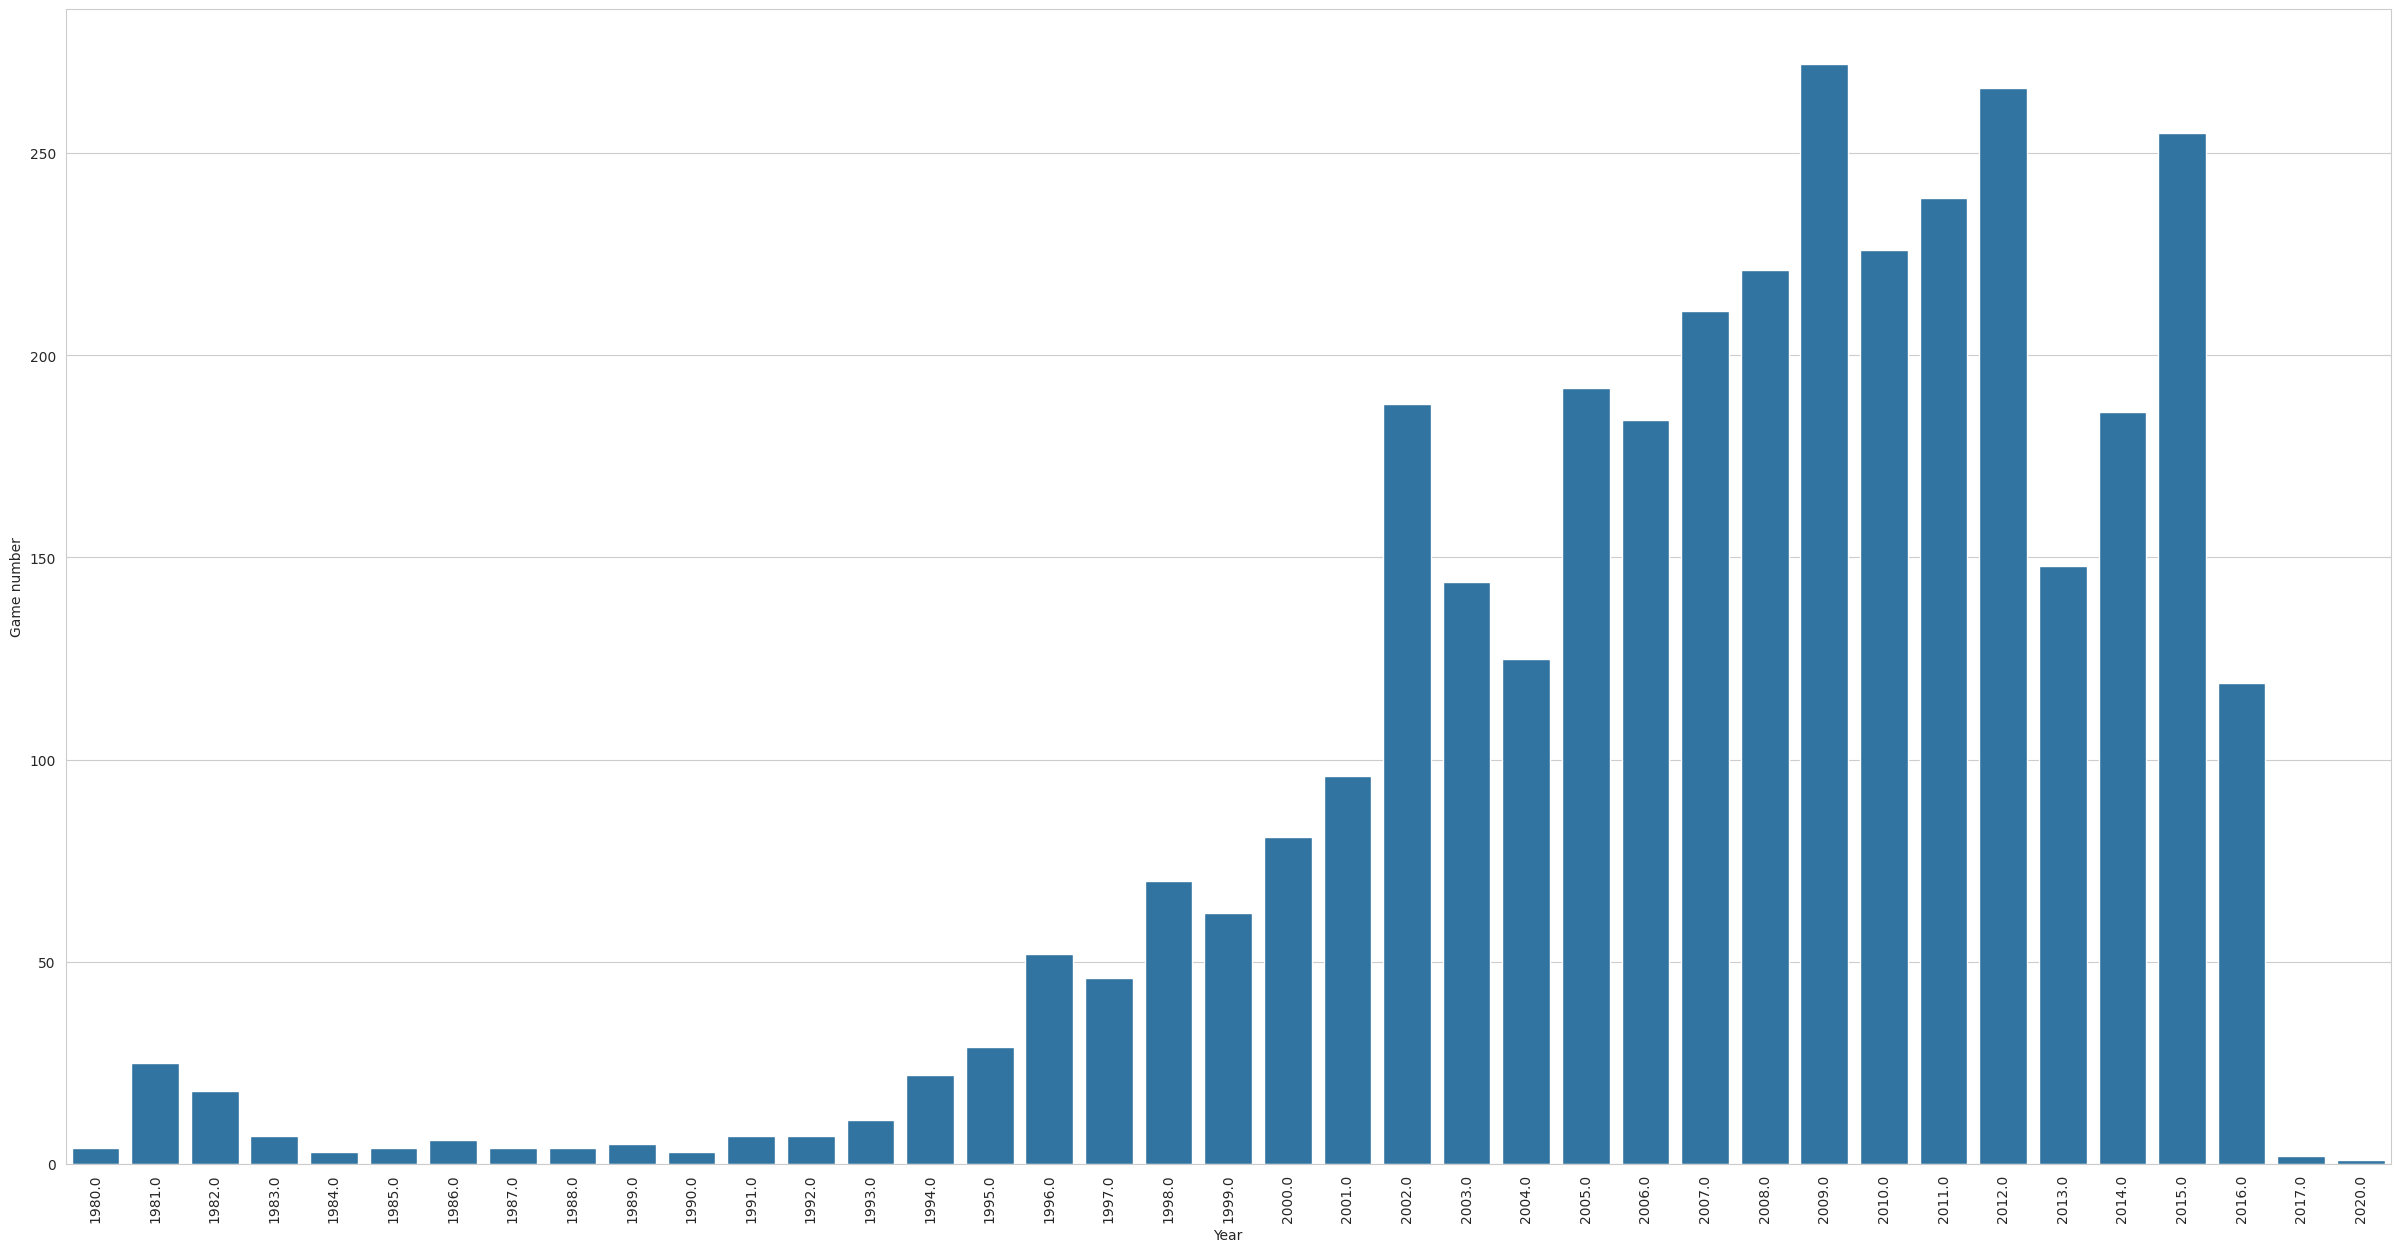

In [ ]:
# 使用直方圖來顯示上面表格的結果
x = data.groupby(["Year","Genre"]).size().reset_index(name="Game number")
x["max"] = x.groupby("Year")["Game number"].transform(max)
x2 = x.loc[x["Game number"] == x["max"]]
x2.drop_duplicates(subset =["Year", "Game number"], keep = "last")

plt.figure(figsize = (30, 15))
sns.barplot(x = "Year", y = "Game number", data = x2)
plt.xticks(rotation = 90)
plt.show()

       Year         Genre  Game number
2    1980.0          Misc            4
5    1981.0        Action           25
12   1982.0        Action           18
19   1983.0        Action            7
29   1984.0        Puzzle            3
35   1985.0      Platform            4
40   1986.0        Action            6
52   1987.0        Sports            4
54   1988.0      Platform            4
64   1989.0        Puzzle            5
68   1990.0        Action            3
85   1991.0        Sports            7
89   1992.0      Fighting            7
101  1993.0      Fighting           11
113  1994.0      Fighting           22
125  1995.0      Fighting           29
145  1996.0        Sports           52
157  1997.0        Sports           46
169  1998.0        Sports           70
181  1999.0        Sports           62
193  2000.0        Sports           81
205  2001.0        Sports           96
217  2002.0        Sports          188
219  2003.0        Action          144
231  2004.0        Action

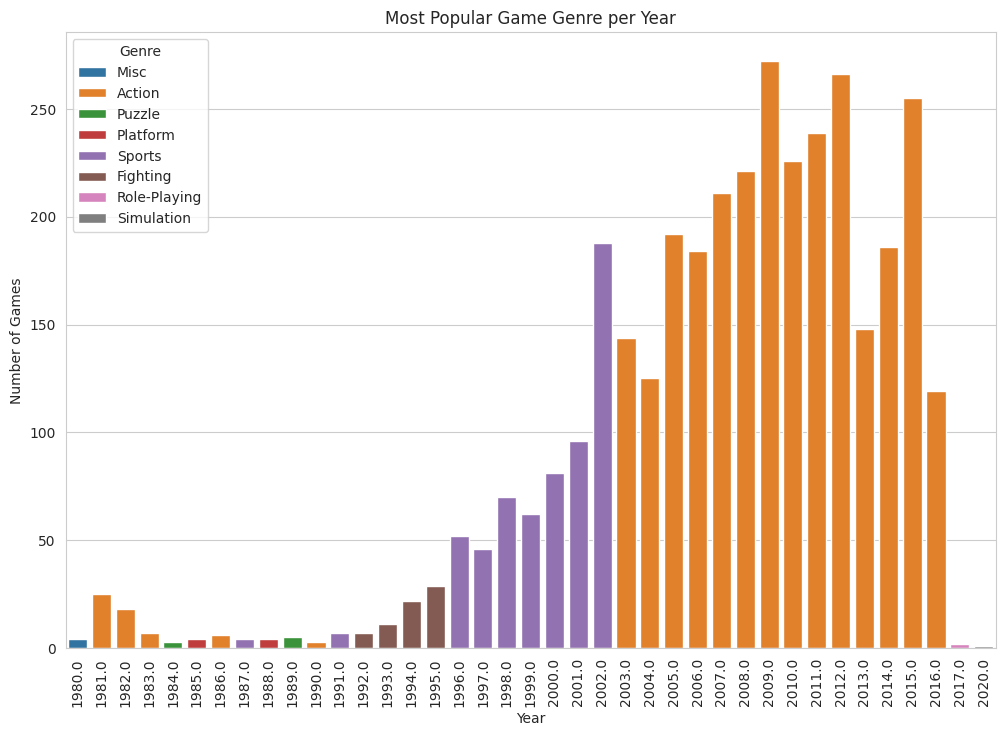

In [ ]:
# 按年和遊戲類型進行分組，計算每組的遊戲數量
year_genre_counts = data.groupby(["Year", "Genre"]).size().reset_index(name="Game number")

# 找出每年遊戲類型數量最多的類型
max_genre_per_year = year_genre_counts.loc[year_genre_counts.groupby("Year")["Game number"].idxmax()]

# 顯示結果
print(max_genre_per_year)

# 可選：如果你想可視化結果，可以使用條形圖
plt.figure(figsize=(12, 8))
sns.barplot(x="Year", y="Game number", hue="Genre", data=max_genre_per_year)
plt.title("Most Popular Game Genre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.show()

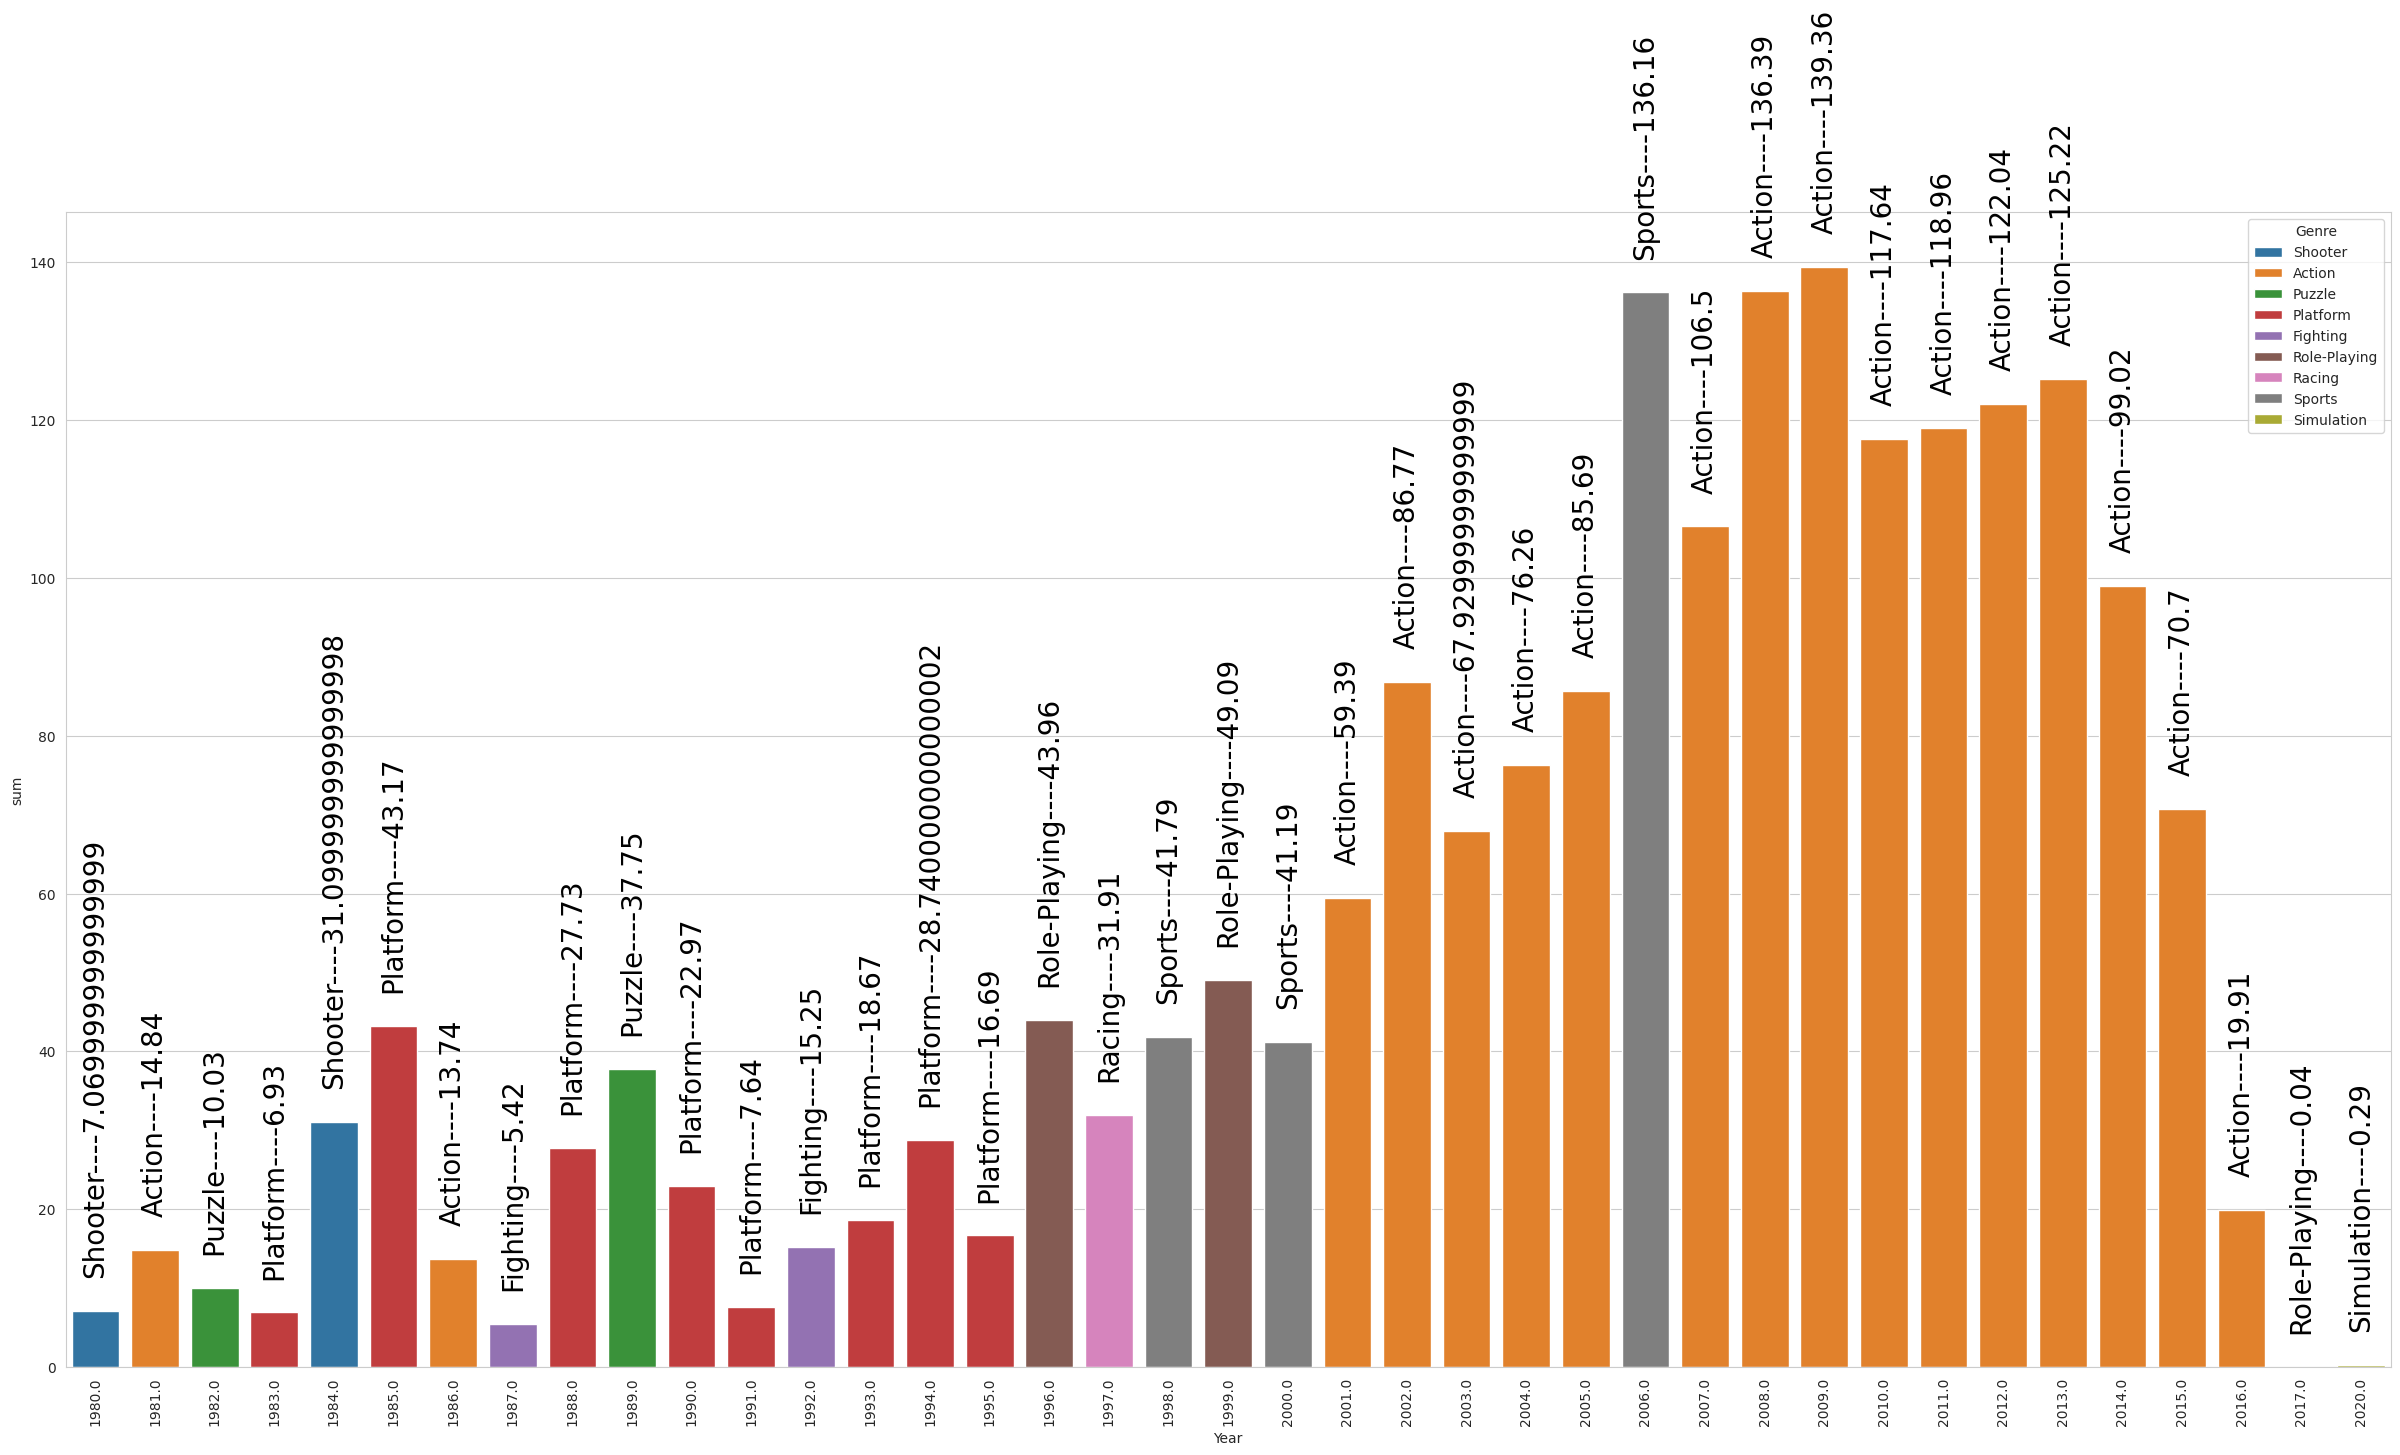

In [ ]:
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
year_max_df = data.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index(name="sum")
year_max_df
year_max_idx = year_max_df.groupby(["Year"])["sum"].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx]#.reset_index(drop=True)
year_max_genre

# 因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "sum"], keep="last")
year_max_genre.head()

# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="sum", data=year_max_genre, hue="Genre")

# 標示出每個直條代表的類型跟數目
genre = year_max_genre["Genre"].values
index = 0
for value in year_max_genre["sum"].values:
    g.text(index, value+5,
           str(genre[index] + '----' +str(value)),
           color="#000000", size=20, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 練習題
# 請將上圖改成依照發行數目排序


In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲數目最多
year_Platform_counts = data.groupby(["Year", "Platform"]).size().reset_index(name="Game number")
max_Platform_per_year = year_genre_counts.loc[year_genre_counts.groupby("Year")["Game number"].idxmax()]


In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個類型，哪一年的遊戲數目最多


## 每年哪一種電玩種類的銷售數量最多？

In [ ]:
# 根據 年份 跟 遊戲種類來進行群組，並計算每個群組的全球銷售總額

In [ ]:
# 根據年份分別找出該年份中那些遊戲種類的銷售總額是最大的

In [ ]:
#將上面的程式整合在一起

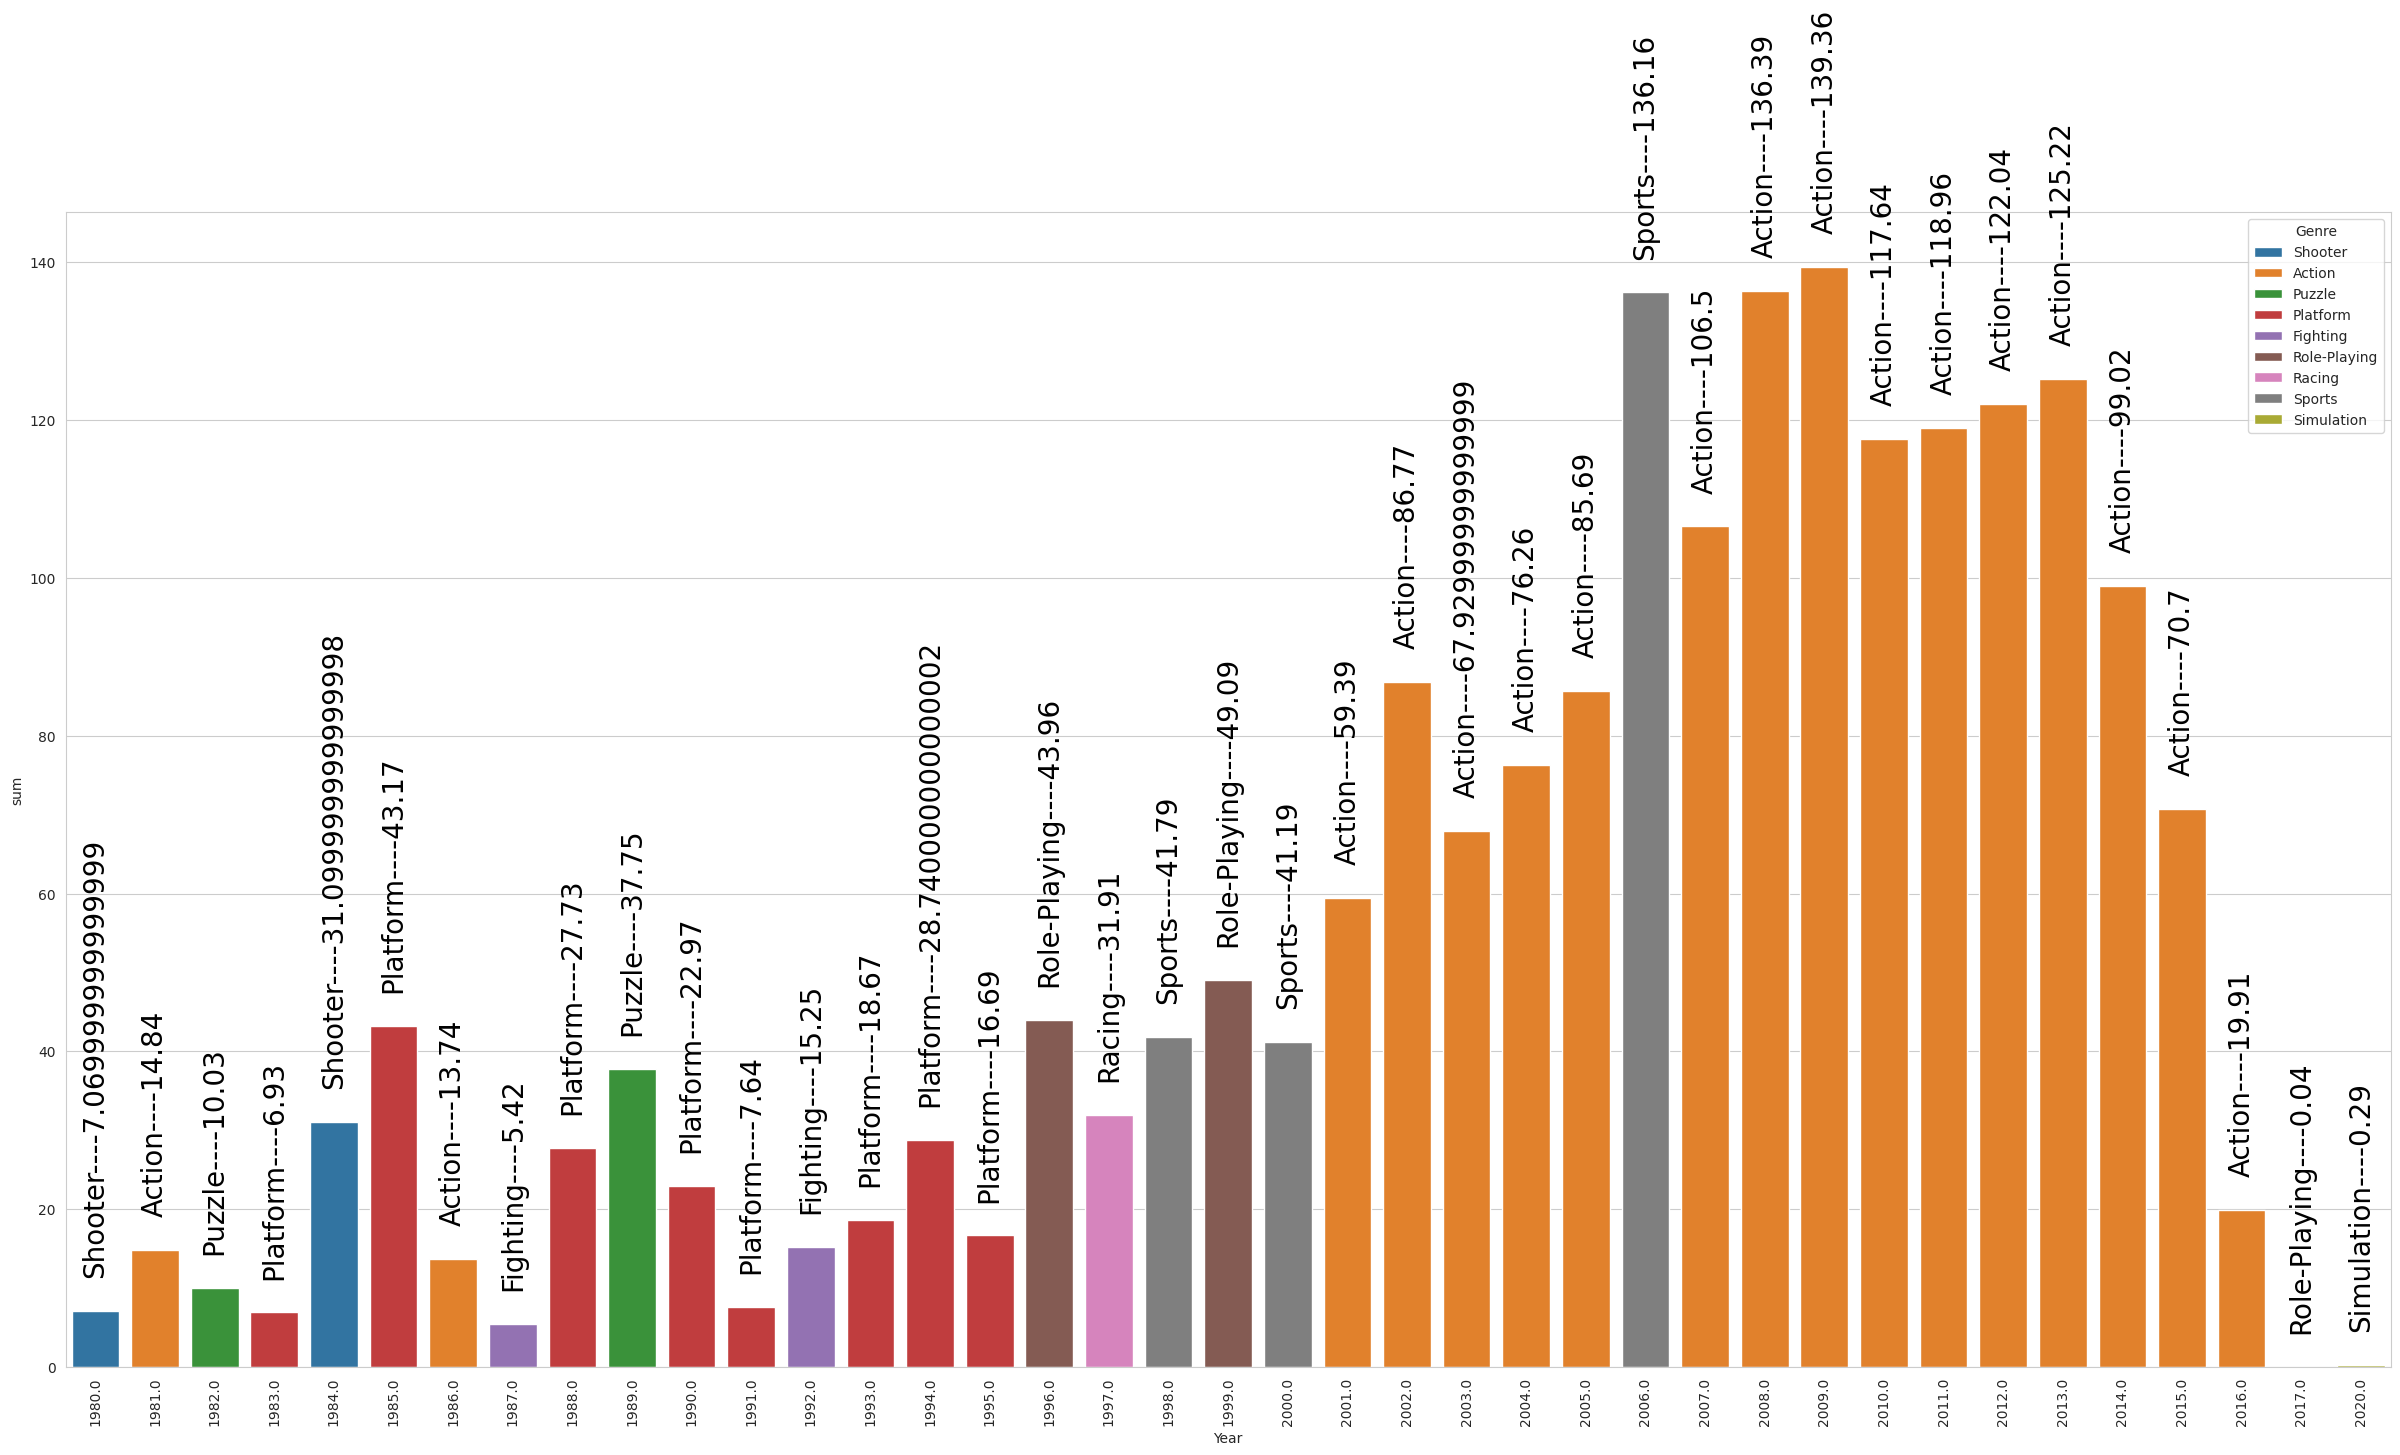

In [ ]:
# 使用直方圖畫出來
year_max_df = data.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index(name='sum')
year_max_df
year_max_idx = year_max_df.groupby(["Year"])["sum"].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx]#.reset_index(drop=True)
year_max_genre

# 因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "sum"], keep='last')
year_max_genre.head()

# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="sum", data=year_max_genre, hue="Genre")

# 標示出每個直條代表的類型跟數目
genre = year_max_genre["Genre"].values
index = 0
for value in year_max_genre["sum"].values:
    g.text(index, value+5,
           str(genre[index] + '----' +str(value)),
           color='#000000', size=20, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 請將上圖改成依照銷售數量排序

In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪類型的遊戲銷售量最多

## 哪一種遊戲全球的銷售總數量最高？

In [ ]:
# 根據遊戲種類進行群組，個別計算全球銷售總數


In [ ]:
# 將上面的資料畫出來


In [ ]:
#練習題
#哪一個開發商在日本地區的銷售總數最高

In [ ]:
#練習題
#哪一個平台在北美與歐洲地區的銷售總數最高

## 全球銷售數量前20大遊戲

In [ ]:
# 全球銷售數量前20大遊戲


In [ ]:
# 使用直方圖把上面的資料畫出來


In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲

In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲公司

## 比較各區域不同遊戲種類的銷售數量

In [ ]:
# 取出 遊戲總類 與 四個銷售地區 的欄位資料成為 新表格


In [ ]:
# 根據上面的表格，以遊戲種類為群組，每個群組計算四個不同地區分別的銷售總合


In [ ]:
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()


### 問題：從上圖能看出哪些結論？

In [ ]:
#練習題
#畫出不同平台各區域的銷售數量熱圖


# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

### Pandas melt() 示範

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
comp_table

In [ ]:
# 根據上面的資料
# 使用直方圖畫出
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量
# 提示 barplot(), hue 參數可以設為 Sale_Area


In [ ]:
# 練習題
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

# 前20大開發商

In [ ]:
#列出每個開發商的遊戲數目


In [ ]:
# 用直方圖畫出前20大開發商的遊戲數量


In [ ]:
# 練習題
# 用直方圖畫出前5大平台的遊戲數量

# 各遊戲開發商的全球銷售總數量

In [ ]:
#列出每個開發商的全球銷售總數量


In [ ]:
# 根據上面資料畫出
# 各遊戲開發商的全球銷售總數量


### 問題：根據上面兩張圖比較各遊戲廠商在遊戲數量與銷售的排名有何不同？

In [ ]:
#練習題
#畫出全球銷售遊戲數量前10大的遊戲平台

# 每年遊戲數目最多的開發商

In [ ]:
# 計算每年分別是那些開發商的遊戲數目最多


In [ ]:
# 使用直方圖畫出上面表格資料


# 各區域遊戲的銷售總量

In [ ]:
# 計算四個不同區域的遊戲銷售總量


In [ ]:
# 使用直方圖來畫出各區域遊戲的銷售總量


In [ ]:
# 使用圓餅圖來畫出各區域遊戲的銷售總量
# 提示： plt.pie()
